In [1]:
## download the EM-EARTH data and combine it to the model simulation

import os
import requests
import base64
import hashlib

def download_EM_ERATH (server = 'https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/',
                       groups = ['deterministic_hourly','deterministic_raw_daily','probabilistic_daily'],
                       variables = ['prcp','tdew','tmean','trange'],
                       regions = ['Asia','Europe','Africa','NorthAmerica','Oceania','SouthAmerica'],
                       years = ['2000'],
                       months = ['01'],
                       ensembles = ['001','002'],
                       root_save = '../EM_Earth_v1/'):
    
    
    groups = ['deterministic_raw_daily','probabilistic_daily']
    
    for group in groups:
        
        for year in years:
            
            for month in months:
                
                for variable in variables:
                    
                    if group == 'deterministic_raw_daily':
                        file_name = 'EM_Earth_deterministic_daily_'+variable+'_'+year+month+'.nc'
                        path      = group+'/'+variable+'/'
                        link      = server+'EM_Earth_v1/'+path+file_name
                        path_save = root_save + path
                        if not os.path.isdir(path_save):
                            os.makedirs(path_save)
                        #print(file_name)
                        #print(path)
                        #print(link)
                        #print(path_save)
                        download_file (link,path_save,file_name)
                    
                    for region in regions:
                                                # 
                            if group == 'deterministic_hourly' and variable != 'trange':
                                file_name = 'EM_Earth_'+group+'_'+region+'_'+year+month+'.nc'
                                path      = group+'/'+variable+'/'+region+'/'
                                link      = server+'EM_Earth_v1/'+path+file_name
                                path_save = root_save + path
                                if not os.path.isdir(path_save):
                                    os.makedirs(path_save)
                                #print(file_name)
                                #print(path)
                                #print(link)
                                #print(path_save)
                                download_file (link,path_save,file_name)
                        
                            
                            if group == 'probabilistic_daily':

                                for ensemble in ensembles:

                                    file_name = 'EM_Earth_probabilistic_daily_'+variable+'_'+region+'_'+\
                                    year+month+'_'+ensemble+'.nc'
                                    path      = group+'/'+variable+'/'+region+'/'+year+month+'/'
                                    link      = server+'EM_Earth_v1/'+path+file_name
                                    path_save = root_save + path
                                    if not os.path.isdir(path_save):
                                        os.makedirs(path_save)

                                    #print(file_name)
                                    #print(path) 
                                    #print(link)
                                    #print(path_save)
                                    download_file (link,path_save,file_name)


def download_file (link,path_save,file_name):
    
    
    os.system('rm *.nc*')
    downloaded = False
    try_number = 1
    while (not downloaded) and (try_number < 5):
        print('going to download '+file_name + ': '+str(try_number))
        os.system('wget -nv '+link +' '+file_name)
        #os.system('wget -O - link | tee file_name | md5sum > remote')
        os.system('wget -O - '+link +' | md5sum > remote')
        os.system('md5sum '+file_name+' > local')
        md5_local = word_file('local')
        md5_remote = word_file('remote')
        print(md5_local, md5_remote)
        if md5_local == md5_remote:
            print('files are the same')
            downloaded = True
            os.system('cp '+ file_name +' '+path_save+file_name)
        try_number = try_number + 1
        os.system('rm *.nc*')


def word_file(f):
    with open(f) as file:
        return file.read().split()[0]

    

                        
download_EM_ERATH()


rm: *.nc*: No such file or directory


going to download EM_Earth_deterministic_daily_prcp_200001.nc: 1


2022-10-10 22:21:31 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/deterministic_raw_daily/prcp/EM_Earth_deterministic_daily_prcp_200001.nc [282068308] -> "EM_Earth_deterministic_daily_prcp_200001.nc" [1]
wget: unable to resolve host address ‘em_earth_deterministic_daily_prcp_200001.nc’
FINISHED --2022-10-10 22:21:31--
Total wall clock time: 28s
Downloaded: 1 files, 269M in 27s (9.99 MB/s)
--2022-10-10 22:21:31--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/deterministic_raw_daily/prcp/EM_Earth_deterministic_daily_prcp_200001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-netcdf]
Saving to: ‘STDOUT’

     0

  5550K .......... .......... .......... .......... .......... 27.1M
  5600K .......... .......... .......... .......... .......... 3.76M
  5650K .......... .......... .......... .......... .......... 10.9M
  5700K .......... .......... .......... .......... .......... 5.07M
  5750K .......... .......... .......... .......... .......... 16.4M
  5800K .......... .......... .......... .......... .......... 29.6M
  5850K .......... .......... .......... .......... .......... 8.92M
  5900K .......... .......... .......... .......... .......... 18.0M
  5950K .......... .......... .......... .......... .......... 9.08M
  6000K .......... .......... .......... .......... .......... 21.3M
  6050K .......... .......... .......... .......... .......... 22.5M
  6100K .......... .......... .......... .......... .......... 31.9M
  6150K .......... .......... .......... .......... .......... 4.72M
  6200K .......... .......... .......... .......... .......... 3.16M
  6250K .......... .......... ....

 13750K .......... .......... .......... .......... .......... 11.3M
 13800K .......... .......... .......... .......... .......... 5.76M
 13850K .......... .......... .......... .......... .......... 3.83M
 13900K .......... .......... .......... .......... .......... 4.68M
 13950K .......... .......... .......... .......... .......... 16.9M
 14000K .......... .......... .......... .......... .......... 16.0M
 14050K .......... .......... .......... .......... .......... 46.8M
 14100K .......... .......... .......... .......... .......... 6.90M
 14150K .......... .......... .......... .......... .......... 25.3M
 14200K .......... .......... .......... .......... .......... 48.6M
 14250K .......... .......... .......... .......... .......... 25.2M
 14300K .......... .......... .......... .......... .......... 21.6M
 14350K .......... .......... .......... .......... .......... 47.7M
 14400K .......... .......... .......... .......... .......... 8.32M
 14450K .......... .......... ....

 20500K .......... .......... .......... .......... .......... 2.46M
 20550K .......... .......... .......... .......... .......... 18.9M
 20600K .......... .......... .......... .......... .......... 14.4M
 20650K .......... .......... .......... .......... .......... 23.1M
 20700K .......... .......... .......... .......... .......... 7.92M
 20750K .......... .......... .......... .......... .......... 25.9M
 20800K .......... .......... .......... .......... .......... 15.2M
 20850K .......... .......... .......... .......... .......... 27.7M
 20900K .......... .......... .......... .......... .......... 22.8M
 20950K .......... .......... .......... .......... .......... 38.4M
 21000K .......... .......... .......... .......... .......... 45.5M
 21050K .......... .......... .......... .......... .......... 32.0M
 21100K .......... .......... .......... .......... .......... 14.8M
 21150K .......... .......... .......... .......... .......... 3.26M
 21200K .......... .......... ....

 28900K .......... .......... .......... .......... .......... 19.7M
 28950K .......... .......... .......... .......... .......... 12.6M
 29000K .......... .......... .......... .......... .......... 23.4M
 29050K .......... .......... .......... .......... .......... 48.9M
 29100K .......... .......... .......... .......... .......... 24.0M
 29150K .......... .......... .......... .......... .......... 39.0M
 29200K .......... .......... .......... .......... .......... 31.6M
 29250K .......... .......... .......... .......... .......... 5.92M
 29300K .......... .......... .......... .......... .......... 26.4M
 29350K .......... .......... .......... .......... .......... 5.35M
 29400K .......... .......... .......... .......... .......... 10.2M
 29450K .......... .......... .......... .......... .......... 12.6M
 29500K .......... .......... .......... .......... .......... 23.6M
 29550K .......... .......... .......... .......... .......... 21.0M
 29600K .......... .......... ....

 35150K .......... .......... .......... .......... .......... 11.2M
 35200K .......... .......... .......... .......... .......... 27.7M
 35250K .......... .......... .......... .......... .......... 53.0M
 35300K .......... .......... .......... .......... .......... 6.22M
 35350K .......... .......... .......... .......... .......... 7.77M
 35400K .......... .......... .......... .......... .......... 25.6M
 35450K .......... .......... .......... .......... .......... 36.2M
 35500K .......... .......... .......... .......... .......... 7.21M
 35550K .......... .......... .......... .......... .......... 25.7M
 35600K .......... .......... .......... .......... .......... 21.4M
 35650K .......... .......... .......... .......... .......... 10.2M
 35700K .......... .......... .......... .......... .......... 16.3M
 35750K .......... .......... .......... .......... .......... 17.8M
 35800K .......... .......... .......... .......... .......... 15.0M
 35850K .......... .......... ....

 41550K .......... .......... .......... .......... .......... 4.07M
 41600K .......... .......... .......... .......... .......... 24.2M
 41650K .......... .......... .......... .......... .......... 53.7M
 41700K .......... .......... .......... .......... .......... 26.7M
 41750K .......... .......... .......... .......... .......... 44.0M
 41800K .......... .......... .......... .......... .......... 42.0M
 41850K .......... .......... .......... .......... .......... 25.3M
 41900K .......... .......... .......... .......... .......... 60.7M
 41950K .......... .......... .......... .......... .......... 24.1M
 42000K .......... .......... .......... .......... .......... 30.7M
 42050K .......... .......... .......... .......... .......... 39.4M
 42100K .......... .......... .......... .......... .......... 16.5M
 42150K .......... .......... .......... .......... .......... 3.25M
 42200K .......... .......... .......... .......... .......... 23.3M
 42250K .......... .......... ....

 48450K .......... .......... .......... .......... .......... 24.0M
 48500K .......... .......... .......... .......... .......... 49.4M
 48550K .......... .......... .......... .......... .......... 25.4M
 48600K .......... .......... .......... .......... .......... 15.8M
 48650K .......... .......... .......... .......... .......... 17.2M
 48700K .......... .......... .......... .......... .......... 23.3M
 48750K .......... .......... .......... .......... .......... 44.7M
 48800K .......... .......... .......... .......... .......... 8.39M
 48850K .......... .......... .......... .......... .......... 7.90M
 48900K .......... .......... .......... .......... .......... 27.6M
 48950K .......... .......... .......... .......... .......... 36.6M
 49000K .......... .......... .......... .......... .......... 55.7M
 49050K .......... .......... .......... .......... .......... 47.0M
 49100K .......... .......... .......... .......... .......... 27.3M
 49150K .......... .......... ....

 55800K .......... .......... .......... .......... .......... 25.5M
 55850K .......... .......... .......... .......... .......... 90.3M
 55900K .......... .......... .......... .......... .......... 19.9M
 55950K .......... .......... .......... .......... .......... 13.4M
 56000K .......... .......... .......... .......... .......... 20.9M
 56050K .......... .......... .......... .......... .......... 21.4M
 56100K .......... .......... .......... .......... .......... 6.28M
 56150K .......... .......... .......... .......... .......... 48.3M
 56200K .......... .......... .......... .......... .......... 47.3M
 56250K .......... .......... .......... .......... .......... 42.7M
 56300K .......... .......... .......... .......... .......... 26.6M
 56350K .......... .......... .......... .......... .......... 33.7M
 56400K .......... .......... .......... .......... .......... 28.5M
 56450K .......... .......... .......... .......... .......... 8.81M
 56500K .......... .......... ....

 62950K .......... .......... .......... .......... .......... 6.49M
 63000K .......... .......... .......... .......... ..........  208M
 63050K .......... .......... .......... .......... .......... 14.0M
 63100K .......... .......... .......... .......... .......... 9.20M
 63150K .......... .......... .......... .......... .......... 8.22M
 63200K .......... .......... .......... .......... .......... 22.3M
 63250K .......... .......... .......... .......... .......... 5.47M
 63300K .......... .......... .......... .......... .......... 8.18M
 63350K .......... .......... .......... .......... .......... 23.9M
 63400K .......... .......... .......... .......... .......... 43.0M
 63450K .......... .......... .......... .......... .......... 27.3M
 63500K .......... .......... .......... .......... ..........  257M
 63550K .......... .......... .......... .......... .......... 28.6M
 63600K .......... .......... .......... .......... .......... 6.78M
 63650K .......... .......... ....

 69400K .......... .......... .......... .......... .......... 3.24M
 69450K .......... .......... .......... .......... .......... 36.0M
 69500K .......... .......... .......... .......... .......... 18.8M
 69550K .......... .......... .......... .......... .......... 23.4M
 69600K .......... .......... .......... .......... .......... 6.19M
 69650K .......... .......... .......... .......... .......... 4.44M
 69700K .......... .......... .......... .......... .......... 24.0M
 69750K .......... .......... .......... .......... .......... 23.4M
 69800K .......... .......... .......... .......... .......... 28.8M
 69850K .......... .......... .......... .......... .......... 19.6M
 69900K .......... .......... .......... .......... .......... 3.77M
 69950K .......... .......... .......... .......... .......... 42.6M
 70000K .......... .......... .......... .......... .......... 12.9M
 70050K .......... .......... .......... .......... .......... 41.2M
 70100K .......... .......... ....

 75700K .......... .......... .......... .......... .......... 5.87M
 75750K .......... .......... .......... .......... .......... 13.1M
 75800K .......... .......... .......... .......... .......... 8.19M
 75850K .......... .......... .......... .......... .......... 8.31M
 75900K .......... .......... .......... .......... .......... 9.68M
 75950K .......... .......... .......... .......... .......... 40.1M
 76000K .......... .......... .......... .......... .......... 16.2M
 76050K .......... .......... .......... .......... .......... 8.14M
 76100K .......... .......... .......... .......... .......... 33.0M
 76150K .......... .......... .......... .......... .......... 6.66M
 76200K .......... .......... .......... .......... .......... 12.3M
 76250K .......... .......... .......... .......... .......... 8.28M
 76300K .......... .......... .......... .......... .......... 15.4M
 76350K .......... .......... .......... .......... .......... 6.66M
 76400K .......... .......... ....

 82450K .......... .......... .......... .......... .......... 6.14M
 82500K .......... .......... .......... .......... .......... 20.8M
 82550K .......... .......... .......... .......... .......... 18.4M
 82600K .......... .......... .......... .......... .......... 27.2M
 82650K .......... .......... .......... .......... .......... 94.4M
 82700K .......... .......... .......... .......... .......... 48.0M
 82750K .......... .......... .......... .......... .......... 9.65M
 82800K .......... .......... .......... .......... .......... 5.30M
 82850K .......... .......... .......... .......... .......... 18.4M
 82900K .......... .......... .......... .......... .......... 5.79M
 82950K .......... .......... .......... .......... .......... 9.16M
 83000K .......... .......... .......... .......... .......... 3.90M
 83050K .......... .......... .......... .......... .......... 28.3M
 83100K .......... .......... .......... .......... .......... 45.3M
 83150K .......... .......... ....

 89450K .......... .......... .......... .......... .......... 23.0M
 89500K .......... .......... .......... .......... .......... 35.0M
 89550K .......... .......... .......... .......... .......... 9.56M
 89600K .......... .......... .......... .......... .......... 7.71M
 89650K .......... .......... .......... .......... .......... 8.07M
 89700K .......... .......... .......... .......... .......... 15.2M
 89750K .......... .......... .......... .......... .......... 7.11M
 89800K .......... .......... .......... .......... .......... 24.3M
 89850K .......... .......... .......... .......... .......... 8.37M
 89900K .......... .......... .......... .......... .......... 9.15M
 89950K .......... .......... .......... .......... .......... 16.8M
 90000K .......... .......... .......... .......... .......... 25.8M
 90050K .......... .......... .......... .......... .......... 23.8M
 90100K .......... .......... .......... .......... .......... 10.5M
 90150K .......... .......... ....

 96550K .......... .......... .......... .......... .......... 5.63M
 96600K .......... .......... .......... .......... .......... 87.8M
 96650K .......... .......... .......... .......... .......... 26.5M
 96700K .......... .......... .......... .......... .......... 15.1M
 96750K .......... .......... .......... .......... .......... 16.7M
 96800K .......... .......... .......... .......... .......... 21.2M
 96850K .......... .......... .......... .......... .......... 26.2M
 96900K .......... .......... .......... .......... .......... 24.8M
 96950K .......... .......... .......... .......... .......... 7.92M
 97000K .......... .......... .......... .......... .......... 9.10M
 97050K .......... .......... .......... .......... .......... 3.96M
 97100K .......... .......... .......... .......... .......... 9.72M
 97150K .......... .......... .......... .......... .......... 15.7M
 97200K .......... .......... .......... .......... .......... 24.3M
 97250K .......... .......... ....

103500K .......... .......... .......... .......... .......... 1.63M
103550K .......... .......... .......... .......... .......... 9.92M
103600K .......... .......... .......... .......... .......... 15.7M
103650K .......... .......... .......... .......... .......... 29.7M
103700K .......... .......... .......... .......... .......... 42.6M
103750K .......... .......... .......... .......... .......... 43.9M
103800K .......... .......... .......... .......... .......... 24.6M
103850K .......... .......... .......... .......... .......... 50.5M
103900K .......... .......... .......... .......... .......... 41.7M
103950K .......... .......... .......... .......... .......... 21.6M
104000K .......... .......... .......... .......... .......... 28.4M
104050K .......... .......... .......... .......... .......... 1.87M
104100K .......... .......... .......... .......... .......... 14.1M
104150K .......... .......... .......... .......... .......... 7.27M
104200K .......... .......... ....

110800K .......... .......... .......... .......... .......... 6.13M
110850K .......... .......... .......... .......... .......... 14.8M
110900K .......... .......... .......... .......... .......... 20.3M
110950K .......... .......... .......... .......... .......... 49.5M
111000K .......... .......... .......... .......... .......... 24.6M
111050K .......... .......... .......... .......... .......... 7.99M
111100K .......... .......... .......... .......... .......... 22.6M
111150K .......... .......... .......... .......... .......... 7.16M
111200K .......... .......... .......... .......... .......... 9.87M
111250K .......... .......... .......... .......... .......... 10.5M
111300K .......... .......... .......... .......... .......... 11.2M
111350K .......... .......... .......... .......... .......... 22.6M
111400K .......... .......... .......... .......... .......... 6.21M
111450K .......... .......... .......... .......... .......... 9.17M
111500K .......... .......... ....

118300K .......... .......... .......... .......... .......... 12.0M
118350K .......... .......... .......... .......... .......... 17.3M
118400K .......... .......... .......... .......... .......... 6.60M
118450K .......... .......... .......... .......... .......... 18.0M
118500K .......... .......... .......... .......... .......... 12.2M
118550K .......... .......... .......... .......... .......... 13.0M
118600K .......... .......... .......... .......... .......... 13.7M
118650K .......... .......... .......... .......... .......... 12.4M
118700K .......... .......... .......... .......... .......... 31.8M
118750K .......... .......... .......... .......... .......... 9.59M
118800K .......... .......... .......... .......... .......... 5.88M
118850K .......... .......... .......... .......... .......... 20.1M
118900K .......... .......... .......... .......... .......... 29.1M
118950K .......... .......... .......... .......... .......... 6.34M
119000K .......... .......... ....

125550K .......... .......... .......... .......... .......... 27.1M
125600K .......... .......... .......... .......... .......... 16.3M
125650K .......... .......... .......... .......... .......... 23.9M
125700K .......... .......... .......... .......... .......... 47.7M
125750K .......... .......... .......... .......... .......... 25.8M
125800K .......... .......... .......... .......... .......... 9.77M
125850K .......... .......... .......... .......... .......... 6.22M
125900K .......... .......... .......... .......... .......... 15.0M
125950K .......... .......... .......... .......... .......... 16.4M
126000K .......... .......... .......... .......... .......... 4.84M
126050K .......... .......... .......... .......... .......... 9.95M
126100K .......... .......... .......... .......... .......... 23.5M
126150K .......... .......... .......... .......... .......... 4.05M
126200K .......... .......... .......... .......... .......... 22.8M
126250K .......... .......... ....

132150K .......... .......... .......... .......... .......... 6.14M
132200K .......... .......... .......... .......... .......... 17.6M
132250K .......... .......... .......... .......... .......... 10.1M
132300K .......... .......... .......... .......... .......... 26.1M
132350K .......... .......... .......... .......... .......... 13.6M
132400K .......... .......... .......... .......... .......... 16.5M
132450K .......... .......... .......... .......... .......... 8.08M
132500K .......... .......... .......... .......... .......... 12.0M
132550K .......... .......... .......... .......... .......... 17.3M
132600K .......... .......... .......... .......... .......... 20.6M
132650K .......... .......... .......... .......... .......... 8.94M
132700K .......... .......... .......... .......... .......... 5.77M
132750K .......... .......... .......... .......... .......... 17.7M
132800K .......... .......... .......... .......... .......... 20.1M
132850K .......... .......... ....

139650K .......... .......... .......... .......... .......... 6.88M
139700K .......... .......... .......... .......... .......... 12.6M
139750K .......... .......... .......... .......... .......... 9.63M
139800K .......... .......... .......... .......... .......... 9.01M
139850K .......... .......... .......... .......... .......... 26.8M
139900K .......... .......... .......... .......... .......... 49.9M
139950K .......... .......... .......... .......... .......... 24.1M
140000K .......... .......... .......... .......... .......... 10.1M
140050K .......... .......... .......... .......... .......... 12.5M
140100K .......... .......... .......... .......... .......... 8.15M
140150K .......... .......... .......... .......... .......... 12.2M
140200K .......... .......... .......... .......... .......... 5.35M
140250K .......... .......... .......... .......... .......... 23.2M
140300K .......... .......... .......... .......... .......... 15.0M
140350K .......... .......... ....

147000K .......... .......... .......... .......... .......... 12.2M
147050K .......... .......... .......... .......... .......... 8.49M
147100K .......... .......... .......... .......... .......... 22.0M
147150K .......... .......... .......... .......... .......... 45.1M
147200K .......... .......... .......... .......... .......... 24.6M
147250K .......... .......... .......... .......... .......... 11.9M
147300K .......... .......... .......... .......... .......... 43.1M
147350K .......... .......... .......... .......... .......... 6.15M
147400K .......... .......... .......... .......... .......... 8.51M
147450K .......... .......... .......... .......... .......... 5.36M
147500K .......... .......... .......... .......... .......... 25.2M
147550K .......... .......... .......... .......... .......... 24.2M
147600K .......... .......... .......... .......... .......... 11.7M
147650K .......... .......... .......... .......... .......... 7.80M
147700K .......... .......... ....

154600K .......... .......... .......... .......... .......... 3.91M
154650K .......... .......... .......... .......... .......... 16.5M
154700K .......... .......... .......... .......... .......... 13.8M
154750K .......... .......... .......... .......... .......... 7.94M
154800K .......... .......... .......... .......... .......... 19.9M
154850K .......... .......... .......... .......... .......... 12.4M
154900K .......... .......... .......... .......... .......... 30.9M
154950K .......... .......... .......... .......... .......... 12.6M
155000K .......... .......... .......... .......... .......... 23.3M
155050K .......... .......... .......... .......... .......... 24.3M
155100K .......... .......... .......... .......... .......... 47.8M
155150K .......... .......... .......... .......... .......... 7.90M
155200K .......... .......... .......... .......... .......... 4.59M
155250K .......... .......... .......... .......... .......... 22.6M
155300K .......... .......... ....

162200K .......... .......... .......... .......... .......... 32.5M
162250K .......... .......... .......... .......... .......... 18.4M
162300K .......... .......... .......... .......... .......... 8.11M
162350K .......... .......... .......... .......... .......... 39.2M
162400K .......... .......... .......... .......... .......... 9.80M
162450K .......... .......... .......... .......... .......... 16.9M
162500K .......... .......... .......... .......... .......... 13.1M
162550K .......... .......... .......... .......... .......... 19.1M
162600K .......... .......... .......... .......... .......... 26.3M
162650K .......... .......... .......... .......... .......... 9.94M
162700K .......... .......... .......... .......... .......... 16.7M
162750K .......... .......... .......... .......... .......... 4.07M
162800K .......... .......... .......... .......... .......... 15.3M
162850K .......... .......... .......... .......... .......... 12.8M
162900K .......... .......... ....

170000K .......... .......... .......... .......... .......... 7.59M
170050K .......... .......... .......... .......... .......... 10.7M
170100K .......... .......... .......... .......... .......... 22.0M
170150K .......... .......... .......... .......... .......... 16.6M
170200K .......... .......... .......... .......... .......... 25.8M
170250K .......... .......... .......... .......... .......... 16.9M
170300K .......... .......... .......... .......... .......... 7.35M
170350K .......... .......... .......... .......... .......... 20.0M
170400K .......... .......... .......... .......... .......... 44.2M
170450K .......... .......... .......... .......... .......... 17.5M
170500K .......... .......... .......... .......... .......... 5.25M
170550K .......... .......... .......... .......... .......... 12.8M
170600K .......... .......... .......... .......... .......... 9.74M
170650K .......... .......... .......... .......... .......... 12.2M
170700K .......... .......... ....

177800K .......... .......... .......... .......... .......... 5.91M
177850K .......... .......... .......... .......... .......... 4.96M
177900K .......... .......... .......... .......... .......... 45.7M
177950K .......... .......... .......... .......... .......... 44.7M
178000K .......... .......... .......... .......... .......... 16.8M
178050K .......... .......... .......... .......... .......... 61.4M
178100K .......... .......... .......... .......... .......... 38.8M
178150K .......... .......... .......... .......... .......... 23.5M
178200K .......... .......... .......... .......... .......... 3.65M
178250K .......... .......... .......... .......... .......... 18.2M
178300K .......... .......... .......... .......... .......... 46.3M
178350K .......... .......... .......... .......... .......... 26.5M
178400K .......... .......... .......... .......... .......... 27.4M
178450K .......... .......... .......... .......... .......... 1.86M
178500K .......... .......... ....

185700K .......... .......... .......... .......... .......... 22.1M
185750K .......... .......... .......... .......... .......... 12.2M
185800K .......... .......... .......... .......... .......... 40.7M
185850K .......... .......... .......... .......... .......... 12.8M
185900K .......... .......... .......... .......... .......... 14.8M
185950K .......... .......... .......... .......... .......... 16.8M
186000K .......... .......... .......... .......... .......... 6.08M
186050K .......... .......... .......... .......... .......... 26.6M
186100K .......... .......... .......... .......... .......... 11.5M
186150K .......... .......... .......... .......... .......... 14.3M
186200K .......... .......... .......... .......... .......... 17.9M
186250K .......... .......... .......... .......... .......... 8.68M
186300K .......... .......... .......... .......... .......... 23.5M
186350K .......... .......... .......... .......... .......... 9.99M
186400K .......... .......... ....

193250K .......... .......... .......... .......... .......... 26.4M
193300K .......... .......... .......... .......... .......... 57.8M
193350K .......... .......... .......... .......... .......... 47.0M
193400K .......... .......... .......... .......... .......... 23.2M
193450K .......... .......... .......... .......... .......... 23.9M
193500K .......... .......... .......... .......... .......... 53.9M
193550K .......... .......... .......... .......... .......... 15.4M
193600K .......... .......... .......... .......... .......... 8.50M
193650K .......... .......... .......... .......... .......... 7.92M
193700K .......... .......... .......... .......... .......... 7.51M
193750K .......... .......... .......... .......... .......... 6.62M
193800K .......... .......... .......... .......... .......... 8.14M
193850K .......... .......... .......... .......... .......... 12.1M
193900K .......... .......... .......... .......... .......... 9.57M
193950K .......... .......... ....

201800K .......... .......... .......... .......... .......... 26.1M
201850K .......... .......... .......... .......... .......... 11.1M
201900K .......... .......... .......... .......... .......... 8.32M
201950K .......... .......... .......... .......... .......... 48.2M
202000K .......... .......... .......... .......... .......... 5.64M
202050K .......... .......... .......... .......... .......... 20.6M
202100K .......... .......... .......... .......... .......... 67.8M
202150K .......... .......... .......... .......... .......... 21.5M
202200K .......... .......... .......... .......... .......... 17.6M
202250K .......... .......... .......... .......... .......... 11.5M
202300K .......... .......... .......... .......... .......... 17.2M
202350K .......... .......... .......... .......... .......... 6.29M
202400K .......... .......... .......... .......... .......... 21.1M
202450K .......... .......... .......... .......... .......... 45.5M
202500K .......... .......... ....

207750K .......... .......... .......... .......... .......... 17.3M
207800K .......... .......... .......... .......... .......... 27.4M
207850K .......... .......... .......... .......... .......... 6.06M
207900K .......... .......... .......... .......... .......... 8.12M
207950K .......... .......... .......... .......... .......... 9.55M
208000K .......... .......... .......... .......... .......... 9.34M
208050K .......... .......... .......... .......... .......... 44.7M
208100K .......... .......... .......... .......... .......... 65.0M
208150K .......... .......... .......... .......... .......... 12.5M
208200K .......... .......... .......... .......... .......... 12.3M
208250K .......... .......... .......... .......... .......... 41.5M
208300K .......... .......... .......... .......... .......... 21.2M
208350K .......... .......... .......... .......... .......... 55.1M
208400K .......... .......... .......... .......... .......... 62.4M
208450K .......... .......... ....

216800K .......... .......... .......... .......... .......... 12.2M
216850K .......... .......... .......... .......... .......... 11.8M
216900K .......... .......... .......... .......... .......... 38.7M
216950K .......... .......... .......... .......... .......... 18.5M
217000K .......... .......... .......... .......... .......... 24.2M
217050K .......... .......... .......... .......... .......... 9.89M
217100K .......... .......... .......... .......... .......... 29.9M
217150K .......... .......... .......... .......... ..........  132M
217200K .......... .......... .......... .......... .......... 42.5M
217250K .......... .......... .......... .......... .......... 8.50M
217300K .......... .......... .......... .......... .......... 5.13M
217350K .......... .......... .......... .......... .......... 14.8M
217400K .......... .......... .......... .......... .......... 21.4M
217450K .......... .......... .......... .......... .......... 39.4M
217500K .......... .......... ....

223800K .......... .......... .......... .......... .......... 14.4M
223850K .......... .......... .......... .......... .......... 7.61M
223900K .......... .......... .......... .......... .......... 3.50M
223950K .......... .......... .......... .......... .......... 9.34M
224000K .......... .......... .......... .......... .......... 9.18M
224050K .......... .......... .......... .......... .......... 83.2M
224100K .......... .......... .......... .......... .......... 39.8M
224150K .......... .......... .......... .......... .......... 25.0M
224200K .......... .......... .......... .......... .......... 25.2M
224250K .......... .......... .......... .......... .......... 23.7M
224300K .......... .......... .......... .......... .......... 9.93M
224350K .......... .......... .......... .......... .......... 21.1M
224400K .......... .......... .......... .......... .......... 6.57M
224450K .......... .......... .......... .......... .......... 3.41M
224500K .......... .......... ....

231050K .......... .......... .......... .......... .......... 9.68M
231100K .......... .......... .......... .......... .......... 9.63M
231150K .......... .......... .......... .......... .......... 17.4M
231200K .......... .......... .......... .......... ..........  136M
231250K .......... .......... .......... .......... .......... 26.5M
231300K .......... .......... .......... .......... .......... 51.2M
231350K .......... .......... .......... .......... .......... 8.05M
231400K .......... .......... .......... .......... .......... 6.22M
231450K .......... .......... .......... .......... .......... 5.93M
231500K .......... .......... .......... .......... .......... 16.0M
231550K .......... .......... .......... .......... .......... 28.7M
231600K .......... .......... .......... .......... .......... 12.0M
231650K .......... .......... .......... .......... .......... 16.4M
231700K .......... .......... .......... .......... .......... 11.9M
231750K .......... .......... ....

239000K .......... .......... .......... .......... .......... 28.4M
239050K .......... .......... .......... .......... .......... 33.6M
239100K .......... .......... .......... .......... .......... 7.91M
239150K .......... .......... .......... .......... .......... 23.1M
239200K .......... .......... .......... .......... .......... 14.0M
239250K .......... .......... .......... .......... .......... 44.8M
239300K .......... .......... .......... .......... .......... 7.56M
239350K .......... .......... .......... .......... .......... 17.5M
239400K .......... .......... .......... .......... .......... 37.0M
239450K .......... .......... .......... .......... .......... 6.37M
239500K .......... .......... .......... .......... .......... 33.0M
239550K .......... .......... .......... .......... .......... 4.02M
239600K .......... .......... .......... .......... .......... 23.3M
239650K .......... .......... .......... .......... .......... 16.8M
239700K .......... .......... ....

247100K .......... .......... .......... .......... .......... 28.7M
247150K .......... .......... .......... .......... .......... 46.0M
247200K .......... .......... .......... .......... .......... 22.5M
247250K .......... .......... .......... .......... .......... 3.25M
247300K .......... .......... .......... .......... .......... 3.10M
247350K .......... .......... .......... .......... .......... 41.1M
247400K .......... .......... .......... .......... .......... 12.3M
247450K .......... .......... .......... .......... .......... 22.6M
247500K .......... .......... .......... .......... .......... 24.7M
247550K .......... .......... .......... .......... .......... 54.1M
247600K .......... .......... .......... .......... .......... 39.9M
247650K .......... .......... .......... .......... .......... 24.8M
247700K .......... .......... .......... .......... .......... 25.3M
247750K .......... .......... .......... .......... .......... 56.0M
247800K .......... .......... ....

255350K .......... .......... .......... .......... .......... 10.5M
255400K .......... .......... .......... .......... ..........  220M
255450K .......... .......... .......... .......... .......... 15.5M
255500K .......... .......... .......... .......... ..........  263M
255550K .......... .......... .......... .......... .......... 10.9M
255600K .......... .......... .......... .......... .......... 36.2M
255650K .......... .......... .......... .......... ..........  256M
255700K .......... .......... .......... .......... .......... 22.3M
255750K .......... .......... .......... .......... ..........  231M
255800K .......... .......... .......... .......... .......... 24.7M
255850K .......... .......... .......... .......... ..........  264M
255900K .......... .......... .......... .......... .......... 61.2M
255950K .......... .......... .......... .......... .......... 9.44M
256000K .......... .......... .......... .......... .......... 1.81M
256050K .......... .......... ....

264350K .......... .......... .......... .......... .......... 17.8M
264400K .......... .......... .......... .......... .......... 15.8M
264450K .......... .......... .......... .......... .......... 20.7M
264500K .......... .......... .......... .......... .......... 61.0M
264550K .......... .......... .......... .......... .......... 46.5M
264600K .......... .......... .......... .......... .......... 26.9M
264650K .......... .......... .......... .......... .......... 4.79M
264700K .......... .......... .......... .......... .......... 10.3M
264750K .......... .......... .......... .......... .......... 43.3M
264800K .......... .......... .......... .......... .......... 4.90M
264850K .......... .......... .......... .......... .......... 8.11M
264900K .......... .......... .......... .......... .......... 51.9M
264950K .......... .......... .......... .......... .......... 36.9M
265000K .......... .......... .......... .......... .......... 99.9M
265050K .......... .......... ....

272250K .......... .......... .......... .......... .......... 1.99M
272300K .......... .......... .......... .......... .......... 11.0M
272350K .......... .......... .......... .......... .......... 24.0M
272400K .......... .......... .......... .......... .......... 37.2M
272450K .......... .......... .......... .......... .......... 16.7M
272500K .......... .......... .......... .......... .......... 78.3M
272550K .......... .......... .......... .......... .......... 34.1M
272600K .......... .......... .......... .......... .......... 98.2M
272650K .......... .......... .......... .......... .......... 67.2M
272700K .......... .......... .......... .......... .......... 9.33M
272750K .......... .......... .......... .......... .......... 8.45M
272800K .......... .......... .......... .......... .......... 1.50M
272850K .......... .......... .......... .......... .......... 36.6M
272900K .......... .......... .......... .......... .......... 88.6M
272950K .......... .......... ....

214dd233eb4279a0f4c2a1418bbe360f 214dd233eb4279a0f4c2a1418bbe360f
files are the same


rm: *.nc*: No such file or directory


going to download EM_Earth_deterministic_daily_tdew_200001.nc: 1


2022-10-10 22:22:08 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/deterministic_raw_daily/tdew/EM_Earth_deterministic_daily_tdew_200001.nc [155591229] -> "EM_Earth_deterministic_daily_tdew_200001.nc" [1]
wget: unable to resolve host address ‘em_earth_deterministic_daily_tdew_200001.nc’
FINISHED --2022-10-10 22:22:08--
Total wall clock time: 12s
Downloaded: 1 files, 148M in 11s (13.2 MB/s)
--2022-10-10 22:22:08--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/deterministic_raw_daily/tdew/EM_Earth_deterministic_daily_tdew_200001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-netcdf]
Saving to: ‘STDOUT’

     0

  5250K .......... .......... .......... .......... .......... 4.50M
  5300K .......... .......... .......... .......... .......... 5.02M
  5350K .......... .......... .......... .......... .......... 4.61M
  5400K .......... .......... .......... .......... .......... 8.04M
  5450K .......... .......... .......... .......... .......... 5.40M
  5500K .......... .......... .......... .......... .......... 6.31M
  5550K .......... .......... .......... .......... .......... 4.72M
  5600K .......... .......... .......... .......... .......... 4.90M
  5650K .......... .......... .......... .......... .......... 8.33M
  5700K .......... .......... .......... .......... .......... 6.03M
  5750K .......... .......... .......... .......... .......... 5.35M
  5800K .......... .......... .......... .......... .......... 5.28M
  5850K .......... .......... .......... .......... .......... 3.59M
  5900K .......... .......... .......... .......... .......... 9.87M
  5950K .......... .......... ....

 11450K .......... .......... .......... .......... .......... 5.63M
 11500K .......... .......... .......... .......... .......... 7.58M
 11550K .......... .......... .......... .......... .......... 3.28M
 11600K .......... .......... .......... .......... .......... 15.6M
 11650K .......... .......... .......... .......... .......... 89.9M
 11700K .......... .......... .......... .......... .......... 3.06M
 11750K .......... .......... .......... .......... .......... 4.61M
 11800K .......... .......... .......... .......... .......... 15.7M
 11850K .......... .......... .......... .......... .......... 4.26M
 11900K .......... .......... .......... .......... .......... 14.0M
 11950K .......... .......... .......... .......... .......... 24.8M
 12000K .......... .......... .......... .......... .......... 3.09M
 12050K .......... .......... .......... .......... .......... 5.63M
 12100K .......... .......... .......... .......... .......... 14.5M
 12150K .......... .......... ....

 18150K .......... .......... .......... .......... .......... 4.27M
 18200K .......... .......... .......... .......... .......... 13.1M
 18250K .......... .......... .......... .......... .......... 3.85M
 18300K .......... .......... .......... .......... .......... 19.9M
 18350K .......... .......... .......... .......... .......... 8.11M
 18400K .......... .......... .......... .......... .......... 6.26M
 18450K .......... .......... .......... .......... .......... 3.93M
 18500K .......... .......... .......... .......... .......... 76.5M
 18550K .......... .......... .......... .......... .......... 3.60M
 18600K .......... .......... .......... .......... .......... 10.5M
 18650K .......... .......... .......... .......... .......... 7.25M
 18700K .......... .......... .......... .......... .......... 9.78M
 18750K .......... .......... .......... .......... .......... 3.45M
 18800K .......... .......... .......... .......... .......... 12.2M
 18850K .......... .......... ....

 25000K .......... .......... .......... .......... .......... 5.31M
 25050K .......... .......... .......... .......... .......... 12.6M
 25100K .......... .......... .......... .......... .......... 3.93M
 25150K .......... .......... .......... .......... .......... 8.73M
 25200K .......... .......... .......... .......... .......... 4.41M
 25250K .......... .......... .......... .......... .......... 52.2M
 25300K .......... .......... .......... .......... .......... 5.98M
 25350K .......... .......... .......... .......... .......... 8.37M
 25400K .......... .......... .......... .......... .......... 6.41M
 25450K .......... .......... .......... .......... .......... 4.13M
 25500K .......... .......... .......... .......... .......... 5.53M
 25550K .......... .......... .......... .......... .......... 17.1M
 25600K .......... .......... .......... .......... .......... 19.4M
 25650K .......... .......... .......... .......... .......... 5.88M
 25700K .......... .......... ....

 32100K .......... .......... .......... .......... .......... 4.75M
 32150K .......... .......... .......... .......... .......... 3.18M
 32200K .......... .......... .......... .......... .......... 11.2M
 32250K .......... .......... .......... .......... .......... 9.24M
 32300K .......... .......... .......... .......... .......... 11.6M
 32350K .......... .......... .......... .......... .......... 8.02M
 32400K .......... .......... .......... .......... .......... 8.43M
 32450K .......... .......... .......... .......... .......... 6.20M
 32500K .......... .......... .......... .......... .......... 3.54M
 32550K .......... .......... .......... .......... .......... 7.87M
 32600K .......... .......... .......... .......... .......... 9.55M
 32650K .......... .......... .......... .......... .......... 26.0M
 32700K .......... .......... .......... .......... .......... 6.99M
 32750K .......... .......... .......... .......... .......... 9.59M
 32800K .......... .......... ....

 39150K .......... .......... .......... .......... .......... 8.26M
 39200K .......... .......... .......... .......... .......... 6.09M
 39250K .......... .......... .......... .......... .......... 4.91M
 39300K .......... .......... .......... .......... .......... 6.12M
 39350K .......... .......... .......... .......... .......... 4.67M
 39400K .......... .......... .......... .......... .......... 70.1M
 39450K .......... .......... .......... .......... .......... 5.93M
 39500K .......... .......... .......... .......... .......... 18.1M
 39550K .......... .......... .......... .......... .......... 4.39M
 39600K .......... .......... .......... .......... .......... 4.04M
 39650K .......... .......... .......... .......... .......... 15.9M
 39700K .......... .......... .......... .......... .......... 6.81M
 39750K .......... .......... .......... .......... .......... 11.7M
 39800K .......... .......... .......... .......... .......... 9.13M
 39850K .......... .......... ....

 46100K .......... .......... .......... .......... .......... 18.8M
 46150K .......... .......... .......... .......... .......... 24.6M
 46200K .......... .......... .......... .......... .......... 3.60M
 46250K .......... .......... .......... .......... .......... 5.76M
 46300K .......... .......... .......... .......... .......... 8.20M
 46350K .......... .......... .......... .......... .......... 6.27M
 46400K .......... .......... .......... .......... .......... 7.56M
 46450K .......... .......... .......... .......... .......... 18.1M
 46500K .......... .......... .......... .......... .......... 13.3M
 46550K .......... .......... .......... .......... .......... 3.40M
 46600K .......... .......... .......... .......... .......... 5.90M
 46650K .......... .......... .......... .......... .......... 17.0M
 46700K .......... .......... .......... .......... .......... 3.30M
 46750K .......... .......... .......... .......... .......... 38.4M
 46800K .......... .......... ....

 52050K .......... .......... .......... .......... .......... 4.93M
 52100K .......... .......... .......... .......... .......... 6.89M
 52150K .......... .......... .......... .......... .......... 5.03M
 52200K .......... .......... .......... .......... .......... 6.51M
 52250K .......... .......... .......... .......... .......... 16.9M
 52300K .......... .......... .......... .......... .......... 9.66M
 52350K .......... .......... .......... .......... .......... 20.2M
 52400K .......... .......... .......... .......... .......... 3.04M
 52450K .......... .......... .......... .......... .......... 14.3M
 52500K .......... .......... .......... .......... .......... 6.10M
 52550K .......... .......... .......... .......... .......... 5.47M
 52600K .......... .......... .......... .......... .......... 15.4M
 52650K .......... .......... .......... .......... .......... 12.1M
 52700K .......... .......... .......... .......... .......... 47.4M
 52750K .......... .......... ....

 58300K .......... .......... .......... .......... .......... 7.96M
 58350K .......... .......... .......... .......... .......... 9.93M
 58400K .......... .......... .......... .......... .......... 3.74M
 58450K .......... .......... .......... .......... .......... 6.51M
 58500K .......... .......... .......... .......... .......... 23.7M
 58550K .......... .......... .......... .......... .......... 16.7M
 58600K .......... .......... .......... .......... .......... 9.17M
 58650K .......... .......... .......... .......... .......... 4.94M
 58700K .......... .......... .......... .......... .......... 11.2M
 58750K .......... .......... .......... .......... .......... 4.53M
 58800K .......... .......... .......... .......... .......... 6.02M
 58850K .......... .......... .......... .......... .......... 16.6M
 58900K .......... .......... .......... .......... .......... 27.1M
 58950K .......... .......... .......... .......... .......... 7.88M
 59000K .......... .......... ....

 64700K .......... .......... .......... .......... .......... 6.29M
 64750K .......... .......... .......... .......... .......... 21.2M
 64800K .......... .......... .......... .......... .......... 5.35M
 64850K .......... .......... .......... .......... .......... 4.49M
 64900K .......... .......... .......... .......... .......... 6.40M
 64950K .......... .......... .......... .......... .......... 6.36M
 65000K .......... .......... .......... .......... .......... 64.2M
 65050K .......... .......... .......... .......... .......... 16.6M
 65100K .......... .......... .......... .......... .......... 5.46M
 65150K .......... .......... .......... .......... .......... 10.1M
 65200K .......... .......... .......... .......... .......... 5.50M
 65250K .......... .......... .......... .......... .......... 9.86M
 65300K .......... .......... .......... .......... .......... 4.25M
 65350K .......... .......... .......... .......... .......... 12.5M
 65400K .......... .......... ....

 71350K .......... .......... .......... .......... .......... 4.70M
 71400K .......... .......... .......... .......... .......... 4.54M
 71450K .......... .......... .......... .......... .......... 11.9M
 71500K .......... .......... .......... .......... .......... 28.3M
 71550K .......... .......... .......... .......... .......... 38.7M
 71600K .......... .......... .......... .......... .......... 4.81M
 71650K .......... .......... .......... .......... .......... 18.5M
 71700K .......... .......... .......... .......... .......... 9.69M
 71750K .......... .......... .......... .......... .......... 2.80M
 71800K .......... .......... .......... .......... .......... 10.3M
 71850K .......... .......... .......... .......... .......... 16.5M
 71900K .......... .......... .......... .......... .......... 12.1M
 71950K .......... .......... .......... .......... .......... 46.7M
 72000K .......... .......... .......... .......... .......... 6.36M
 72050K .......... .......... ....

 78150K .......... .......... .......... .......... .......... 4.44M
 78200K .......... .......... .......... .......... .......... 4.07M
 78250K .......... .......... .......... .......... .......... 5.50M
 78300K .......... .......... .......... .......... .......... 14.1M
 78350K .......... .......... .......... .......... .......... 11.7M
 78400K .......... .......... .......... .......... .......... 8.92M
 78450K .......... .......... .......... .......... .......... 46.5M
 78500K .......... .......... .......... .......... .......... 16.4M
 78550K .......... .......... .......... .......... .......... 16.1M
 78600K .......... .......... .......... .......... .......... 2.90M
 78650K .......... .......... .......... .......... .......... 23.6M
 78700K .......... .......... .......... .......... .......... 3.71M
 78750K .......... .......... .......... .......... .......... 84.2M
 78800K .......... .......... .......... .......... .......... 7.95M
 78850K .......... .......... ....

 85550K .......... .......... .......... .......... .......... 3.15M
 85600K .......... .......... .......... .......... .......... 10.0M
 85650K .......... .......... .......... .......... .......... 25.3M
 85700K .......... .......... .......... .......... ..........  172M
 85750K .......... .......... .......... .......... .......... 7.83M
 85800K .......... .......... .......... .......... .......... 8.54M
 85850K .......... .......... .......... .......... .......... 15.4M
 85900K .......... .......... .......... .......... .......... 18.7M
 85950K .......... .......... .......... .......... .......... 7.94M
 86000K .......... .......... .......... .......... .......... 3.42M
 86050K .......... .......... .......... .......... .......... 9.99M
 86100K .......... .......... .......... .......... .......... 16.2M
 86150K .......... .......... .......... .......... .......... 16.0M
 86200K .......... .......... .......... .......... .......... 6.38M
 86250K .......... .......... ....

 91700K .......... .......... .......... .......... .......... 12.1M
 91750K .......... .......... .......... .......... .......... 9.67M
 91800K .......... .......... .......... .......... .......... 25.2M
 91850K .......... .......... .......... .......... .......... 9.87M
 91900K .......... .......... .......... .......... .......... 5.88M
 91950K .......... .......... .......... .......... .......... 7.15M
 92000K .......... .......... .......... .......... .......... 24.9M
 92050K .......... .......... .......... .......... .......... 16.1M
 92100K .......... .......... .......... .......... .......... 11.2M
 92150K .......... .......... .......... .......... .......... 6.47M
 92200K .......... .......... .......... .......... .......... 11.8M
 92250K .......... .......... .......... .......... .......... 12.0M
 92300K .......... .......... .......... .......... .......... 7.13M
 92350K .......... .......... .......... .......... .......... 12.4M
 92400K .......... .......... ....

 98350K .......... .......... .......... .......... .......... 19.1M
 98400K .......... .......... .......... .......... .......... 16.8M
 98450K .......... .......... .......... .......... .......... 14.7M
 98500K .......... .......... .......... .......... .......... 6.19M
 98550K .......... .......... .......... .......... .......... 16.6M
 98600K .......... .......... .......... .......... .......... 6.77M
 98650K .......... .......... .......... .......... .......... 22.6M
 98700K .......... .......... .......... .......... .......... 61.7M
 98750K .......... .......... .......... .......... .......... 8.35M
 98800K .......... .......... .......... .......... .......... 8.30M
 98850K .......... .......... .......... .......... .......... 9.42M
 98900K .......... .......... .......... .......... .......... 47.6M
 98950K .......... .......... .......... .......... .......... 17.6M
 99000K .......... .......... .......... .......... .......... 3.45M
 99050K .......... .......... ....

105700K .......... .......... .......... .......... .......... 9.78M
105750K .......... .......... .......... .......... .......... 16.0M
105800K .......... .......... .......... .......... ..........  252M
105850K .......... .......... .......... .......... .......... 5.05M
105900K .......... .......... .......... .......... .......... 10.4M
105950K .......... .......... .......... .......... .......... 8.17M
106000K .......... .......... .......... .......... .......... 7.68M
106050K .......... .......... .......... .......... .......... 6.72M
106100K .......... .......... .......... .......... .......... 44.1M
106150K .......... .......... .......... .......... .......... 30.9M
106200K .......... .......... .......... .......... .......... 40.0M
106250K .......... .......... .......... .......... .......... 50.3M
106300K .......... .......... .......... .......... .......... 16.1M
106350K .......... .......... .......... .......... .......... 53.2M
106400K .......... .......... ....

113600K .......... .......... .......... .......... .......... 6.21M
113650K .......... .......... .......... .......... .......... 11.4M
113700K .......... .......... .......... .......... .......... 59.0M
113750K .......... .......... .......... .......... .......... 34.4M
113800K .......... .......... .......... .......... .......... 8.63M
113850K .......... .......... .......... .......... .......... 16.6M
113900K .......... .......... .......... .......... .......... 9.35M
113950K .......... .......... .......... .......... .......... 16.1M
114000K .......... .......... .......... .......... .......... 61.4M
114050K .......... .......... .......... .......... .......... 33.8M
114100K .......... .......... .......... .......... .......... 20.2M
114150K .......... .......... .......... .......... .......... 4.85M
114200K .......... .......... .......... .......... .......... 9.88M
114250K .......... .......... .......... .......... .......... 16.3M
114300K .......... .......... ....

122150K .......... .......... .......... .......... .......... 11.7M
122200K .......... .......... .......... .......... .......... 24.8M
122250K .......... .......... .......... .......... .......... 40.2M
122300K .......... .......... .......... .......... .......... 51.3M
122350K .......... .......... .......... .......... .......... 26.4M
122400K .......... .......... .......... .......... .......... 23.0M
122450K .......... .......... .......... .......... .......... 24.2M
122500K .......... .......... .......... .......... .......... 61.0M
122550K .......... .......... .......... .......... .......... 16.1M
122600K .......... .......... .......... .......... .......... 20.8M
122650K .......... .......... .......... .......... .......... 29.2M
122700K .......... .......... .......... .......... .......... 52.4M
122750K .......... .......... .......... .......... .......... 6.85M
122800K .......... .......... .......... .......... .......... 3.13M
122850K .......... .......... ....

128250K .......... .......... .......... .......... .......... 15.6M
128300K .......... .......... .......... .......... .......... 42.3M
128350K .......... .......... .......... .......... .......... 40.0M
128400K .......... .......... .......... .......... .......... 14.5M
128450K .......... .......... .......... .......... .......... 38.4M
128500K .......... .......... .......... .......... .......... 44.6M
128550K .......... .......... .......... .......... .......... 24.8M
128600K .......... .......... .......... .......... .......... 54.8M
128650K .......... .......... .......... .......... .......... 26.9M
128700K .......... .......... .......... .......... .......... 46.3M
128750K .......... .......... .......... .......... .......... 21.8M
128800K .......... .......... .......... .......... .......... 26.1M
128850K .......... .......... .......... .......... .......... 2.90M
128900K .......... .......... .......... .......... .......... 14.6M
128950K .......... .......... ....

134850K .......... .......... .......... .......... .......... 13.3M
134900K .......... .......... .......... .......... .......... 12.1M
134950K .......... .......... .......... .......... .......... 45.7M
135000K .......... .......... .......... .......... .......... 37.2M
135050K .......... .......... .......... .......... .......... 25.6M
135100K .......... .......... .......... .......... .......... 30.6M
135150K .......... .......... .......... .......... .......... 57.5M
135200K .......... .......... .......... .......... .......... 13.9M
135250K .......... .......... .......... .......... .......... 41.9M
135300K .......... .......... .......... .......... .......... 20.6M
135350K .......... .......... .......... .......... .......... 45.3M
135400K .......... .......... .......... .......... .......... 3.58M
135450K .......... .......... .......... .......... .......... 17.9M
135500K .......... .......... .......... .......... .......... 58.8M
135550K .......... .......... ....

142100K .......... .......... .......... .......... .......... 44.5M
142150K .......... .......... .......... .......... .......... 8.05M
142200K .......... .......... .......... .......... .......... 27.7M
142250K .......... .......... .......... .......... .......... 39.1M
142300K .......... .......... .......... .......... .......... 45.3M
142350K .......... .......... .......... .......... .......... 30.2M
142400K .......... .......... .......... .......... .......... 7.77M
142450K .......... .......... .......... .......... .......... 27.7M
142500K .......... .......... .......... .......... .......... 24.6M
142550K .......... .......... .......... .......... .......... 16.2M
142600K .......... .......... .......... .......... .......... 21.3M
142650K .......... .......... .......... .......... .......... 10.3M
142700K .......... .......... .......... .......... .......... 9.61M
142750K .......... .......... .......... .......... .......... 17.0M
142800K .......... .......... ....

148450K .......... .......... .......... .......... ..........  990K
148500K .......... .......... .......... .......... ..........  248M
148550K .......... .......... .......... .......... ..........  227M
148600K .......... .......... .......... .......... ..........  254M
148650K .......... .......... .......... .......... ..........  261M
148700K .......... .......... .......... .......... ..........  257M
148750K .......... .......... .......... .......... ..........  237M
148800K .......... .......... .......... .......... ..........  237M
148850K .......... .......... .......... .......... ..........  261M
148900K .......... .......... .......... .......... ..........  265M
148950K .......... .......... .......... .......... ..........  235M
149000K .......... .......... .......... .......... ..........  260M
149050K .......... .......... .......... .......... ..........  254M
149100K .......... .......... .......... .......... ..........  261M
149150K .......... .......... ....

c6f43ed1533c34c9f1d60e13e5a9d3b6 c6f43ed1533c34c9f1d60e13e5a9d3b6
files are the same
going to download EM_Earth_deterministic_daily_tmean_200001.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:22:51 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/deterministic_raw_daily/tmean/EM_Earth_deterministic_daily_tmean_200001.nc [153444014] -> "EM_Earth_deterministic_daily_tmean_200001.nc" [1]
wget: unable to resolve host address ‘em_earth_deterministic_daily_tmean_200001.nc’
FINISHED --2022-10-10 22:22:51--
Total wall clock time: 25s
Downloaded: 1 files, 146M in 24s (6.19 MB/s)
--2022-10-10 22:22:51--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/deterministic_raw_daily/tmean/EM_Earth_deterministic_daily_tmean_200001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://auth.g

6e394e47c61eee11f0a599052e5301ac dbbfbf75cf86b502342b916dd1b86108
going to download EM_Earth_deterministic_daily_tmean_200001.nc: 2


2022-10-10 22:23:15 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/deterministic_raw_daily/tmean/EM_Earth_deterministic_daily_tmean_200001.nc [153444014] -> "EM_Earth_deterministic_daily_tmean_200001.nc" [1]
wget: unable to resolve host address ‘em_earth_deterministic_daily_tmean_200001.nc’
FINISHED --2022-10-10 22:23:15--
Total wall clock time: 21s
Downloaded: 1 files, 146M in 20s (7.23 MB/s)
--2022-10-10 22:23:15--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/deterministic_raw_daily/tmean/EM_Earth_deterministic_daily_tmean_200001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://auth.globus.org/v2/oauth2/authorize?respons

6e394e47c61eee11f0a599052e5301ac 1218a6fc8f0603652561d0a2f89fbc9e
going to download EM_Earth_deterministic_daily_tmean_200001.nc: 3


2022-10-10 22:23:31 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/deterministic_raw_daily/tmean/EM_Earth_deterministic_daily_tmean_200001.nc [153444014] -> "EM_Earth_deterministic_daily_tmean_200001.nc" [1]
wget: unable to resolve host address ‘em_earth_deterministic_daily_tmean_200001.nc’
FINISHED --2022-10-10 22:23:31--
Total wall clock time: 13s
Downloaded: 1 files, 146M in 12s (11.8 MB/s)
--2022-10-10 22:23:31--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/deterministic_raw_daily/tmean/EM_Earth_deterministic_daily_tmean_200001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-netcdf]
Saving to: ‘STDOUT’



 11600K .......... .......... .......... .......... .......... 1.21M
 11650K .......... .......... .......... .......... .......... 16.2M
 11700K .......... .......... .......... .......... .......... 8.74M
 11750K .......... .......... .......... .......... .......... 1.34M
 11800K .......... .......... .......... .......... .......... 16.1M
 11850K .......... .......... .......... .......... .......... 18.7M
 11900K .......... .......... .......... .......... .......... 1.13M
 11950K .......... .......... .......... .......... .......... 22.3M
 12000K .......... .......... .......... .......... .......... 54.7M
 12050K .......... .......... .......... .......... .......... 1.09M
 12100K .......... .......... .......... .......... .......... 35.0M
 12150K .......... .......... .......... .......... .......... 30.6M
 12200K .......... .......... .......... .......... .......... 1.11M
 12250K .......... .......... .......... .......... .......... 25.0M
 12300K .......... .......... ....

 18350K .......... .......... .......... .......... .......... 1.25M
 18400K .......... .......... .......... .......... .......... 16.1M
 18450K .......... .......... .......... .......... .......... 15.6M
 18500K .......... .......... .......... .......... .......... 1.84M
 18550K .......... .......... .......... .......... .......... 3.64M
 18600K .......... .......... .......... .......... .......... 7.96M
 18650K .......... .......... .......... .......... .......... 57.4M
 18700K .......... .......... .......... .......... .......... 1.32M
 18750K .......... .......... .......... .......... .......... 12.7M
 18800K .......... .......... .......... .......... .......... 23.3M
 18850K .......... .......... .......... .......... .......... 2.79M
 18900K .......... .......... .......... .......... .......... 2.27M
 18950K .......... .......... .......... .......... .......... 6.18M
 19000K .......... .......... .......... .......... .......... 16.4M
 19050K .......... .......... ....

 25000K .......... .......... .......... .......... .......... 1.86M
 25050K .......... .......... .......... .......... .......... 49.3M
 25100K .......... .......... .......... .......... .......... 50.1M
 25150K .......... .......... .......... .......... .......... 3.06M
 25200K .......... .......... .......... .......... .......... 1.88M
 25250K .......... .......... .......... .......... .......... 26.7M
 25300K .......... .......... .......... .......... .......... 15.7M
 25350K .......... .......... .......... .......... .......... 3.47M
 25400K .......... .......... .......... .......... .......... 1.81M
 25450K .......... .......... .......... .......... .......... 12.4M
 25500K .......... .......... .......... .......... .......... 24.2M
 25550K .......... .......... .......... .......... .......... 4.03M
 25600K .......... .......... .......... .......... .......... 1.86M
 25650K .......... .......... .......... .......... .......... 18.2M
 25700K .......... .......... ....

 31850K .......... .......... .......... .......... .......... 2.17M
 31900K .......... .......... .......... .......... .......... 4.46M
 31950K .......... .......... .......... .......... .......... 12.0M
 32000K .......... .......... .......... .......... .......... 6.81M
 32050K .......... .......... .......... .......... .......... 2.94M
 32100K .......... .......... .......... .......... .......... 3.11M
 32150K .......... .......... .......... .......... .......... 9.83M
 32200K .......... .......... .......... .......... .......... 8.06M
 32250K .......... .......... .......... .......... .......... 19.2M
 32300K .......... .......... .......... .......... .......... 2.23M
 32350K .......... .......... .......... .......... .......... 3.46M
 32400K .......... .......... .......... .......... .......... 40.8M
 32450K .......... .......... .......... .......... .......... 6.85M
 32500K .......... .......... .......... .......... .......... 3.09M
 32550K .......... .......... ....

 38400K .......... .......... .......... .......... .......... 1.79M
 38450K .......... .......... .......... .......... .......... 6.35M
 38500K .......... .......... .......... .......... .......... 34.7M
 38550K .......... .......... .......... .......... .......... 18.3M
 38600K .......... .......... .......... .......... .......... 10.0M
 38650K .......... .......... .......... .......... .......... 22.5M
 38700K .......... .......... .......... .......... .......... 1.83M
 38750K .......... .......... .......... .......... .......... 6.75M
 38800K .......... .......... .......... .......... .......... 9.79M
 38850K .......... .......... .......... .......... .......... 34.4M
 38900K .......... .......... .......... .......... .......... 14.6M
 38950K .......... .......... .......... .......... .......... 7.02M
 39000K .......... .......... .......... .......... .......... 1.93M
 39050K .......... .......... .......... .......... .......... 13.7M
 39100K .......... .......... ....

 45850K .......... .......... .......... .......... .......... 9.27M
 45900K .......... .......... .......... .......... .......... 1.74M
 45950K .......... .......... .......... .......... .......... 16.4M
 46000K .......... .......... .......... .......... .......... 16.5M
 46050K .......... .......... .......... .......... .......... 13.2M
 46100K .......... .......... .......... .......... .......... 15.1M
 46150K .......... .......... .......... .......... .......... 51.2M
 46200K .......... .......... .......... .......... .......... 27.5M
 46250K .......... .......... .......... .......... .......... 12.3M
 46300K .......... .......... .......... .......... .......... 1.68M
 46350K .......... .......... .......... .......... .......... 38.1M
 46400K .......... .......... .......... .......... .......... 13.3M
 46450K .......... .......... .......... .......... .......... 22.6M
 46500K .......... .......... .......... .......... .......... 12.4M
 46550K .......... .......... ....

 53350K .......... .......... .......... .......... .......... 13.7M
 53400K .......... .......... .......... .......... .......... 14.4M
 53450K .......... .......... .......... .......... .......... 26.1M
 53500K .......... .......... .......... .......... .......... 15.2M
 53550K .......... .......... .......... .......... .......... 25.4M
 53600K .......... .......... .......... .......... .......... 4.59M
 53650K .......... .......... .......... .......... .......... 5.13M
 53700K .......... .......... .......... .......... .......... 12.0M
 53750K .......... .......... .......... .......... .......... 7.28M
 53800K .......... .......... .......... .......... .......... 17.6M
 53850K .......... .......... .......... .......... .......... 12.1M
 53900K .......... .......... .......... .......... .......... 65.4M
 53950K .......... .......... .......... .......... .......... 19.2M
 54000K .......... .......... .......... .......... .......... 12.1M
 54050K .......... .......... ....

 60200K .......... .......... .......... .......... .......... 4.16M
 60250K .......... .......... .......... .......... .......... 15.6M
 60300K .......... .......... .......... .......... .......... 25.2M
 60350K .......... .......... .......... .......... .......... 39.9M
 60400K .......... .......... .......... .......... .......... 9.63M
 60450K .......... .......... .......... .......... .......... 16.8M
 60500K .......... .......... .......... .......... .......... 10.4M
 60550K .......... .......... .......... .......... .......... 22.7M
 60600K .......... .......... .......... .......... .......... 16.6M
 60650K .......... .......... .......... .......... .......... 5.03M
 60700K .......... .......... .......... .......... .......... 72.6M
 60750K .......... .......... .......... .......... .......... 28.7M
 60800K .......... .......... .......... .......... .......... 3.59M
 60850K .......... .......... .......... .......... .......... 20.0M
 60900K .......... .......... ....

 67750K .......... .......... .......... .......... .......... 29.2M
 67800K .......... .......... .......... .......... .......... 15.3M
 67850K .......... .......... .......... .......... .......... 1.84M
 67900K .......... .......... .......... .......... .......... 50.3M
 67950K .......... .......... .......... .......... .......... 33.4M
 68000K .......... .......... .......... .......... .......... 28.3M
 68050K .......... .......... .......... .......... .......... 47.1M
 68100K .......... .......... .......... .......... .......... 6.49M
 68150K .......... .......... .......... .......... .......... 17.6M
 68200K .......... .......... .......... .......... .......... 61.6M
 68250K .......... .......... .......... .......... .......... 24.3M
 68300K .......... .......... .......... .......... .......... 45.7M
 68350K .......... .......... .......... .......... .......... 61.3M
 68400K .......... .......... .......... .......... .......... 16.2M
 68450K .......... .......... ....

 76150K .......... .......... .......... .......... .......... 6.89M
 76200K .......... .......... .......... .......... .......... 12.3M
 76250K .......... .......... .......... .......... .......... 5.44M
 76300K .......... .......... .......... .......... .......... 9.32M
 76350K .......... .......... .......... .......... .......... 43.2M
 76400K .......... .......... .......... .......... .......... 32.1M
 76450K .......... .......... .......... .......... .......... 29.6M
 76500K .......... .......... .......... .......... .......... 39.2M
 76550K .......... .......... .......... .......... .......... 41.8M
 76600K .......... .......... .......... .......... .......... 20.8M
 76650K .......... .......... .......... .......... .......... 76.2M
 76700K .......... .......... .......... .......... .......... 7.65M
 76750K .......... .......... .......... .......... .......... 13.6M
 76800K .......... .......... .......... .......... .......... 16.1M
 76850K .......... .......... ....

 82400K .......... .......... .......... .......... .......... 4.53M
 82450K .......... .......... .......... .......... .......... 22.9M
 82500K .......... .......... .......... .......... .......... 15.3M
 82550K .......... .......... .......... .......... .......... 22.5M
 82600K .......... .......... .......... .......... .......... 8.67M
 82650K .......... .......... .......... .......... .......... 9.80M
 82700K .......... .......... .......... .......... .......... 15.5M
 82750K .......... .......... .......... .......... .......... 17.9M
 82800K .......... .......... .......... .......... .......... 47.5M
 82850K .......... .......... .......... .......... .......... 44.7M
 82900K .......... .......... .......... .......... .......... 16.1M
 82950K .......... .......... .......... .......... .......... 19.2M
 83000K .......... .......... .......... .......... ..........  189M
 83050K .......... .......... .......... .......... .......... 39.9M
 83100K .......... .......... ....

 89200K .......... .......... .......... .......... .......... 7.78M
 89250K .......... .......... .......... .......... .......... 50.4M
 89300K .......... .......... .......... .......... .......... 8.18M
 89350K .......... .......... .......... .......... .......... 12.7M
 89400K .......... .......... .......... .......... .......... 15.2M
 89450K .......... .......... .......... .......... .......... 42.0M
 89500K .......... .......... .......... .......... .......... 25.4M
 89550K .......... .......... .......... .......... .......... 65.4M
 89600K .......... .......... .......... .......... .......... 23.6M
 89650K .......... .......... .......... .......... .......... 54.9M
 89700K .......... .......... .......... .......... .......... 12.6M
 89750K .......... .......... .......... .......... .......... 20.2M
 89800K .......... .......... .......... .......... .......... 33.9M
 89850K .......... .......... .......... .......... .......... 19.1M
 89900K .......... .......... ....

 96350K .......... .......... .......... .......... .......... 14.0M
 96400K .......... .......... .......... .......... .......... 21.6M
 96450K .......... .......... .......... .......... .......... 53.4M
 96500K .......... .......... .......... .......... .......... 18.4M
 96550K .......... .......... .......... .......... .......... 36.7M
 96600K .......... .......... .......... .......... .......... 64.2M
 96650K .......... .......... .......... .......... .......... 22.6M
 96700K .......... .......... .......... .......... .......... 56.9M
 96750K .......... .......... .......... .......... .......... 12.1M
 96800K .......... .......... .......... .......... .......... 59.0M
 96850K .......... .......... .......... .......... .......... 35.5M
 96900K .......... .......... .......... .......... .......... 26.5M
 96950K .......... .......... .......... .......... .......... 6.57M
 97000K .......... .......... .......... .......... .......... 16.6M
 97050K .......... .......... ....

103900K .......... .......... .......... .......... .......... 13.9M
103950K .......... .......... .......... .......... .......... 8.23M
104000K .......... .......... .......... .......... .......... 21.2M
104050K .......... .......... .......... .......... .......... 66.3M
104100K .......... .......... .......... .......... .......... 41.8M
104150K .......... .......... .......... .......... .......... 7.07M
104200K .......... .......... .......... .......... .......... 37.6M
104250K .......... .......... .......... .......... .......... 59.0M
104300K .......... .......... .......... .......... .......... 50.4M
104350K .......... .......... .......... .......... .......... 28.8M
104400K .......... .......... .......... .......... .......... 36.2M
104450K .......... .......... .......... .......... .......... 27.2M
104500K .......... .......... .......... .......... .......... 39.1M
104550K .......... .......... .......... .......... .......... 6.09M
104600K .......... .......... ....

111950K .......... .......... .......... .......... .......... 9.92M
112000K .......... .......... .......... .......... .......... 23.3M
112050K .......... .......... .......... .......... .......... 26.0M
112100K .......... .......... .......... .......... .......... 48.8M
112150K .......... .......... .......... .......... .......... 24.5M
112200K .......... .......... .......... .......... .......... 25.9M
112250K .......... .......... .......... .......... .......... 34.7M
112300K .......... .......... .......... .......... .......... 63.4M
112350K .......... .......... .......... .......... .......... 4.42M
112400K .......... .......... .......... .......... .......... 41.6M
112450K .......... .......... .......... .......... .......... 4.49M
112500K .......... .......... .......... .......... .......... 30.0M
112550K .......... .......... .......... .......... .......... 11.0M
112600K .......... .......... .......... .......... .......... 29.2M
112650K .......... .......... ....

120300K .......... .......... .......... .......... .......... 9.82M
120350K .......... .......... .......... .......... .......... 33.5M
120400K .......... .......... .......... .......... .......... 14.3M
120450K .......... .......... .......... .......... .......... 20.0M
120500K .......... .......... .......... .......... .......... 8.96M
120550K .......... .......... .......... .......... .......... 19.8M
120600K .......... .......... .......... .......... .......... 35.6M
120650K .......... .......... .......... .......... .......... 40.5M
120700K .......... .......... .......... .......... .......... 46.6M
120750K .......... .......... .......... .......... .......... 23.4M
120800K .......... .......... .......... .......... .......... 24.7M
120850K .......... .......... .......... .......... .......... 8.23M
120900K .......... .......... .......... .......... .......... 23.6M
120950K .......... .......... .......... .......... .......... 53.6M
121000K .......... .......... ....

126600K .......... .......... .......... .......... .......... 3.91M
126650K .......... .......... .......... .......... .......... 15.8M
126700K .......... .......... .......... .......... .......... 6.99M
126750K .......... .......... .......... .......... .......... 24.6M
126800K .......... .......... .......... .......... .......... 7.02M
126850K .......... .......... .......... .......... .......... 9.82M
126900K .......... .......... .......... .......... .......... 9.30M
126950K .......... .......... .......... .......... .......... 3.18M
127000K .......... .......... .......... .......... .......... 14.7M
127050K .......... .......... .......... .......... .......... 6.78M
127100K .......... .......... .......... .......... .......... 25.4M
127150K .......... .......... .......... .......... .......... 26.8M
127200K .......... .......... .......... .......... .......... 4.82M
127250K .......... .......... .......... .......... .......... 12.9M
127300K .......... .......... ....

133250K .......... .......... .......... .......... ..........  346K
133300K .......... .......... .......... .......... ..........  133K
133350K .......... .......... .......... .......... ..........  137K
133400K .......... .......... .......... .......... ..........  229M
133450K .......... .......... .......... .......... ..........  245M
133500K .......... .......... .......... .......... ..........  239M
133550K .......... .......... .......... .......... ..........  226M
133600K .......... .......... .......... .......... ..........  221M
133650K .......... .......... .......... .......... ..........  238M
133700K .......... .......... .......... .......... ..........  253M
133750K .......... .......... .......... .......... ..........  215M
133800K .......... .......... .......... .......... ..........  248M
133850K .......... .......... .......... .......... ..........  239M
133900K .......... .......... .......... .......... ..........  235M
133950K .......... .......... ....

139900K .......... .......... .......... .......... .......... 3.42M
139950K .......... .......... .......... .......... .......... 1.80M
140000K .......... .......... .......... .......... .......... 3.54M
140050K .......... .......... .......... .......... .......... 20.6M
140100K .......... .......... .......... .......... .......... 5.44M
140150K .......... .......... .......... .......... .......... 14.9M
140200K .......... .......... .......... .......... .......... 28.8M
140250K .......... .......... .......... .......... .......... 16.3M
140300K .......... .......... .......... .......... .......... 1.13M
140350K .......... .......... .......... .......... .......... 21.3M
140400K .......... .......... .......... .......... .......... 5.80M
140450K .......... .......... .......... .......... .......... 21.6M
140500K .......... .......... .......... .......... .......... 14.2M
140550K .......... .......... .......... .......... .......... 20.0M
140600K .......... .......... ....

146450K .......... .......... .......... .......... .......... 20.6M
146500K .......... .......... .......... .......... .......... 4.82M
146550K .......... .......... .......... .......... .......... 2.79M
146600K .......... .......... .......... .......... .......... 5.93M
146650K .......... .......... .......... .......... .......... 19.5M
146700K .......... .......... .......... .......... .......... 18.8M
146750K .......... .......... .......... .......... .......... 10.3M
146800K .......... .......... .......... .......... .......... 14.4M
146850K .......... .......... .......... .......... .......... 6.19M
146900K .......... .......... .......... .......... .......... 2.38M
146950K .......... .......... .......... .......... .......... 6.58M
147000K .......... .......... .......... .......... .......... 22.4M
147050K .......... .......... .......... .......... .......... 27.4M
147100K .......... .......... .......... .......... .......... 8.88M
147150K .......... .......... ....

6e394e47c61eee11f0a599052e5301ac 6e394e47c61eee11f0a599052e5301ac
files are the same
going to download EM_Earth_deterministic_daily_trange_200001.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:23:58 URL:https://auth.globus.org/p/login?response_type=code&scope=urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+openid+profile&client_id=f163c1b3-9c88-42f6-a7bb-5839ed6c4063&redirect_uri=%2Fv2%2Foauth2%2Fauthorize%3Fresponse_type%3Dcode%26scope%3Durn%253Aglobus%253Aauth%253Ascope%253Atransfer.api.globus.org%253Aall%2520openid%2520profile%26client_id%3Df163c1b3-9c88-42f6-a7bb-5839ed6c4063%26state%3D9lWgmNDDY76ALPfKh34_RQ1iyMI%26redirect_uri%3Dhttps%253A%252F%252Fg-772fa5.cd4fe.0ec8.data.globus.org%252Fredirect%26nonce%3D3uM7qrBNpYh2yywAoQwc2QykQ8CDYVnG66LF9QOuJUE%26%3D%26session_message%3DYou%2520must%2520authenticate%2520with%2520an%2520identity%2520which%2520has%2520been%2520granted%2520access%2520to%2520this%2520collection.%26prompt%3Dlogin&nonce=3uM7qrBNpYh2yywAoQwc2QykQ8CDYVnG66LF9QOuJUE&=&session_message=You+must+authenticate+with+an+identity+which+has+been+granted+access+to+this+collection.&prompt=login [494130/494

  6850K .......... .......... .......... .......... ..........  387K
  6900K .......... .......... .......... .......... ..........  252M
  6950K .......... .......... .......... .......... ..........  231M
  7000K .......... .......... .......... .......... ..........  270M
  7050K .......... .......... .......... .......... ..........  252M
  7100K .......... .......... .......... .......... ..........  268M
  7150K .......... .......... .......... .......... ..........  216M
  7200K .......... .......... .......... .......... ..........  239M
  7250K .......... .......... .......... .......... ..........  270M
  7300K .......... .......... .......... .......... ..........  271M
  7350K .......... .......... .......... .......... ..........  237M
  7400K .......... .......... .......... .......... ..........  268M
  7450K .......... .......... .......... .......... ..........  268M
  7500K .......... .......... .......... .......... ..........  271M
  7550K .......... .......... ....

 14600K .......... .......... .......... .......... .......... 24.9M
 14650K .......... .......... .......... .......... .......... 56.0M
 14700K .......... .......... .......... .......... .......... 42.8M
 14750K .......... .......... .......... .......... .......... 44.1M
 14800K .......... .......... .......... .......... .......... 28.6M
 14850K .......... .......... .......... .......... .......... 36.1M
 14900K .......... .......... .......... .......... .......... 60.3M
 14950K .......... .......... .......... .......... .......... 25.8M
 15000K .......... .......... .......... .......... .......... 40.2M
 15050K .......... .......... .......... .......... .......... 43.4M
 15100K .......... .......... .......... .......... .......... 56.6M
 15150K .......... .......... .......... .......... .......... 29.5M
 15200K .......... .......... .......... .......... .......... 32.1M
 15250K .......... .......... .......... .......... .......... 77.3M
 15300K .......... .......... ....

 24600K .......... .......... .......... .......... .......... 1.02M
 24650K .......... .......... .......... .......... ..........  247M
 24700K .......... .......... .......... .......... ..........  243M
 24750K .......... .......... .......... .......... ..........  223M
 24800K .......... .......... .......... .......... ..........  231M
 24850K .......... .......... .......... .......... ..........  258M
 24900K .......... .......... .......... .......... ..........  260M
 24950K .......... .......... .......... .......... ..........  225M
 25000K .......... .......... .......... .......... ..........  257M
 25050K .......... .......... .......... .......... ..........  258M
 25100K .......... .......... .......... .......... ..........  254M
 25150K .......... .......... .......... .......... ..........  229M
 25200K .......... .......... .......... .......... ..........  235M
 25250K .......... .......... .......... .......... .......... 1.25M
 25300K .......... .......... ....

 31600K .......... .......... .......... .......... .......... 1.53M
 31650K .......... .......... .......... .......... .......... 6.09M
 31700K .......... .......... .......... .......... .......... 34.7M
 31750K .......... .......... .......... .......... .......... 17.9M
 31800K .......... .......... .......... .......... .......... 17.1M
 31850K .......... .......... .......... .......... .......... 39.4M
 31900K .......... .......... .......... .......... .......... 43.5M
 31950K .......... .......... .......... .......... .......... 1.96M
 32000K .......... .......... .......... .......... .......... 4.45M
 32050K .......... .......... .......... .......... .......... 24.2M
 32100K .......... .......... .......... .......... .......... 11.7M
 32150K .......... .......... .......... .......... .......... 10.5M
 32200K .......... .......... .......... .......... .......... 21.6M
 32250K .......... .......... .......... .......... .......... 28.4M
 32300K .......... .......... ....

 37900K .......... .......... .......... .......... .......... 5.75M
 37950K .......... .......... .......... .......... .......... 3.13M
 38000K .......... .......... .......... .......... .......... 7.84M
 38050K .......... .......... .......... .......... .......... 24.5M
 38100K .......... .......... .......... .......... .......... 30.9M
 38150K .......... .......... .......... .......... .......... 23.5M
 38200K .......... .......... .......... .......... .......... 5.33M
 38250K .......... .......... .......... .......... .......... 11.5M
 38300K .......... .......... .......... .......... .......... 2.33M
 38350K .......... .......... .......... .......... .......... 44.7M
 38400K .......... .......... .......... .......... .......... 5.69M
 38450K .......... .......... .......... .......... .......... 33.0M
 38500K .......... .......... .......... .......... .......... 28.5M
 38550K .......... .......... .......... .......... .......... 28.3M
 38600K .......... .......... ....

 44350K .......... .......... .......... .......... .......... 4.52M
 44400K .......... .......... .......... .......... .......... 7.56M
 44450K .......... .......... .......... .......... .......... 45.9M
 44500K .......... .......... .......... .......... .......... 15.3M
 44550K .......... .......... .......... .......... .......... 19.1M
 44600K .......... .......... .......... .......... .......... 4.34M
 44650K .......... .......... .......... .......... .......... 7.27M
 44700K .......... .......... .......... .......... .......... 8.83M
 44750K .......... .......... .......... .......... .......... 4.72M
 44800K .......... .......... .......... .......... .......... 7.77M
 44850K .......... .......... .......... .......... .......... 48.5M
 44900K .......... .......... .......... .......... .......... 12.1M
 44950K .......... .......... .......... .......... .......... 17.0M
 45000K .......... .......... .......... .......... .......... 4.79M
 45050K .......... .......... ....

 50950K .......... .......... .......... .......... .......... 1.73M
 51000K .......... .......... .......... .......... .......... 8.09M
 51050K .......... .......... .......... .......... .......... 5.93M
 51100K .......... .......... .......... .......... .......... 30.7M
 51150K .......... .......... .......... .......... .......... 12.1M
 51200K .......... .......... .......... .......... .......... 24.5M
 51250K .......... .......... .......... .......... .......... 7.89M
 51300K .......... .......... .......... .......... .......... 46.0M
 51350K .......... .......... .......... .......... .......... 3.06M
 51400K .......... .......... .......... .......... .......... 2.22M
 51450K .......... .......... .......... .......... .......... 6.25M
 51500K .......... .......... .......... .......... .......... 46.6M
 51550K .......... .......... .......... .......... .......... 24.6M
 51600K .......... .......... .......... .......... .......... 45.5M
 51650K .......... .......... ....

 57750K .......... .......... .......... .......... .......... 6.04M
 57800K .......... .......... .......... .......... .......... 4.96M
 57850K .......... .......... .......... .......... .......... 7.97M
 57900K .......... .......... .......... .......... .......... 9.37M
 57950K .......... .......... .......... .......... .......... 10.1M
 58000K .......... .......... .......... .......... .......... 11.7M
 58050K .......... .......... .......... .......... .......... 9.90M
 58100K .......... .......... .......... .......... .......... 12.0M
 58150K .......... .......... .......... .......... .......... 7.20M
 58200K .......... .......... .......... .......... .......... 6.93M
 58250K .......... .......... .......... .......... .......... 6.41M
 58300K .......... .......... .......... .......... .......... 5.24M
 58350K .......... .......... .......... .......... .......... 14.5M
 58400K .......... .......... .......... .......... .......... 19.1M
 58450K .......... .......... ....

 64800K .......... .......... .......... .......... .......... 4.97M
 64850K .......... .......... .......... .......... .......... 4.90M
 64900K .......... .......... .......... .......... .......... 5.23M
 64950K .......... .......... .......... .......... .......... 2.70M
 65000K .......... .......... .......... .......... .......... 53.2M
 65050K .......... .......... .......... .......... .......... 48.4M
 65100K .......... .......... .......... .......... .......... 24.4M
 65150K .......... .......... .......... .......... .......... 40.7M
 65200K .......... .......... .......... .......... .......... 30.6M
 65250K .......... .......... .......... .......... .......... 4.55M
 65300K .......... .......... .......... .......... .......... 4.69M
 65350K .......... .......... .......... .......... .......... 3.02M
 65400K .......... .......... .......... .......... .......... 9.72M
 65450K .......... .......... .......... .......... .......... 26.7M
 65500K .......... .......... ....

 71600K .......... .......... .......... .......... .......... 7.08M
 71650K .......... .......... .......... .......... .......... 10.6M
 71700K .......... .......... .......... .......... .......... 21.6M
 71750K .......... .......... .......... .......... .......... 3.47M
 71800K .......... .......... .......... .......... .......... 3.32M
 71850K .......... .......... .......... .......... .......... 16.8M
 71900K .......... .......... .......... .......... ..........  224M
 71950K .......... .......... .......... .......... .......... 11.9M
 72000K .......... .......... .......... .......... .......... 16.1M
 72050K .......... .......... .......... .......... .......... 12.4M
 72100K .......... .......... .......... .......... .......... 16.4M
 72150K .......... .......... .......... .......... .......... 4.60M
 72200K .......... .......... .......... .......... .......... 3.14M
 72250K .......... .......... .......... .......... .......... 7.87M
 72300K .......... .......... ....

 78900K .......... .......... .......... .......... .......... 8.33M
 78950K .......... .......... .......... .......... .......... 15.0M
 79000K .......... .......... .......... .......... .......... 4.34M
 79050K .......... .......... .......... .......... .......... 8.67M
 79100K .......... .......... .......... .......... .......... 27.3M
 79150K .......... .......... .......... .......... .......... 16.4M
 79200K .......... .......... .......... .......... .......... 5.05M
 79250K .......... .......... .......... .......... .......... 19.2M
 79300K .......... .......... .......... .......... .......... 6.04M
 79350K .......... .......... .......... .......... .......... 26.5M
 79400K .......... .......... .......... .......... .......... 8.08M
 79450K .......... .......... .......... .......... .......... 4.44M
 79500K .......... .......... .......... .......... .......... 6.76M
 79550K .......... .......... .......... .......... .......... 73.4M
 79600K .......... .......... ....

 86300K .......... .......... .......... .......... .......... 4.95M
 86350K .......... .......... .......... .......... .......... 24.1M
 86400K .......... .......... .......... .......... .......... 11.4M
 86450K .......... .......... .......... .......... .......... 33.8M
 86500K .......... .......... .......... .......... .......... 6.91M
 86550K .......... .......... .......... .......... .......... 9.47M
 86600K .......... .......... .......... .......... .......... 32.7M
 86650K .......... .......... .......... .......... .......... 5.88M
 86700K .......... .......... .......... .......... .......... 6.08M
 86750K .......... .......... .......... .......... .......... 6.73M
 86800K .......... .......... .......... .......... .......... 12.8M
 86850K .......... .......... .......... .......... .......... 23.3M
 86900K .......... .......... .......... .......... .......... 7.10M
 86950K .......... .......... .......... .......... .......... 12.1M
 87000K .......... .......... ....

 94050K .......... .......... .......... .......... .......... 7.31M
 94100K .......... .......... .......... .......... .......... 20.1M
 94150K .......... .......... .......... .......... .......... 8.48M
 94200K .......... .......... .......... .......... .......... 6.83M
 94250K .......... .......... .......... .......... .......... 19.3M
 94300K .......... .......... .......... .......... .......... 22.4M
 94350K .......... .......... .......... .......... .......... 16.0M
 94400K .......... .......... .......... .......... .......... 10.1M
 94450K .......... .......... .......... .......... .......... 5.40M
 94500K .......... .......... .......... .......... .......... 9.54M
 94550K .......... .......... .......... .......... .......... 8.29M
 94600K .......... .......... .......... .......... .......... 9.77M
 94650K .......... .......... .......... .......... .......... 9.42M
 94700K .......... .......... .......... .......... .......... 8.29M
 94750K .......... .......... ....

100100K .......... .......... .......... .......... .......... 3.84M
100150K .......... .......... .......... .......... .......... 12.5M
100200K .......... .......... .......... .......... .......... 4.66M
100250K .......... .......... .......... .......... .......... 15.4M
100300K .......... .......... .......... .......... .......... 28.0M
100350K .......... .......... .......... .......... .......... 28.1M
100400K .......... .......... .......... .......... .......... 24.4M
100450K .......... .......... .......... .......... .......... 23.6M
100500K .......... .......... .......... .......... .......... 6.75M
100550K .......... .......... .......... .......... .......... 3.82M
100600K .......... .......... .......... .......... .......... 18.9M
100650K .......... .......... .......... .......... .......... 4.26M
100700K .......... .......... .......... .......... .......... 46.5M
100750K .......... .......... .......... .......... .......... 8.31M
100800K .......... .......... ....

106250K .......... .......... .......... .......... .......... 8.02M
106300K .......... .......... .......... .......... .......... 4.90M
106350K .......... .......... .......... .......... .......... 24.9M
106400K .......... .......... .......... .......... .......... 40.3M
106450K .......... .......... .......... .......... .......... 7.12M
106500K .......... .......... .......... .......... .......... 11.8M
106550K .......... .......... .......... .......... .......... 8.12M
106600K .......... .......... .......... .......... .......... 17.6M
106650K .......... .......... .......... .......... .......... 7.89M
106700K .......... .......... .......... .......... .......... 16.1M
106750K .......... .......... .......... .......... .......... 4.06M
106800K .......... .......... .......... .......... .......... 13.0M
106850K .......... .......... .......... .......... .......... 23.4M
106900K .......... .......... .......... .......... .......... 24.6M
106950K .......... .......... ....

112450K .......... .......... .......... .......... .......... 6.99M
112500K .......... .......... .......... .......... .......... 5.24M
112550K .......... .......... .......... .......... .......... 14.3M
112600K .......... .......... .......... .......... .......... 15.2M
112650K .......... .......... .......... .......... .......... 9.13M
112700K .......... .......... .......... .......... .......... 6.24M
112750K .......... .......... .......... .......... .......... 24.1M
112800K .......... .......... .......... .......... .......... 49.7M
112850K .......... .......... .......... .......... .......... 7.13M
112900K .......... .......... .......... .......... .......... 37.9M
112950K .......... .......... .......... .......... .......... 3.31M
113000K .......... .......... .......... .......... .......... 23.4M
113050K .......... .......... .......... .......... .......... 5.49M
113100K .......... .......... .......... .......... .......... 21.8M
113150K .......... .......... ....

118600K .......... .......... .......... .......... .......... 9.40M
118650K .......... .......... .......... .......... .......... 68.0M
118700K .......... .......... .......... .......... .......... 38.1M
118750K .......... .......... .......... .......... .......... 40.0M
118800K .......... .......... .......... .......... .......... 8.68M
118850K .......... .......... .......... .......... .......... 3.29M
118900K .......... .......... .......... .......... .......... 21.0M
118950K .......... .......... .......... .......... .......... 48.1M
119000K .......... .......... .......... .......... .......... 6.01M
119050K .......... .......... .......... .......... .......... 6.82M
119100K .......... .......... .......... .......... .......... 8.35M
119150K .......... .......... .......... .......... .......... 48.3M
119200K .......... .......... .......... .......... .......... 56.7M
119250K .......... .......... .......... .......... .......... 26.0M
119300K .......... .......... ....

125050K .......... .......... .......... .......... .......... 7.73M
125100K .......... .......... .......... .......... .......... 12.6M
125150K .......... .......... .......... .......... .......... 7.92M
125200K .......... .......... .......... .......... .......... 39.2M
125250K .......... .......... .......... .......... .......... 13.1M
125300K .......... .......... .......... .......... .......... 11.5M
125350K .......... .......... .......... .......... .......... 10.5M
125400K .......... .......... .......... .......... .......... 34.1M
125450K .......... .......... .......... .......... .......... 63.4M
125500K .......... .......... .......... .......... .......... 3.21M
125550K .......... .......... .......... .......... .......... 17.3M
125600K .......... .......... .......... .......... .......... 7.13M
125650K .......... .......... .......... .......... .......... 6.81M
125700K .......... .......... .......... .......... .......... 48.1M
125750K .......... .......... ....

131800K .......... .......... .......... .......... .......... 3.97M
131850K .......... .......... .......... .......... .......... 7.42M
131900K .......... .......... .......... .......... .......... 9.76M
131950K .......... .......... .......... .......... .......... 9.36M
132000K .......... .......... .......... .......... .......... 19.2M
132050K .......... .......... .......... .......... .......... 14.9M
132100K .......... .......... .......... .......... .......... 9.61M
132150K .......... .......... .......... .......... .......... 12.4M
132200K .......... .......... .......... .......... .......... 44.6M
132250K .......... .......... .......... .......... .......... 31.2M
132300K .......... .......... .......... .......... .......... 36.8M
132350K .......... .......... .......... .......... .......... 3.52M
132400K .......... .......... .......... .......... .......... 7.96M
132450K .......... .......... .......... .......... .......... 16.1M
132500K .......... .......... ....

139050K .......... .......... .......... .......... .......... 4.90M
139100K .......... .......... .......... .......... .......... 8.55M
139150K .......... .......... .......... .......... .......... 37.6M
139200K .......... .......... .......... .......... .......... 15.7M
139250K .......... .......... .......... .......... .......... 9.47M
139300K .......... .......... .......... .......... .......... 12.8M
139350K .......... .......... .......... .......... .......... 9.79M
139400K .......... .......... .......... .......... .......... 27.1M
139450K .......... .......... .......... .......... .......... 15.4M
139500K .......... .......... .......... .......... .......... 15.6M
139550K .......... .......... .......... .......... .......... 15.8M
139600K .......... .......... .......... .......... .......... 7.13M
139650K .......... .......... .......... .......... .......... 8.15M
139700K .......... .......... .......... .......... .......... 24.9M
139750K .......... .......... ....

146750K .......... .......... .......... .......... .......... 10.2M
146800K .......... .......... .......... .......... .......... 19.1M
146850K .......... .......... .......... .......... .......... 19.2M
146900K .......... .......... .......... .......... .......... 9.68M
146950K .......... .......... .......... .......... .......... 2.53M
147000K .......... .......... .......... .......... .......... 27.0M
147050K .......... .......... .......... .......... .......... 50.9M
147100K .......... .......... .......... .......... .......... 37.4M
147150K .......... .......... .......... .......... .......... 29.2M
147200K .......... .......... .......... .......... .......... 24.4M
147250K .......... .......... .......... .......... .......... 15.1M
147300K .......... .......... .......... .......... .......... 60.1M
147350K .......... .......... .......... .......... .......... 40.2M
147400K .......... .......... .......... .......... .......... 6.32M
147450K .......... .......... ....

e108d0c86bba982a2b7e7cb86bffc4bd 06c0cdcb87c4ae3e856dc23270b19a74
going to download EM_Earth_deterministic_daily_trange_200001.nc: 2


2022-10-10 22:24:35 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/deterministic_raw_daily/trange/EM_Earth_deterministic_daily_trange_200001.nc [158352817] -> "EM_Earth_deterministic_daily_trange_200001.nc" [1]
wget: unable to resolve host address ‘em_earth_deterministic_daily_trange_200001.nc’
FINISHED --2022-10-10 22:24:35--
Total wall clock time: 22s
Downloaded: 1 files, 151M in 21s (7.37 MB/s)
--2022-10-10 22:24:35--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/deterministic_raw_daily/trange/EM_Earth_deterministic_daily_trange_200001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-netcdf]
Saving to: ‘STD

  5250K .......... .......... .......... .......... .......... 5.39M
  5300K .......... .......... .......... .......... .......... 1.71M
  5350K .......... .......... .......... .......... .......... 2.62M
  5400K .......... .......... .......... .......... .......... 2.06M
  5450K .......... .......... .......... .......... .......... 2.68M
  5500K .......... .......... .......... .......... .......... 2.48M
  5550K .......... .......... .......... .......... .......... 2.45M
  5600K .......... .......... .......... .......... .......... 2.99M
  5650K .......... .......... .......... .......... .......... 2.26M
  5700K .......... .......... .......... .......... .......... 2.26M
  5750K .......... .......... .......... .......... .......... 1.58M
  5800K .......... .......... .......... .......... .......... 3.11M
  5850K .......... .......... .......... .......... .......... 5.29M
  5900K .......... .......... .......... .......... .......... 1.81M
  5950K .......... .......... ....

 11500K .......... .......... .......... .......... .......... 14.7M
 11550K .......... .......... .......... .......... .......... 6.18M
 11600K .......... .......... .......... .......... .......... 1.37M
 11650K .......... .......... .......... .......... .......... 14.1M
 11700K .......... .......... .......... .......... .......... 6.96M
 11750K .......... .......... .......... .......... .......... 1.44M
 11800K .......... .......... .......... .......... .......... 16.2M
 11850K .......... .......... .......... .......... .......... 6.65M
 11900K .......... .......... .......... .......... .......... 1.39M
 11950K .......... .......... .......... .......... .......... 18.3M
 12000K .......... .......... .......... .......... .......... 7.26M
 12050K .......... .......... .......... .......... .......... 1.27M
 12100K .......... .......... .......... .......... .......... 25.5M
 12150K .......... .......... .......... .......... .......... 12.3M
 12200K .......... .......... ....

 17950K .......... .......... .......... .......... .......... 3.55M
 18000K .......... .......... .......... .......... .......... 3.66M
 18050K .......... .......... .......... .......... .......... 3.12M
 18100K .......... .......... .......... .......... .......... 5.22M
 18150K .......... .......... .......... .......... .......... 4.07M
 18200K .......... .......... .......... .......... .......... 2.45M
 18250K .......... .......... .......... .......... .......... 6.12M
 18300K .......... .......... .......... .......... .......... 3.85M
 18350K .......... .......... .......... .......... .......... 6.07M
 18400K .......... .......... .......... .......... .......... 2.28M
 18450K .......... .......... .......... .......... .......... 5.81M
 18500K .......... .......... .......... .......... .......... 4.63M
 18550K .......... .......... .......... .......... .......... 2.42M
 18600K .......... .......... .......... .......... .......... 6.70M
 18650K .......... .......... ....

 24750K .......... .......... .......... .......... .......... 1.92M
 24800K .......... .......... .......... .......... .......... 5.46M
 24850K .......... .......... .......... .......... .......... 16.2M
 24900K .......... .......... .......... .......... .......... 5.03M
 24950K .......... .......... .......... .......... .......... 2.19M
 25000K .......... .......... .......... .......... .......... 4.94M
 25050K .......... .......... .......... .......... .......... 21.9M
 25100K .......... .......... .......... .......... .......... 12.2M
 25150K .......... .......... .......... .......... .......... 1.93M
 25200K .......... .......... .......... .......... .......... 2.95M
 25250K .......... .......... .......... .......... .......... 15.9M
 25300K .......... .......... .......... .......... .......... 8.70M
 25350K .......... .......... .......... .......... .......... 2.48M
 25400K .......... .......... .......... .......... .......... 2.85M
 25450K .......... .......... ....

 31250K .......... .......... .......... .......... .......... 1.42M
 31300K .......... .......... .......... .......... .......... 8.22M
 31350K .......... .......... .......... .......... .......... 17.0M
 31400K .......... .......... .......... .......... .......... 29.5M
 31450K .......... .......... .......... .......... .......... 2.87M
 31500K .......... .......... .......... .......... .......... 2.20M
 31550K .......... .......... .......... .......... .......... 8.67M
 31600K .......... .......... .......... .......... .......... 18.4M
 31650K .......... .......... .......... .......... .......... 16.2M
 31700K .......... .......... .......... .......... .......... 1.84M
 31750K .......... .......... .......... .......... .......... 4.98M
 31800K .......... .......... .......... .......... .......... 6.26M
 31850K .......... .......... .......... .......... .......... 28.8M
 31900K .......... .......... .......... .......... .......... 6.93M
 31950K .......... .......... ....

 38050K .......... .......... .......... .......... .......... 2.09M
 38100K .......... .......... .......... .......... .......... 22.2M
 38150K .......... .......... .......... .......... .......... 2.87M
 38200K .......... .......... .......... .......... .......... 17.2M
 38250K .......... .......... .......... .......... .......... 28.8M
 38300K .......... .......... .......... .......... .......... 34.6M
 38350K .......... .......... .......... .......... .......... 2.54M
 38400K .......... .......... .......... .......... .......... 23.5M
 38450K .......... .......... .......... .......... .......... 5.62M
 38500K .......... .......... .......... .......... .......... 3.74M
 38550K .......... .......... .......... .......... .......... 24.5M
 38600K .......... .......... .......... .......... .......... 46.8M
 38650K .......... .......... .......... .......... .......... 2.78M
 38700K .......... .......... .......... .......... .......... 8.48M
 38750K .......... .......... ....

 45550K .......... .......... .......... .......... .......... 4.53M
 45600K .......... .......... .......... .......... .......... 21.5M
 45650K .......... .......... .......... .......... .......... 16.9M
 45700K .......... .......... .......... .......... .......... 8.81M
 45750K .......... .......... .......... .......... .......... 7.35M
 45800K .......... .......... .......... .......... .......... 23.6M
 45850K .......... .......... .......... .......... .......... 4.42M
 45900K .......... .......... .......... .......... .......... 12.2M
 45950K .......... .......... .......... .......... .......... 4.15M
 46000K .......... .......... .......... .......... .......... 19.3M
 46050K .......... .......... .......... .......... .......... 31.9M
 46100K .......... .......... .......... .......... .......... 7.86M
 46150K .......... .......... .......... .......... .......... 5.39M
 46200K .......... .......... .......... .......... .......... 17.7M
 46250K .......... .......... ....

 53350K .......... .......... .......... .......... .......... 15.4M
 53400K .......... .......... .......... .......... .......... 7.79M
 53450K .......... .......... .......... .......... .......... 13.2M
 53500K .......... .......... .......... .......... .......... 7.16M
 53550K .......... .......... .......... .......... .......... 10.0M
 53600K .......... .......... .......... .......... .......... 7.90M
 53650K .......... .......... .......... .......... .......... 11.6M
 53700K .......... .......... .......... .......... .......... 9.72M
 53750K .......... .......... .......... .......... .......... 9.92M
 53800K .......... .......... .......... .......... .......... 23.4M
 53850K .......... .......... .......... .......... .......... 17.6M
 53900K .......... .......... .......... .......... .......... 15.2M
 53950K .......... .......... .......... .......... .......... 6.95M
 54000K .......... .......... .......... .......... .......... 6.87M
 54050K .......... .......... ....

 60200K .......... .......... .......... .......... .......... 8.91M
 60250K .......... .......... .......... .......... .......... 25.1M
 60300K .......... .......... .......... .......... .......... 16.4M
 60350K .......... .......... .......... .......... .......... 9.22M
 60400K .......... .......... .......... .......... .......... 13.6M
 60450K .......... .......... .......... .......... .......... 46.7M
 60500K .......... .......... .......... .......... .......... 9.85M
 60550K .......... .......... .......... .......... .......... 16.3M
 60600K .......... .......... .......... .......... .......... 9.04M
 60650K .......... .......... .......... .......... .......... 18.9M
 60700K .......... .......... .......... .......... .......... 7.89M
 60750K .......... .......... .......... .......... .......... 6.25M
 60800K .......... .......... .......... .......... .......... 9.40M
 60850K .......... .......... .......... .......... .......... 42.8M
 60900K .......... .......... ....

 68150K .......... .......... .......... .......... .......... 6.04M
 68200K .......... .......... .......... .......... .......... 17.0M
 68250K .......... .......... .......... .......... .......... 31.0M
 68300K .......... .......... .......... .......... .......... 21.9M
 68350K .......... .......... .......... .......... .......... 16.3M
 68400K .......... .......... .......... .......... .......... 24.9M
 68450K .......... .......... .......... .......... .......... 16.9M
 68500K .......... .......... .......... .......... .......... 15.3M
 68550K .......... .......... .......... .......... .......... 17.4M
 68600K .......... .......... .......... .......... .......... 11.9M
 68650K .......... .......... .......... .......... .......... 16.4M
 68700K .......... .......... .......... .......... .......... 8.44M
 68750K .......... .......... .......... .......... .......... 23.6M
 68800K .......... .......... .......... .......... .......... 5.37M
 68850K .......... .......... ....

 74300K .......... .......... .......... .......... .......... 1.52M
 74350K .......... .......... .......... .......... .......... 1.96M
 74400K .......... .......... .......... .......... .......... 1.78M
 74450K .......... .......... .......... .......... .......... 2.24M
 74500K .......... .......... .......... .......... .......... 2.15M
 74550K .......... .......... .......... .......... .......... 1.82M
 74600K .......... .......... .......... .......... .......... 2.17M
 74650K .......... .......... .......... .......... .......... 2.19M
 74700K .......... .......... .......... .......... .......... 2.17M
 74750K .......... .......... .......... .......... .......... 2.12M
 74800K .......... .......... .......... .......... .......... 1.85M
 74850K .......... .......... .......... .......... .......... 2.20M
 74900K .......... .......... .......... .......... .......... 2.26M
 74950K .......... .......... .......... .......... .......... 1.73M
 75000K .......... .......... ....

 87500K .......... .......... .......... .......... .......... 10.7M
 87550K .......... .......... .......... .......... .......... 6.48M
 87600K .......... .......... .......... .......... .......... 12.4M
 87650K .......... .......... .......... .......... .......... 16.5M
 87700K .......... .......... .......... .......... .......... 37.3M
 87750K .......... .......... .......... .......... .......... 15.7M
 87800K .......... .......... .......... .......... .......... 26.2M
 87850K .......... .......... .......... .......... .......... 32.5M
 87900K .......... .......... .......... .......... .......... 32.4M
 87950K .......... .......... .......... .......... .......... 26.7M
 88000K .......... .......... .......... .......... .......... 49.5M
 88050K .......... .......... .......... .......... .......... 6.97M
 88100K .......... .......... .......... .......... .......... 8.24M
 88150K .......... .......... .......... .......... .......... 5.98M
 88200K .......... .......... ....

 96250K .......... .......... .......... .......... .......... 23.8M
 96300K .......... .......... .......... .......... .......... 4.79M
 96350K .......... .......... .......... .......... .......... 24.3M
 96400K .......... .......... .......... .......... .......... 8.34M
 96450K .......... .......... .......... .......... .......... 20.2M
 96500K .......... .......... .......... .......... .......... 17.7M
 96550K .......... .......... .......... .......... .......... 16.2M
 96600K .......... .......... .......... .......... .......... 22.9M
 96650K .......... .......... .......... .......... .......... 47.6M
 96700K .......... .......... .......... .......... .......... 24.7M
 96750K .......... .......... .......... .......... .......... 17.0M
 96800K .......... .......... .......... .......... .......... 24.8M
 96850K .......... .......... .......... .......... .......... 60.1M
 96900K .......... .......... .......... .......... .......... 47.3M
 96950K .......... .......... ....

102600K .......... .......... .......... .......... .......... 10.0M
102650K .......... .......... .......... .......... .......... 20.4M
102700K .......... .......... .......... .......... .......... 10.0M
102750K .......... .......... .......... .......... .......... 48.1M
102800K .......... .......... .......... .......... .......... 11.9M
102850K .......... .......... .......... .......... .......... 16.9M
102900K .......... .......... .......... .......... .......... 7.78M
102950K .......... .......... .......... .......... .......... 29.6M
103000K .......... .......... .......... .......... .......... 48.6M
103050K .......... .......... .......... .......... .......... 15.2M
103100K .......... .......... .......... .......... .......... 23.7M
103150K .......... .......... .......... .......... .......... 39.7M
103200K .......... .......... .......... .......... .......... 30.9M
103250K .......... .......... .......... .......... .......... 12.2M
103300K .......... .......... ....

109500K .......... .......... .......... .......... .......... 14.4M
109550K .......... .......... .......... .......... .......... 10.9M
109600K .......... .......... .......... .......... .......... 7.84M
109650K .......... .......... .......... .......... .......... 17.6M
109700K .......... .......... .......... .......... .......... 24.6M
109750K .......... .......... .......... .......... .......... 35.9M
109800K .......... .......... .......... .......... .......... 27.5M
109850K .......... .......... .......... .......... .......... 54.9M
109900K .......... .......... .......... .......... .......... 18.8M
109950K .......... .......... .......... .......... ..........  110M
110000K .......... .......... .......... .......... .......... 25.2M
110050K .......... .......... .......... .......... .......... 23.7M
110100K .......... .......... .......... .......... ..........  207M
110150K .......... .......... .......... .......... .......... 8.15M
110200K .......... .......... ....

116800K .......... .......... .......... .......... .......... 4.22M
116850K .......... .......... .......... .......... .......... 2.34M
116900K .......... .......... .......... .......... .......... 12.6M
116950K .......... .......... .......... .......... .......... 36.1M
117000K .......... .......... .......... .......... .......... 47.5M
117050K .......... .......... .......... .......... ..........  121M
117100K .......... .......... .......... .......... .......... 24.8M
117150K .......... .......... .......... .......... .......... 40.0M
117200K .......... .......... .......... .......... .......... 26.6M
117250K .......... .......... .......... .......... .......... 25.4M
117300K .......... .......... .......... .......... .......... 42.4M
117350K .......... .......... .......... .......... .......... 23.8M
117400K .......... .......... .......... .......... .......... 50.4M
117450K .......... .......... .......... .......... .......... 26.4M
117500K .......... .......... ....

124150K .......... .......... .......... .......... .......... 6.08M
124200K .......... .......... .......... .......... .......... 6.87M
124250K .......... .......... .......... .......... .......... 5.92M
124300K .......... .......... .......... .......... .......... 12.6M
124350K .......... .......... .......... .......... .......... 29.5M
124400K .......... .......... .......... .......... ..........  236M
124450K .......... .......... .......... .......... .......... 24.1M
124500K .......... .......... .......... .......... .......... 53.8M
124550K .......... .......... .......... .......... .......... 24.4M
124600K .......... .......... .......... .......... .......... 56.8M
124650K .......... .......... .......... .......... .......... 24.7M
124700K .......... .......... .......... .......... .......... 42.2M
124750K .......... .......... .......... .......... .......... 44.3M
124800K .......... .......... .......... .......... .......... 17.5M
124850K .......... .......... ....

131500K .......... .......... .......... .......... .......... 9.76M
131550K .......... .......... .......... .......... .......... 6.89M
131600K .......... .......... .......... .......... .......... 7.07M
131650K .......... .......... .......... .......... .......... 23.6M
131700K .......... .......... .......... .......... .......... 6.87M
131750K .......... .......... .......... .......... .......... 12.7M
131800K .......... .......... .......... .......... .......... 7.96M
131850K .......... .......... .......... .......... .......... 45.2M
131900K .......... .......... .......... .......... .......... 10.7M
131950K .......... .......... .......... .......... .......... 14.5M
132000K .......... .......... .......... .......... .......... 6.65M
132050K .......... .......... .......... .......... .......... 7.46M
132100K .......... .......... .......... .......... .......... 9.31M
132150K .......... .......... .......... .......... .......... 10.7M
132200K .......... .......... ....

137950K .......... .......... .......... .......... .......... 5.02M
138000K .......... .......... .......... .......... .......... 3.67M
138050K .......... .......... .......... .......... .......... 6.66M
138100K .......... .......... .......... .......... .......... 6.81M
138150K .......... .......... .......... .......... .......... 36.3M
138200K .......... .......... .......... .......... .......... 35.9M
138250K .......... .......... .......... .......... .......... 50.4M
138300K .......... .......... .......... .......... .......... 24.6M
138350K .......... .......... .......... .......... .......... 59.0M
138400K .......... .......... .......... .......... .......... 14.3M
138450K .......... .......... .......... .......... .......... 13.6M
138500K .......... .......... .......... .......... .......... 2.80M
138550K .......... .......... .......... .......... .......... 7.38M
138600K .......... .......... .......... .......... .......... 4.39M
138650K .......... .......... ....

144500K .......... .......... .......... .......... .......... 14.4M
144550K .......... .......... .......... .......... .......... 9.60M
144600K .......... .......... .......... .......... .......... 12.2M
144650K .......... .......... .......... .......... .......... 47.8M
144700K .......... .......... .......... .......... .......... 16.5M
144750K .......... .......... .......... .......... .......... 24.4M
144800K .......... .......... .......... .......... .......... 4.91M
144850K .......... .......... .......... .......... .......... 6.07M
144900K .......... .......... .......... .......... .......... 16.3M
144950K .......... .......... .......... .......... .......... 7.87M
145000K .......... .......... .......... .......... .......... 17.3M
145050K .......... .......... .......... .......... .......... 16.8M
145100K .......... .......... .......... .......... .......... 25.5M
145150K .......... .......... .......... .......... .......... 11.6M
145200K .......... .......... ....

151400K .......... .......... .......... .......... .......... 7.69M
151450K .......... .......... .......... .......... .......... 17.8M
151500K .......... .......... .......... .......... .......... 9.93M
151550K .......... .......... .......... .......... .......... 7.75M
151600K .......... .......... .......... .......... .......... 9.93M
151650K .......... .......... .......... .......... .......... 49.3M
151700K .......... .......... .......... .......... .......... 8.08M
151750K .......... .......... .......... .......... .......... 25.2M
151800K .......... .......... .......... .......... .......... 16.6M
151850K .......... .......... .......... .......... .......... 12.5M
151900K .......... .......... .......... .......... .......... 14.9M
151950K .......... .......... .......... .......... .......... 7.01M
152000K .......... .......... .......... .......... .......... 7.05M
152050K .......... .......... .......... .......... .......... 13.0M
152100K .......... .......... ....

06c0cdcb87c4ae3e856dc23270b19a74 06c0cdcb87c4ae3e856dc23270b19a74
files are the same
going to download EM_Earth_probabilistic_daily_prcp_Asia_200001_001.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:25:16 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/Asia/200001/EM_Earth_probabilistic_daily_prcp_Asia_200001_001.nc [58010099] -> "EM_Earth_probabilistic_daily_prcp_Asia_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_prcp_asia_200001_001.nc’
FINISHED --2022-10-10 22:25:16--
Total wall clock time: 15s
Downloaded: 1 files, 55M in 14s (4.08 MB/s)
--2022-10-10 22:25:16--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/Asia/200001/EM_Earth_probabilistic_daily_prcp_Asia_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP request sent, awaiting re

  5450K .......... .......... .......... .......... .......... 2.30M
  5500K .......... .......... .......... .......... .......... 2.09M
  5550K .......... .......... .......... .......... .......... 2.23M
  5600K .......... .......... .......... .......... .......... 2.18M
  5650K .......... .......... .......... .......... .......... 2.25M
  5700K .......... .......... .......... .......... .......... 8.16M
  5750K .......... .......... .......... .......... .......... 1.24M
  5800K .......... .......... .......... .......... .......... 7.30M
  5850K .......... .......... .......... .......... .......... 2.60M
  5900K .......... .......... .......... .......... .......... 1.97M
  5950K .......... .......... .......... .......... .......... 2.60M
  6000K .......... .......... .......... .......... .......... 1.93M
  6050K .......... .......... .......... .......... .......... 2.36M
  6100K .......... .......... .......... .......... .......... 2.35M
  6150K .......... .......... ....

 11750K .......... .......... .......... .......... .......... 1.57M
 11800K .......... .......... .......... .......... .......... 3.47M
 11850K .......... .......... .......... .......... .......... 47.0M
 11900K .......... .......... .......... .......... .......... 1.68M
 11950K .......... .......... .......... .......... .......... 3.16M
 12000K .......... .......... .......... .......... .......... 1.83M
 12050K .......... .......... .......... .......... .......... 17.9M
 12100K .......... .......... .......... .......... .......... 2.72M
 12150K .......... .......... .......... .......... .......... 1.83M
 12200K .......... .......... .......... .......... .......... 7.88M
 12250K .......... .......... .......... .......... .......... 4.04M
 12300K .......... .......... .......... .......... .......... 1.79M
 12350K .......... .......... .......... .......... .......... 13.0M
 12400K .......... .......... .......... .......... .......... 3.03M
 12450K .......... .......... ....

 18100K .......... .......... .......... .......... .......... 2.52M
 18150K .......... .......... .......... .......... .......... 5.41M
 18200K .......... .......... .......... .......... .......... 2.89M
 18250K .......... .......... .......... .......... .......... 16.9M
 18300K .......... .......... .......... .......... .......... 2.57M
 18350K .......... .......... .......... .......... .......... 6.89M
 18400K .......... .......... .......... .......... .......... 2.47M
 18450K .......... .......... .......... .......... .......... 2.82M
 18500K .......... .......... .......... .......... .......... 8.12M
 18550K .......... .......... .......... .......... .......... 2.25M
 18600K .......... .......... .......... .......... .......... 7.70M
 18650K .......... .......... .......... .......... .......... 3.13M
 18700K .......... .......... .......... .......... .......... 12.2M
 18750K .......... .......... .......... .......... .......... 2.17M
 18800K .......... .......... ....

 24900K .......... .......... .......... .......... .......... 1.54M
 24950K .......... .......... .......... .......... .......... 9.20M
 25000K .......... .......... .......... .......... .......... 11.9M
 25050K .......... .......... .......... .......... .......... 6.19M
 25100K .......... .......... .......... .......... .......... 1.72M
 25150K .......... .......... .......... .......... .......... 8.75M
 25200K .......... .......... .......... .......... .......... 16.6M
 25250K .......... .......... .......... .......... .......... 6.06M
 25300K .......... .......... .......... .......... .......... 1.76M
 25350K .......... .......... .......... .......... .......... 5.82M
 25400K .......... .......... .......... .......... .......... 23.7M
 25450K .......... .......... .......... .......... .......... 6.16M
 25500K .......... .......... .......... .......... .......... 1.79M
 25550K .......... .......... .......... .......... .......... 3.35M
 25600K .......... .......... ....

 31350K .......... .......... .......... .......... .......... 5.60M
 31400K .......... .......... .......... .......... .......... 6.78M
 31450K .......... .......... .......... .......... .......... 4.96M
 31500K .......... .......... .......... .......... .......... 4.49M
 31550K .......... .......... .......... .......... .......... 4.76M
 31600K .......... .......... .......... .......... .......... 4.86M
 31650K .......... .......... .......... .......... .......... 6.07M
 31700K .......... .......... .......... .......... .......... 8.18M
 31750K .......... .......... .......... .......... .......... 3.26M
 31800K .......... .......... .......... .......... .......... 5.07M
 31850K .......... .......... .......... .......... .......... 6.11M
 31900K .......... .......... .......... .......... .......... 8.84M
 31950K .......... .......... .......... .......... .......... 5.89M
 32000K .......... .......... .......... .......... .......... 3.04M
 32050K .......... .......... ....

 38650K .......... .......... .......... .......... .......... 6.98M
 38700K .......... .......... .......... .......... .......... 9.79M
 38750K .......... .......... .......... .......... .......... 12.3M
 38800K .......... .......... .......... .......... .......... 4.64M
 38850K .......... .......... .......... .......... .......... 7.47M
 38900K .......... .......... .......... .......... .......... 5.04M
 38950K .......... .......... .......... .......... .......... 6.70M
 39000K .......... .......... .......... .......... .......... 12.2M
 39050K .......... .......... .......... .......... .......... 9.49M
 39100K .......... .......... .......... .......... .......... 10.1M
 39150K .......... .......... .......... .......... .......... 5.74M
 39200K .......... .......... .......... .......... .......... 7.27M
 39250K .......... .......... .......... .......... .......... 4.12M
 39300K .......... .......... .......... .......... .......... 8.74M
 39350K .......... .......... ....

 45100K .......... .......... .......... .......... .......... 5.61M
 45150K .......... .......... .......... .......... .......... 15.9M
 45200K .......... .......... .......... .......... .......... 4.28M
 45250K .......... .......... .......... .......... .......... 8.75M
 45300K .......... .......... .......... .......... .......... 39.3M
 45350K .......... .......... .......... .......... .......... 8.36M
 45400K .......... .......... .......... .......... .......... 35.2M
 45450K .......... .......... .......... .......... .......... 5.69M
 45500K .......... .......... .......... .......... .......... 16.0M
 45550K .......... .......... .......... .......... .......... 4.44M
 45600K .......... .......... .......... .......... .......... 5.17M
 45650K .......... .......... .......... .......... .......... 31.7M
 45700K .......... .......... .......... .......... .......... 8.83M
 45750K .......... .......... .......... .......... .......... 28.3M
 45800K .......... .......... ....

 52900K .......... .......... .......... .......... .......... 47.0M
 52950K .......... .......... .......... .......... .......... 16.9M
 53000K .......... .......... .......... .......... .......... 25.6M
 53050K .......... .......... .......... .......... .......... 22.1M
 53100K .......... .......... .......... .......... .......... 11.7M
 53150K .......... .......... .......... .......... .......... 5.49M
 53200K .......... .......... .......... .......... .......... 25.5M
 53250K .......... .......... .......... .......... .......... 25.4M
 53300K .......... .......... .......... .......... .......... 3.67M
 53350K .......... .......... .......... .......... .......... 7.00M
 53400K .......... .......... .......... .......... .......... 67.5M
 53450K .......... .......... .......... .......... .......... 12.3M
 53500K .......... .......... .......... .......... .......... 11.5M
 53550K .......... .......... .......... .......... .......... 15.5M
 53600K .......... .......... ....

252210da1107649cb27852c4f0b4575a 252210da1107649cb27852c4f0b4575a
files are the same
going to download EM_Earth_probabilistic_daily_prcp_Asia_200001_002.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:25:46 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/Asia/200001/EM_Earth_probabilistic_daily_prcp_Asia_200001_002.nc [59039111] -> "EM_Earth_probabilistic_daily_prcp_Asia_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_prcp_asia_200001_002.nc’
FINISHED --2022-10-10 22:25:46--
Total wall clock time: 15s
Downloaded: 1 files, 56M in 14s (4.03 MB/s)
--2022-10-10 22:25:46--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/Asia/200001/EM_Earth_probabilistic_daily_prcp_Asia_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP request sent, awaiting re

  5300K .......... .......... .......... .......... .......... 5.41M
  5350K .......... .......... .......... .......... .......... 2.23M
  5400K .......... .......... .......... .......... .......... 3.78M
  5450K .......... .......... .......... .......... .......... 3.58M
  5500K .......... .......... .......... .......... .......... 2.60M
  5550K .......... .......... .......... .......... .......... 3.87M
  5600K .......... .......... .......... .......... .......... 2.63M
  5650K .......... .......... .......... .......... .......... 3.29M
  5700K .......... .......... .......... .......... .......... 5.05M
  5750K .......... .......... .......... .......... .......... 1.91M
  5800K .......... .......... .......... .......... .......... 3.40M
  5850K .......... .......... .......... .......... .......... 5.34M
  5900K .......... .......... .......... .......... .......... 2.42M
  5950K .......... .......... .......... .......... .......... 2.96M
  6000K .......... .......... ....

 11650K .......... .......... .......... .......... .......... 1.17M
 11700K .......... .......... .......... .......... .......... 15.3M
 11750K .......... .......... .......... .......... .......... 39.5M
 11800K .......... .......... .......... .......... .......... 1.63M
 11850K .......... .......... .......... .......... .......... 3.65M
 11900K .......... .......... .......... .......... .......... 8.66M
 11950K .......... .......... .......... .......... .......... 1.99M
 12000K .......... .......... .......... .......... .......... 3.88M
 12050K .......... .......... .......... .......... .......... 9.07M
 12100K .......... .......... .......... .......... .......... 5.15M
 12150K .......... .......... .......... .......... .......... 1.60M
 12200K .......... .......... .......... .......... .......... 12.0M
 12250K .......... .......... .......... .......... .......... 6.36M
 12300K .......... .......... .......... .......... .......... 1.90M
 12350K .......... .......... ....

 17850K .......... .......... .......... .......... .......... 6.33M
 17900K .......... .......... .......... .......... .......... 13.0M
 17950K .......... .......... .......... .......... .......... 1.57M
 18000K .......... .......... .......... .......... .......... 5.49M
 18050K .......... .......... .......... .......... .......... 6.66M
 18100K .......... .......... .......... .......... .......... 1.82M
 18150K .......... .......... .......... .......... .......... 3.59M
 18200K .......... .......... .......... .......... .......... 15.6M
 18250K .......... .......... .......... .......... .......... 1.78M
 18300K .......... .......... .......... .......... .......... 3.49M
 18350K .......... .......... .......... .......... .......... 18.8M
 18400K .......... .......... .......... .......... .......... 1.67M
 18450K .......... .......... .......... .......... .......... 3.41M
 18500K .......... .......... .......... .......... .......... 19.7M
 18550K .......... .......... ....

 23900K .......... .......... .......... .......... .......... 2.93M
 23950K .......... .......... .......... .......... .......... 2.16M
 24000K .......... .......... .......... .......... .......... 37.5M
 24050K .......... .......... .......... .......... .......... 7.00M
 24100K .......... .......... .......... .......... .......... 1.41M
 24150K .......... .......... .......... .......... .......... 25.2M
 24200K .......... .......... .......... .......... .......... 13.0M
 24250K .......... .......... .......... .......... .......... 2.01M
 24300K .......... .......... .......... .......... .......... 3.21M
 24350K .......... .......... .......... .......... .......... 12.7M
 24400K .......... .......... .......... .......... .......... 7.48M
 24450K .......... .......... .......... .......... .......... 1.42M
 24500K .......... .......... .......... .......... .......... 19.8M
 24550K .......... .......... .......... .......... .......... 5.12M
 24600K .......... .......... ....

 30350K .......... .......... .......... .......... .......... 4.49M
 30400K .......... .......... .......... .......... .......... 5.26M
 30450K .......... .......... .......... .......... .......... 9.75M
 30500K .......... .......... .......... .......... .......... 2.13M
 30550K .......... .......... .......... .......... .......... 5.41M
 30600K .......... .......... .......... .......... .......... 6.20M
 30650K .......... .......... .......... .......... .......... 4.04M
 30700K .......... .......... .......... .......... .......... 2.68M
 30750K .......... .......... .......... .......... .......... 6.77M
 30800K .......... .......... .......... .......... .......... 5.57M
 30850K .......... .......... .......... .......... .......... 3.16M
 30900K .......... .......... .......... .......... .......... 3.70M
 30950K .......... .......... .......... .......... .......... 4.09M
 31000K .......... .......... .......... .......... .......... 15.4M
 31050K .......... .......... ....

 36650K .......... .......... .......... .......... .......... 2.74M
 36700K .......... .......... .......... .......... .......... 21.0M
 36750K .......... .......... .......... .......... .......... 61.0M
 36800K .......... .......... .......... .......... .......... 2.36M
 36850K .......... .......... .......... .......... .......... 2.18M
 36900K .......... .......... .......... .......... .......... 16.1M
 36950K .......... .......... .......... .......... .......... 12.6M
 37000K .......... .......... .......... .......... .......... 3.16M
 37050K .......... .......... .......... .......... .......... 2.61M
 37100K .......... .......... .......... .......... .......... 7.11M
 37150K .......... .......... .......... .......... .......... 12.4M
 37200K .......... .......... .......... .......... .......... 51.5M
 37250K .......... .......... .......... .......... .......... 1.55M
 37300K .......... .......... .......... .......... .......... 7.41M
 37350K .......... .......... ....

 42650K .......... .......... .......... .......... .......... 2.28M
 42700K .......... .......... .......... .......... .......... 11.4M
 42750K .......... .......... .......... .......... .......... 3.53M
 42800K .......... .......... .......... .......... .......... 9.31M
 42850K .......... .......... .......... .......... .......... 12.8M
 42900K .......... .......... .......... .......... .......... 2.39M
 42950K .......... .......... .......... .......... .......... 18.4M
 43000K .......... .......... .......... .......... .......... 3.48M
 43050K .......... .......... .......... .......... .......... 11.8M
 43100K .......... .......... .......... .......... .......... 2.76M
 43150K .......... .......... .......... .......... .......... 7.44M
 43200K .......... .......... .......... .......... .......... 2.93M
 43250K .......... .......... .......... .......... .......... 37.3M
 43300K .......... .......... .......... .......... .......... 9.01M
 43350K .......... .......... ....

 49100K .......... .......... .......... .......... .......... 6.96M
 49150K .......... .......... .......... .......... .......... 29.0M
 49200K .......... .......... .......... .......... .......... 1.60M
 49250K .......... .......... .......... .......... .......... 26.7M
 49300K .......... .......... .......... .......... .......... 15.0M
 49350K .......... .......... .......... .......... .......... 6.10M
 49400K .......... .......... .......... .......... .......... 38.8M
 49450K .......... .......... .......... .......... .......... 1.60M
 49500K .......... .......... .......... .......... .......... 12.3M
 49550K .......... .......... .......... .......... .......... 20.4M
 49600K .......... .......... .......... .......... .......... 5.59M
 49650K .......... .......... .......... .......... .......... 35.7M
 49700K .......... .......... .......... .......... .......... 22.8M
 49750K .......... .......... .......... .......... .......... 1.54M
 49800K .......... .......... ....

 56150K .......... .......... .......... .......... .......... 7.74M
 56200K .......... .......... .......... .......... .......... 11.5M
 56250K .......... .......... .......... .......... .......... 12.1M
 56300K .......... .......... .......... .......... .......... 2.05M
 56350K .......... .......... .......... .......... .......... 6.89M
 56400K .......... .......... .......... .......... .......... 9.61M
 56450K .......... .......... .......... .......... .......... 10.3M
 56500K .......... .......... .......... .......... .......... 23.1M
 56550K .......... .......... .......... .......... .......... 1.88M
 56600K .......... .......... .......... .......... .......... 19.7M
 56650K .......... .......... .......... .......... .......... 9.13M
 56700K .......... .......... .......... .......... .......... 6.58M
 56750K .......... .......... .......... .......... .......... 8.39M
 56800K .......... .......... .......... .......... .......... 15.2M
 56850K .......... .......... ....

032a6dc53a3d1dbb812bf0c0beffa331 032a6dc53a3d1dbb812bf0c0beffa331
files are the same
going to download EM_Earth_probabilistic_daily_prcp_Europe_200001_001.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:26:10 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/Europe/200001/EM_Earth_probabilistic_daily_prcp_Europe_200001_001.nc [24482639] -> "EM_Earth_probabilistic_daily_prcp_Europe_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_prcp_europe_200001_001.nc’
FINISHED --2022-10-10 22:26:10--
Total wall clock time: 7.8s
Downloaded: 1 files, 23M in 6.2s (3.76 MB/s)
--2022-10-10 22:26:10--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/Europe/200001/EM_Earth_probabilistic_daily_prcp_Europe_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sen

  5400K .......... .......... .......... .......... .......... 2.84M
  5450K .......... .......... .......... .......... .......... 5.19M
  5500K .......... .......... .......... .......... .......... 8.32M
  5550K .......... .......... .......... .......... .......... 7.44M
  5600K .......... .......... .......... .......... .......... 1.93M
  5650K .......... .......... .......... .......... .......... 5.77M
  5700K .......... .......... .......... .......... .......... 8.46M
  5750K .......... .......... .......... .......... .......... 9.90M
  5800K .......... .......... .......... .......... .......... 2.92M
  5850K .......... .......... .......... .......... .......... 3.39M
  5900K .......... .......... .......... .......... .......... 5.43M
  5950K .......... .......... .......... .......... .......... 14.8M
  6000K .......... .......... .......... .......... .......... 5.45M
  6050K .......... .......... .......... .......... .......... 2.43M
  6100K .......... .......... ....

 12400K .......... .......... .......... .......... .......... 4.45M
 12450K .......... .......... .......... .......... .......... 16.7M
 12500K .......... .......... .......... .......... .......... 8.41M
 12550K .......... .......... .......... .......... .......... 2.67M
 12600K .......... .......... .......... .......... .......... 12.2M
 12650K .......... .......... .......... .......... .......... 14.7M
 12700K .......... .......... .......... .......... .......... 5.70M
 12750K .......... .......... .......... .......... .......... 17.5M
 12800K .......... .......... .......... .......... .......... 6.72M
 12850K .......... .......... .......... .......... .......... 11.2M
 12900K .......... .......... .......... .......... .......... 3.18M
 12950K .......... .......... .......... .......... .......... 6.60M
 13000K .......... .......... .......... .......... .......... 8.08M
 13050K .......... .......... .......... .......... .......... 16.2M
 13100K .......... .......... ....

 18650K .......... .......... .......... .......... .......... 14.4M
 18700K .......... .......... .......... .......... .......... 1.94M
 18750K .......... .......... .......... .......... .......... 18.2M
 18800K .......... .......... .......... .......... .......... 23.3M
 18850K .......... .......... .......... .......... .......... 29.6M
 18900K .......... .......... .......... .......... .......... 15.5M
 18950K .......... .......... .......... .......... .......... 17.6M
 19000K .......... .......... .......... .......... .......... 9.59M
 19050K .......... .......... .......... .......... .......... 16.6M
 19100K .......... .......... .......... .......... .......... 1.88M
 19150K .......... .......... .......... .......... .......... 22.2M
 19200K .......... .......... .......... .......... .......... 17.0M
 19250K .......... .......... .......... .......... .......... 16.7M
 19300K .......... .......... .......... .......... .......... 21.9M
 19350K .......... .......... ....

ff0cd4072d8337c10ce60e685e9d65b6 ff0cd4072d8337c10ce60e685e9d65b6
files are the same
going to download EM_Earth_probabilistic_daily_prcp_Europe_200001_002.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:26:18 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/Europe/200001/EM_Earth_probabilistic_daily_prcp_Europe_200001_002.nc [24347467] -> "EM_Earth_probabilistic_daily_prcp_Europe_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_prcp_europe_200001_002.nc’
FINISHED --2022-10-10 22:26:18--
Total wall clock time: 2.6s
Downloaded: 1 files, 23M in 1.2s (19.5 MB/s)
--2022-10-10 22:26:18--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/Europe/200001/EM_Earth_probabilistic_daily_prcp_Europe_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sen

72500f40234f25928dff6710d82c6dcb 0c2c5713d973fb31188534e2349e7328
going to download EM_Earth_probabilistic_daily_prcp_Europe_200001_002.nc: 2


2022-10-10 22:26:24 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/Europe/200001/EM_Earth_probabilistic_daily_prcp_Europe_200001_002.nc [24347467] -> "EM_Earth_probabilistic_daily_prcp_Europe_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_prcp_europe_200001_002.nc’
FINISHED --2022-10-10 22:26:24--
Total wall clock time: 2.2s
Downloaded: 1 files, 23M in 1.3s (18.1 MB/s)
--2022-10-10 22:26:24--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/Europe/200001/EM_Earth_probabilistic_daily_prcp_Europe_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length

  6100K .......... .......... .......... .......... .......... 2.73M
  6150K .......... .......... .......... .......... .......... 17.0M
  6200K .......... .......... .......... .......... .......... 3.07M
  6250K .......... .......... .......... .......... .......... 5.73M
  6300K .......... .......... .......... .......... .......... 22.8M
  6350K .......... .......... .......... .......... .......... 26.8M
  6400K .......... .......... .......... .......... .......... 3.42M
  6450K .......... .......... .......... .......... .......... 10.1M
  6500K .......... .......... .......... .......... .......... 3.30M
  6550K .......... .......... .......... .......... .......... 4.81M
  6600K .......... .......... .......... .......... .......... 27.6M
  6650K .......... .......... .......... .......... .......... 44.7M
  6700K .......... .......... .......... .......... .......... 3.49M
  6750K .......... .......... .......... .......... .......... 11.2M
  6800K .......... .......... ....

 13700K .......... .......... .......... .......... .......... 5.13M
 13750K .......... .......... .......... .......... .......... 8.93M
 13800K .......... .......... .......... .......... .......... 6.43M
 13850K .......... .......... .......... .......... .......... 7.02M
 13900K .......... .......... .......... .......... .......... 7.96M
 13950K .......... .......... .......... .......... .......... 7.96M
 14000K .......... .......... .......... .......... .......... 49.9M
 14050K .......... .......... .......... .......... .......... 29.1M
 14100K .......... .......... .......... .......... .......... 4.42M
 14150K .......... .......... .......... .......... .......... 15.5M
 14200K .......... .......... .......... .......... .......... 4.11M
 14250K .......... .......... .......... .......... .......... 12.6M
 14300K .......... .......... .......... .......... .......... 5.29M
 14350K .......... .......... .......... .......... .......... 16.9M
 14400K .......... .......... ....

 21300K .......... .......... .......... .......... .......... 7.99M
 21350K .......... .......... .......... .......... .......... 47.2M
 21400K .......... .......... .......... .......... .......... 51.8M
 21450K .......... .......... .......... .......... .......... 34.4M
 21500K .......... .......... .......... .......... .......... 35.4M
 21550K .......... .......... .......... .......... .......... 6.78M
 21600K .......... .......... .......... .......... .......... 23.7M
 21650K .......... .......... .......... .......... .......... 7.95M
 21700K .......... .......... .......... .......... .......... 4.99M
 21750K .......... .......... .......... .......... .......... 3.30M
 21800K .......... .......... .......... .......... .......... 19.5M
 21850K .......... .......... .......... .......... .......... 53.4M
 21900K .......... .......... .......... .......... .......... 66.1M
 21950K .......... .......... .......... .......... .......... 26.0M
 22000K .......... .......... ....

72500f40234f25928dff6710d82c6dcb 72500f40234f25928dff6710d82c6dcb
files are the same
going to download EM_Earth_probabilistic_daily_prcp_Africa_200001_001.nc: 1


2022-10-10 22:26:37 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/Africa/200001/EM_Earth_probabilistic_daily_prcp_Africa_200001_001.nc [21315065] -> "EM_Earth_probabilistic_daily_prcp_Africa_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_prcp_africa_200001_001.nc’
FINISHED --2022-10-10 22:26:37--
Total wall clock time: 7.6s
Downloaded: 1 files, 20M in 6.4s (3.18 MB/s)
--2022-10-10 22:26:37--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/Africa/200001/EM_Earth_probabilistic_daily_prcp_Africa_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length

  5350K .......... .......... .......... .......... .......... 14.2M
  5400K .......... .......... .......... .......... .......... 3.04M
  5450K .......... .......... .......... .......... .......... 14.9M
  5500K .......... .......... .......... .......... .......... 19.9M
  5550K .......... .......... .......... .......... .......... 10.7M
  5600K .......... .......... .......... .......... .......... 12.3M
  5650K .......... .......... .......... .......... .......... 7.57M
  5700K .......... .......... .......... .......... .......... 5.14M
  5750K .......... .......... .......... .......... .......... 13.6M
  5800K .......... .......... .......... .......... .......... 2.95M
  5850K .......... .......... .......... .......... .......... 8.15M
  5900K .......... .......... .......... .......... .......... 13.7M
  5950K .......... .......... .......... .......... .......... 25.9M
  6000K .......... .......... .......... .......... .......... 21.5M
  6050K .......... .......... ....

 12650K .......... .......... .......... .......... .......... 18.6M
 12700K .......... .......... .......... .......... .......... 3.17M
 12750K .......... .......... .......... .......... .......... 7.36M
 12800K .......... .......... .......... .......... .......... 11.3M
 12850K .......... .......... .......... .......... .......... 9.17M
 12900K .......... .......... .......... .......... .......... 7.87M
 12950K .......... .......... .......... .......... .......... 53.9M
 13000K .......... .......... .......... .......... .......... 39.6M
 13050K .......... .......... .......... .......... .......... 26.6M
 13100K .......... .......... .......... .......... .......... 30.9M
 13150K .......... .......... .......... .......... .......... 11.0M
 13200K .......... .......... .......... .......... .......... 2.85M
 13250K .......... .......... .......... .......... .......... 16.9M
 13300K .......... .......... .......... .......... .......... 12.0M
 13350K .......... .......... ....

 19300K .......... .......... .......... .......... .......... 4.95M
 19350K .......... .......... .......... .......... .......... 15.6M
 19400K .......... .......... .......... .......... .......... 27.7M
 19450K .......... .......... .......... .......... .......... 3.46M
 19500K .......... .......... .......... .......... .......... 25.2M
 19550K .......... .......... .......... .......... .......... 33.1M
 19600K .......... .......... .......... .......... .......... 77.9M
 19650K .......... .......... .......... .......... .......... 3.27M
 19700K .......... .......... .......... .......... .......... 39.4M
 19750K .......... .......... .......... .......... .......... 23.4M
 19800K .......... .......... .......... .......... .......... 78.8M
 19850K .......... .......... .......... .......... .......... 7.96M
 19900K .......... .......... .......... .......... .......... 22.9M
 19950K .......... .......... .......... .......... .......... 4.07M
 20000K .......... .......... ....

89e4f9025a0cf9738ff0fc14a6680c21 89e4f9025a0cf9738ff0fc14a6680c21
files are the same
going to download EM_Earth_probabilistic_daily_prcp_Africa_200001_002.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:26:47 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/Africa/200001/EM_Earth_probabilistic_daily_prcp_Africa_200001_002.nc [21665801] -> "EM_Earth_probabilistic_daily_prcp_Africa_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_prcp_africa_200001_002.nc’
FINISHED --2022-10-10 22:26:48--
Total wall clock time: 5.8s
Downloaded: 1 files, 21M in 4.5s (4.57 MB/s)
--2022-10-10 22:26:48--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/Africa/200001/EM_Earth_probabilistic_daily_prcp_Africa_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sen

babccbf51e1b1fe4cbfec5064f650f1a ec27aaf03159de4d49e781604efa913b
going to download EM_Earth_probabilistic_daily_prcp_Africa_200001_002.nc: 2


2022-10-10 22:26:55 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/Africa/200001/EM_Earth_probabilistic_daily_prcp_Africa_200001_002.nc [21665801] -> "EM_Earth_probabilistic_daily_prcp_Africa_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_prcp_africa_200001_002.nc’
FINISHED --2022-10-10 22:26:55--
Total wall clock time: 5.3s
Downloaded: 1 files, 21M in 4.2s (4.91 MB/s)
--2022-10-10 22:26:55--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/Africa/200001/EM_Earth_probabilistic_daily_prcp_Africa_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting response... 302 Found
Loc

babccbf51e1b1fe4cbfec5064f650f1a 5cea8159d417a3434e91511f58aed003
going to download EM_Earth_probabilistic_daily_prcp_Africa_200001_002.nc: 3


2022-10-10 22:26:59 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/Africa/200001/EM_Earth_probabilistic_daily_prcp_Africa_200001_002.nc [21665801] -> "EM_Earth_probabilistic_daily_prcp_Africa_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_prcp_africa_200001_002.nc’
FINISHED --2022-10-10 22:26:59--
Total wall clock time: 2.3s
Downloaded: 1 files, 21M in 1.3s (15.7 MB/s)
--2022-10-10 22:26:59--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/Africa/200001/EM_Earth_probabilistic_daily_prcp_Africa_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting response... 302 Found
Loc

babccbf51e1b1fe4cbfec5064f650f1a a3337d02a7216b6da8fed52e8a9073d8
going to download EM_Earth_probabilistic_daily_prcp_Africa_200001_002.nc: 4


2022-10-10 22:27:04 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/Africa/200001/EM_Earth_probabilistic_daily_prcp_Africa_200001_002.nc [21665801] -> "EM_Earth_probabilistic_daily_prcp_Africa_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_prcp_africa_200001_002.nc’
FINISHED --2022-10-10 22:27:04--
Total wall clock time: 2.4s
Downloaded: 1 files, 21M in 1.4s (14.8 MB/s)
--2022-10-10 22:27:04--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/Africa/200001/EM_Earth_probabilistic_daily_prcp_Africa_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length

  5700K .......... .......... .......... .......... .......... 8.11M
  5750K .......... .......... .......... .......... .......... 1.55M
  5800K .......... .......... .......... .......... .......... 71.1M
  5850K .......... .......... .......... .......... .......... 17.4M
  5900K .......... .......... .......... .......... .......... 8.23M
  5950K .......... .......... .......... .......... .......... 27.6M
  6000K .......... .......... .......... .......... .......... 1.55M
  6050K .......... .......... .......... .......... .......... 26.7M
  6100K .......... .......... .......... .......... .......... 11.8M
  6150K .......... .......... .......... .......... .......... 10.3M
  6200K .......... .......... .......... .......... .......... 20.2M
  6250K .......... .......... .......... .......... .......... 7.62M
  6300K .......... .......... .......... .......... .......... 1.71M
  6350K .......... .......... .......... .......... .......... 10.2M
  6400K .......... .......... ....

 12350K .......... .......... .......... .......... .......... 12.6M
 12400K .......... .......... .......... .......... .......... 11.3M
 12450K .......... .......... .......... .......... .......... 18.0M
 12500K .......... .......... .......... .......... .......... 30.0M
 12550K .......... .......... .......... .......... .......... 3.56M
 12600K .......... .......... .......... .......... .......... 8.89M
 12650K .......... .......... .......... .......... .......... 3.79M
 12700K .......... .......... .......... .......... .......... 9.11M
 12750K .......... .......... .......... .......... .......... 28.6M
 12800K .......... .......... .......... .......... .......... 5.96M
 12850K .......... .......... .......... .......... .......... 23.0M
 12900K .......... .......... .......... .......... .......... 12.8M
 12950K .......... .......... .......... .......... .......... 5.40M
 13000K .......... .......... .......... .......... .......... 3.23M
 13050K .......... .......... ....

 19300K .......... .......... .......... .......... .......... 4.90M
 19350K .......... .......... .......... .......... .......... 13.6M
 19400K .......... .......... .......... .......... .......... 62.7M
 19450K .......... .......... .......... .......... .......... 31.5M
 19500K .......... .......... .......... .......... .......... 3.65M
 19550K .......... .......... .......... .......... .......... 7.06M
 19600K .......... .......... .......... .......... .......... 35.6M
 19650K .......... .......... .......... .......... .......... 22.8M
 19700K .......... .......... .......... .......... .......... 4.84M
 19750K .......... .......... .......... .......... .......... 7.10M
 19800K .......... .......... .......... .......... .......... 18.3M
 19850K .......... .......... .......... .......... .......... 12.0M
 19900K .......... .......... .......... .......... .......... 17.2M
 19950K .......... .......... .......... .......... .......... 4.76M
 20000K .......... .......... ....

babccbf51e1b1fe4cbfec5064f650f1a babccbf51e1b1fe4cbfec5064f650f1a
files are the same
going to download EM_Earth_probabilistic_daily_prcp_NorthAmerica_200001_001.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:27:10 URL:https://auth.globus.org/p/login?response_type=code&scope=urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+openid+profile&client_id=f163c1b3-9c88-42f6-a7bb-5839ed6c4063&redirect_uri=%2Fv2%2Foauth2%2Fauthorize%3Fresponse_type%3Dcode%26scope%3Durn%253Aglobus%253Aauth%253Ascope%253Atransfer.api.globus.org%253Aall%2520openid%2520profile%26client_id%3Df163c1b3-9c88-42f6-a7bb-5839ed6c4063%26state%3DkocUPHbjx6F_YJqhjtTDFF6U2Dc%26redirect_uri%3Dhttps%253A%252F%252Fg-772fa5.cd4fe.0ec8.data.globus.org%252Fredirect%26nonce%3DZWBVOHToSiAx0p37Fn2SuZnB5IqGjMfL0jY661uTyzQ%26%3D%26session_message%3DYou%2520must%2520authenticate%2520with%2520an%2520identity%2520which%2520has%2520been%2520granted%2520access%2520to%2520this%2520collection.%26prompt%3Dlogin&nonce=ZWBVOHToSiAx0p37Fn2SuZnB5IqGjMfL0jY661uTyzQ&=&session_message=You+must+authenticate+with+an+identity+which+has+been+granted+access+to+this+collection.&prompt=login [494130/494

  5350K .......... .......... .......... .......... .......... 16.1M
  5400K .......... .......... .......... .......... .......... 27.8M
  5450K .......... .......... .......... .......... .......... 18.5M
  5500K .......... .......... .......... .......... .......... 18.9M
  5550K .......... .......... .......... .......... .......... 7.02M
  5600K .......... .......... .......... .......... .......... 17.7M
  5650K .......... .......... .......... .......... .......... 26.0M
  5700K .......... .......... .......... .......... .......... 23.5M
  5750K .......... .......... .......... .......... .......... 23.7M
  5800K .......... .......... .......... .......... .......... 20.7M
  5850K .......... .......... .......... .......... .......... 16.8M
  5900K .......... .......... .......... .......... .......... 23.7M
  5950K .......... .......... .......... .......... .......... 26.2M
  6000K .......... .......... .......... .......... .......... 24.5M
  6050K .......... .......... ....

 14300K .......... .......... .......... .......... .......... 45.5M
 14350K .......... .......... .......... .......... .......... 36.3M
 14400K .......... .......... .......... .......... .......... 30.1M
 14450K .......... .......... .......... .......... .......... 27.4M
 14500K .......... .......... .......... .......... .......... 38.2M
 14550K .......... .......... .......... .......... .......... 27.8M
 14600K .......... .......... .......... .......... .......... 41.8M
 14650K .......... .......... .......... .......... .......... 25.7M
 14700K .......... .......... .......... .......... .......... 54.0M
 14750K .......... .......... .......... .......... .......... 23.1M
 14800K .......... .......... .......... .......... .......... 49.8M
 14850K .......... .......... .......... .......... .......... 39.6M
 14900K .......... .......... .......... .......... .......... 27.5M
 14950K .......... .......... .......... .......... .......... 39.4M
 15000K .......... .......... ....

 23550K .......... .......... .......... .......... ..........  621K
 23600K .......... .......... .......... .......... ..........  244M
 23650K .......... .......... .......... .......... ..........  267M
 23700K .......... .......... .......... .......... ..........  270M
 23750K .......... .......... .......... .......... ..........  218M
 23800K .......... .......... .......... .......... ..........  267M
 23850K .......... .......... .......... .......... ..........  270M
 23900K .......... .......... .......... .......... ..........  270M
 23950K .......... .......... .......... .......... ..........  247M
 24000K .......... .......... .......... .......... ..........  235M
 24050K .......... .......... .......... .......... ..........  274M
 24100K .......... .......... .......... .......... ..........  273M
 24150K .......... .......... .......... .......... ..........  242M
 24200K .......... .......... .......... .......... ..........  260M
 24250K .......... .......... ....

 33300K .......... .......... .......... .......... .......... 2.81M
 33350K .......... .......... .......... .......... .......... 3.00M
 33400K .......... .......... .......... .......... .......... 14.5M
 33450K .......... .......... .......... .......... .......... 44.9M
 33500K .......... .......... .......... .......... .......... 44.0M
 33550K .......... .......... .......... .......... .......... 16.5M
 33600K .......... .......... .......... .......... ..........  233M
 33650K .......... .......... .......... .......... .......... 20.4M
 33700K .......... .......... .......... .......... .......... 22.4M
 33750K .......... .......... .......... .......... .......... 3.67M
 33800K .......... .......... .......... .......... .......... 2.97M
 33850K .......... .......... .......... .......... .......... 6.46M
 33900K .......... .......... .......... .......... .......... 42.1M
 33950K .......... .......... .......... .......... .......... 13.2M
 34000K .......... .......... ....

 41300K .......... .......... .......... .......... .......... 12.8M
 41350K .......... .......... .......... .......... .......... 3.76M
 41400K .......... .......... .......... .......... .......... 4.60M
 41450K .......... .......... .......... .......... .......... 68.8M
 41500K .......... .......... .......... .......... .......... 5.87M
 41550K .......... .......... .......... .......... .......... 17.7M
 41600K .......... .......... .......... .......... .......... 15.9M
 41650K .......... .......... .......... .......... .......... 59.9M
 41700K .......... .......... .......... .......... .......... 25.8M
 41750K .......... .......... .......... .......... .......... 16.1M
 41800K .......... .......... .......... .......... .......... 5.32M
 41850K .......... .......... .......... .......... .......... 5.88M
 41900K .......... .......... .......... .......... .......... 5.71M
 41950K .......... .......... .......... .......... .......... 46.7M
 42000K .......... .......... ....

3482cc8a5d163d3bd6c04d417a439064 03521f4017ffc706cf36cbcdc9ea30c5
going to download EM_Earth_probabilistic_daily_prcp_NorthAmerica_200001_001.nc: 2


2022-10-10 22:27:28 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/NorthAmerica/200001/EM_Earth_probabilistic_daily_prcp_NorthAmerica_200001_001.nc [43913225] -> "EM_Earth_probabilistic_daily_prcp_NorthAmerica_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_prcp_northamerica_200001_001.nc’
FINISHED --2022-10-10 22:27:28--
Total wall clock time: 14s
Downloaded: 1 files, 42M in 12s (3.41 MB/s)
--2022-10-10 22:27:28--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/NorthAmerica/200001/EM_Earth_probabilistic_daily_prcp_NorthAmerica_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP request sent, 

  5400K .......... .......... .......... .......... .......... 1.79M
  5450K .......... .......... .......... .......... .......... 2.45M
  5500K .......... .......... .......... .......... .......... 2.09M
  5550K .......... .......... .......... .......... .......... 1.65M
  5600K .......... .......... .......... .......... .......... 3.35M
  5650K .......... .......... .......... .......... .......... 1.63M
  5700K .......... .......... .......... .......... .......... 10.9M
  5750K .......... .......... .......... .......... .......... 1.07M
  5800K .......... .......... .......... .......... .......... 31.6M
  5850K .......... .......... .......... .......... .......... 1.18M
  5900K .......... .......... .......... .......... .......... 10.6M
  5950K .......... .......... .......... .......... .......... 1.24M
  6000K .......... .......... .......... .......... .......... 10.0M
  6050K .......... .......... .......... .......... .......... 3.33M
  6100K .......... .......... ....

 11700K .......... .......... .......... .......... .......... 1.31M
 11750K .......... .......... .......... .......... .......... 11.1M
 11800K .......... .......... .......... .......... .......... 4.93M
 11850K .......... .......... .......... .......... .......... 1.55M
 11900K .......... .......... .......... .......... .......... 5.49M
 11950K .......... .......... .......... .......... .......... 6.20M
 12000K .......... .......... .......... .......... .......... 1.86M
 12050K .......... .......... .......... .......... .......... 4.42M
 12100K .......... .......... .......... .......... .......... 1.53M
 12150K .......... .......... .......... .......... .......... 15.8M
 12200K .......... .......... .......... .......... .......... 4.94M
 12250K .......... .......... .......... .......... .......... 1.48M
 12300K .......... .......... .......... .......... .......... 23.3M
 12350K .......... .......... .......... .......... .......... 5.53M
 12400K .......... .......... ....

 18050K .......... .......... .......... .......... .......... 1.31M
 18100K .......... .......... .......... .......... .......... 17.1M
 18150K .......... .......... .......... .......... .......... 11.5M
 18200K .......... .......... .......... .......... .......... 1.54M
 18250K .......... .......... .......... .......... .......... 5.76M
 18300K .......... .......... .......... .......... .......... 13.5M
 18350K .......... .......... .......... .......... .......... 9.62M
 18400K .......... .......... .......... .......... .......... 1.31M
 18450K .......... .......... .......... .......... .......... 15.0M
 18500K .......... .......... .......... .......... .......... 17.6M
 18550K .......... .......... .......... .......... .......... 1.44M
 18600K .......... .......... .......... .......... .......... 8.29M
 18650K .......... .......... .......... .......... .......... 12.8M
 18700K .......... .......... .......... .......... .......... 25.2M
 18750K .......... .......... ....

 24500K .......... .......... .......... .......... .......... 3.14M
 24550K .......... .......... .......... .......... .......... 2.41M
 24600K .......... .......... .......... .......... .......... 8.31M
 24650K .......... .......... .......... .......... .......... 12.9M
 24700K .......... .......... .......... .......... .......... 2.71M
 24750K .......... .......... .......... .......... .......... 2.42M
 24800K .......... .......... .......... .......... .......... 8.32M
 24850K .......... .......... .......... .......... .......... 12.9M
 24900K .......... .......... .......... .......... .......... 3.61M
 24950K .......... .......... .......... .......... .......... 2.02M
 25000K .......... .......... .......... .......... .......... 6.35M
 25050K .......... .......... .......... .......... .......... 71.0M
 25100K .......... .......... .......... .......... .......... 4.42M
 25150K .......... .......... .......... .......... .......... 2.21M
 25200K .......... .......... ....

 31350K .......... .......... .......... .......... .......... 3.76M
 31400K .......... .......... .......... .......... .......... 23.9M
 31450K .......... .......... .......... .......... .......... 13.1M
 31500K .......... .......... .......... .......... .......... 5.52M
 31550K .......... .......... .......... .......... .......... 3.16M
 31600K .......... .......... .......... .......... .......... 3.78M
 31650K .......... .......... .......... .......... .......... 16.5M
 31700K .......... .......... .......... .......... .......... 7.97M
 31750K .......... .......... .......... .......... .......... 9.82M
 31800K .......... .......... .......... .......... .......... 3.03M
 31850K .......... .......... .......... .......... .......... 5.51M
 31900K .......... .......... .......... .......... .......... 5.39M
 31950K .......... .......... .......... .......... .......... 7.92M
 32000K .......... .......... .......... .......... .......... 17.8M
 32050K .......... .......... ....

 38300K .......... .......... .......... .......... .......... 11.8M
 38350K .......... .......... .......... .......... .......... 9.50M
 38400K .......... .......... .......... .......... .......... 10.7M
 38450K .......... .......... .......... .......... .......... 5.21M
 38500K .......... .......... .......... .......... .......... 3.60M
 38550K .......... .......... .......... .......... .......... 6.61M
 38600K .......... .......... .......... .......... .......... 28.3M
 38650K .......... .......... .......... .......... .......... 14.3M
 38700K .......... .......... .......... .......... .......... 10.4M
 38750K .......... .......... .......... .......... .......... 11.5M
 38800K .......... .......... .......... .......... .......... 5.93M
 38850K .......... .......... .......... .......... .......... 3.63M
 38900K .......... .......... .......... .......... .......... 6.50M
 38950K .......... .......... .......... .......... .......... 9.51M
 39000K .......... .......... ....

03521f4017ffc706cf36cbcdc9ea30c5 03521f4017ffc706cf36cbcdc9ea30c5
files are the same
going to download EM_Earth_probabilistic_daily_prcp_NorthAmerica_200001_002.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:27:44 URL:https://auth.globus.org/p/login?response_type=code&scope=urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+openid+profile&client_id=f163c1b3-9c88-42f6-a7bb-5839ed6c4063&redirect_uri=%2Fv2%2Foauth2%2Fauthorize%3Fresponse_type%3Dcode%26scope%3Durn%253Aglobus%253Aauth%253Ascope%253Atransfer.api.globus.org%253Aall%2520openid%2520profile%26client_id%3Df163c1b3-9c88-42f6-a7bb-5839ed6c4063%26state%3DN3ZaULzTZ0lWOkDVTWZ8kPdp7jQ%26redirect_uri%3Dhttps%253A%252F%252Fg-772fa5.cd4fe.0ec8.data.globus.org%252Fredirect%26nonce%3DEqhHajJgEQdcbnYc12M1c9WDff1K0RjPLUVJ-458nl0%26%3D%26session_message%3DYou%2520must%2520authenticate%2520with%2520an%2520identity%2520which%2520has%2520been%2520granted%2520access%2520to%2520this%2520collection.%26prompt%3Dlogin&nonce=EqhHajJgEQdcbnYc12M1c9WDff1K0RjPLUVJ-458nl0&=&session_message=You+must+authenticate+with+an+identity+which+has+been+granted+access+to+this+collection.&prompt=login [494130/494

  4900K .......... .......... .......... .......... .......... 1.44M
  4950K .......... .......... .......... .......... .......... 9.93M
  5000K .......... .......... .......... .......... .......... 9.93M
  5050K .......... .......... .......... .......... .......... 1.90M
  5100K .......... .......... .......... .......... .......... 3.04M
  5150K .......... .......... .......... .......... .......... 32.4M
  5200K .......... .......... .......... .......... .......... 2.14M
  5250K .......... .......... .......... .......... .......... 2.40M
  5300K .......... .......... .......... .......... .......... 16.0M
  5350K .......... .......... .......... .......... .......... 9.07M
  5400K .......... .......... .......... .......... .......... 1.31M
  5450K .......... .......... .......... .......... .......... 15.0M
  5500K .......... .......... .......... .......... .......... 48.4M
  5550K .......... .......... .......... .......... .......... 2.49M
  5600K .......... .......... ....

 11350K .......... .......... .......... .......... .......... 2.17M
 11400K .......... .......... .......... .......... .......... 9.59M
 11450K .......... .......... .......... .......... .......... 4.23M
 11500K .......... .......... .......... .......... .......... 19.8M
 11550K .......... .......... .......... .......... .......... 12.1M
 11600K .......... .......... .......... .......... .......... 3.97M
 11650K .......... .......... .......... .......... .......... 4.13M
 11700K .......... .......... .......... .......... .......... 4.95M
 11750K .......... .......... .......... .......... .......... 6.98M
 11800K .......... .......... .......... .......... .......... 17.4M
 11850K .......... .......... .......... .......... .......... 9.18M
 11900K .......... .......... .......... .......... .......... 3.40M
 11950K .......... .......... .......... .......... .......... 6.21M
 12000K .......... .......... .......... .......... .......... 3.87M
 12050K .......... .......... ....

 18400K .......... .......... .......... .......... .......... 6.61M
 18450K .......... .......... .......... .......... .......... 6.18M
 18500K .......... .......... .......... .......... .......... 5.67M
 18550K .......... .......... .......... .......... .......... 9.26M
 18600K .......... .......... .......... .......... .......... 7.35M
 18650K .......... .......... .......... .......... .......... 32.2M
 18700K .......... .......... .......... .......... .......... 6.25M
 18750K .......... .......... .......... .......... .......... 20.5M
 18800K .......... .......... .......... .......... .......... 5.86M
 18850K .......... .......... .......... .......... .......... 8.36M
 18900K .......... .......... .......... .......... .......... 6.41M
 18950K .......... .......... .......... .......... .......... 6.06M
 19000K .......... .......... .......... .......... .......... 8.20M
 19050K .......... .......... .......... .......... .......... 11.7M
 19100K .......... .......... ....

 25750K .......... .......... .......... .......... .......... 4.77M
 25800K .......... .......... .......... .......... .......... 12.3M
 25850K .......... .......... .......... .......... .......... 9.43M
 25900K .......... .......... .......... .......... .......... 12.5M
 25950K .......... .......... .......... .......... .......... 12.1M
 26000K .......... .......... .......... .......... .......... 15.9M
 26050K .......... .......... .......... .......... .......... 17.9M
 26100K .......... .......... .......... .......... .......... 8.25M
 26150K .......... .......... .......... .......... .......... 17.8M
 26200K .......... .......... .......... .......... .......... 3.93M
 26250K .......... .......... .......... .......... .......... 6.97M
 26300K .......... .......... .......... .......... .......... 25.2M
 26350K .......... .......... .......... .......... .......... 15.8M
 26400K .......... .......... .......... .......... .......... 10.0M
 26450K .......... .......... ....

 32450K .......... .......... .......... .......... .......... 3.99M
 32500K .......... .......... .......... .......... .......... 16.9M
 32550K .......... .......... .......... .......... .......... 7.09M
 32600K .......... .......... .......... .......... .......... 23.6M
 32650K .......... .......... .......... .......... .......... 13.0M
 32700K .......... .......... .......... .......... .......... 5.38M
 32750K .......... .......... .......... .......... .......... 24.5M
 32800K .......... .......... .......... .......... .......... 55.9M
 32850K .......... .......... .......... .......... .......... 11.5M
 32900K .......... .......... .......... .......... .......... 44.0M
 32950K .......... .......... .......... .......... .......... 8.53M
 33000K .......... .......... .......... .......... .......... 7.86M
 33050K .......... .......... .......... .......... .......... 10.1M
 33100K .......... .......... .......... .......... .......... 9.58M
 33150K .......... .......... ....

 39950K .......... .......... .......... .......... .......... 9.75M
 40000K .......... .......... .......... .......... .......... 16.0M
 40050K .......... .......... .......... .......... .......... 25.6M
 40100K .......... .......... .......... .......... .......... 7.91M
 40150K .......... .......... .......... .......... .......... 22.4M
 40200K .......... .......... .......... .......... .......... 7.41M
 40250K .......... .......... .......... .......... .......... 24.0M
 40300K .......... .......... .......... .......... .......... 41.7M
 40350K .......... .......... .......... .......... .......... 14.6M
 40400K .......... .......... .......... .......... .......... 12.4M
 40450K .......... .......... .......... .......... .......... 7.33M
 40500K .......... .......... .......... .......... .......... 17.2M
 40550K .......... .......... .......... .......... .......... 10.9M
 40600K .......... .......... .......... .......... .......... 17.2M
 40650K .......... .......... ....

18d822bfe695aa28cfbd3f52f085c9a5 26531d4f16da357d6c53955fa8e683e4
going to download EM_Earth_probabilistic_daily_prcp_NorthAmerica_200001_002.nc: 2


2022-10-10 22:28:09 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/NorthAmerica/200001/EM_Earth_probabilistic_daily_prcp_NorthAmerica_200001_002.nc [43347227] -> "EM_Earth_probabilistic_daily_prcp_NorthAmerica_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_prcp_northamerica_200001_002.nc’
FINISHED --2022-10-10 22:28:09--
Total wall clock time: 13s
Downloaded: 1 files, 41M in 12s (3.33 MB/s)
--2022-10-10 22:28:09--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/NorthAmerica/200001/EM_Earth_probabilistic_daily_prcp_NorthAmerica_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP request sent, 

  5600K .......... .......... .......... .......... .......... 1.25M
  5650K .......... .......... .......... .......... .......... 16.4M
  5700K .......... .......... .......... .......... .......... 1.37M
  5750K .......... .......... .......... .......... .......... 6.18M
  5800K .......... .......... .......... .......... .......... 10.6M
  5850K .......... .......... .......... .......... .......... 1.44M
  5900K .......... .......... .......... .......... .......... 6.79M
  5950K .......... .......... .......... .......... .......... 18.3M
  6000K .......... .......... .......... .......... .......... 1.25M
  6050K .......... .......... .......... .......... .......... 7.84M
  6100K .......... .......... .......... .......... .......... 5.12M
  6150K .......... .......... .......... .......... .......... 1.42M
  6200K .......... .......... .......... .......... .......... 50.1M
  6250K .......... .......... .......... .......... .......... 1.28M
  6300K .......... .......... ....

 12250K .......... .......... .......... .......... .......... 1.32M
 12300K .......... .......... .......... .......... .......... 8.36M
 12350K .......... .......... .......... .......... .......... 19.9M
 12400K .......... .......... .......... .......... .......... 1.36M
 12450K .......... .......... .......... .......... .......... 8.44M
 12500K .......... .......... .......... .......... .......... 24.3M
 12550K .......... .......... .......... .......... .......... 20.0M
 12600K .......... .......... .......... .......... .......... 1.24M
 12650K .......... .......... .......... .......... .......... 19.8M
 12700K .......... .......... .......... .......... .......... 30.8M
 12750K .......... .......... .......... .......... .......... 1.26M
 12800K .......... .......... .......... .......... .......... 13.8M
 12850K .......... .......... .......... .......... .......... 34.8M
 12900K .......... .......... .......... .......... .......... 1.16M
 12950K .......... .......... ....

 18700K .......... .......... .......... .......... .......... 1.57M
 18750K .......... .......... .......... .......... .......... 50.7M
 18800K .......... .......... .......... .......... .......... 4.03M
 18850K .......... .......... .......... .......... .......... 18.0M
 18900K .......... .......... .......... .......... .......... 1.66M
 18950K .......... .......... .......... .......... .......... 13.3M
 19000K .......... .......... .......... .......... .......... 4.71M
 19050K .......... .......... .......... .......... .......... 3.69M
 19100K .......... .......... .......... .......... .......... 2.00M
 19150K .......... .......... .......... .......... .......... 18.5M
 19200K .......... .......... .......... .......... .......... 8.33M
 19250K .......... .......... .......... .......... .......... 1.44M
 19300K .......... .......... .......... .......... .......... 6.29M
 19350K .......... .......... .......... .......... .......... 35.5M
 19400K .......... .......... ....

 24900K .......... .......... .......... .......... .......... 2.94M
 24950K .......... .......... .......... .......... .......... 3.69M
 25000K .......... .......... .......... .......... .......... 7.49M
 25050K .......... .......... .......... .......... .......... 14.2M
 25100K .......... .......... .......... .......... .......... 2.62M
 25150K .......... .......... .......... .......... .......... 3.34M
 25200K .......... .......... .......... .......... .......... 10.1M
 25250K .......... .......... .......... .......... .......... 7.57M
 25300K .......... .......... .......... .......... .......... 4.60M
 25350K .......... .......... .......... .......... .......... 1.94M
 25400K .......... .......... .......... .......... .......... 26.5M
 25450K .......... .......... .......... .......... .......... 14.5M
 25500K .......... .......... .......... .......... .......... 3.75M
 25550K .......... .......... .......... .......... .......... 1.87M
 25600K .......... .......... ....

 31800K .......... .......... .......... .......... .......... 2.56M
 31850K .......... .......... .......... .......... .......... 3.28M
 31900K .......... .......... .......... .......... .......... 9.40M
 31950K .......... .......... .......... .......... .......... 13.3M
 32000K .......... .......... .......... .......... .......... 13.5M
 32050K .......... .......... .......... .......... .......... 2.64M
 32100K .......... .......... .......... .......... .......... 3.03M
 32150K .......... .......... .......... .......... .......... 5.94M
 32200K .......... .......... .......... .......... ..........  123M
 32250K .......... .......... .......... .......... .......... 2.76M
 32300K .......... .......... .......... .......... .......... 10.7M
 32350K .......... .......... .......... .......... .......... 2.86M
 32400K .......... .......... .......... .......... .......... 9.29M
 32450K .......... .......... .......... .......... .......... 12.7M
 32500K .......... .......... ....

 38300K .......... .......... .......... .......... .......... 12.6M
 38350K .......... .......... .......... .......... .......... 5.06M
 38400K .......... .......... .......... .......... .......... 2.64M
 38450K .......... .......... .......... .......... .......... 6.98M
 38500K .......... .......... .......... .......... .......... 8.20M
 38550K .......... .......... .......... .......... .......... 6.03M
 38600K .......... .......... .......... .......... .......... 6.41M
 38650K .......... .......... .......... .......... .......... 3.10M
 38700K .......... .......... .......... .......... .......... 10.1M
 38750K .......... .......... .......... .......... .......... 5.65M
 38800K .......... .......... .......... .......... .......... 5.38M
 38850K .......... .......... .......... .......... .......... 9.75M
 38900K .......... .......... .......... .......... .......... 2.81M
 38950K .......... .......... .......... .......... .......... 5.56M
 39000K .......... .......... ....

26531d4f16da357d6c53955fa8e683e4 26531d4f16da357d6c53955fa8e683e4
files are the same
going to download EM_Earth_probabilistic_daily_prcp_Oceania_200001_001.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:28:25 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/Oceania/200001/EM_Earth_probabilistic_daily_prcp_Oceania_200001_001.nc [10948581] -> "EM_Earth_probabilistic_daily_prcp_Oceania_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_prcp_oceania_200001_001.nc’
FINISHED --2022-10-10 22:28:25--
Total wall clock time: 4.6s
Downloaded: 1 files, 10M in 3.5s (3.00 MB/s)
--2022-10-10 22:28:25--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/Oceania/200001/EM_Earth_probabilistic_daily_prcp_Oceania_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP reque

  6450K .......... .......... .......... .......... .......... 1.59M
  6500K .......... .......... .......... .......... .......... 19.0M
  6550K .......... .......... .......... .......... .......... 18.4M
  6600K .......... .......... .......... .......... .......... 20.5M
  6650K .......... .......... .......... .......... .......... 8.09M
  6700K .......... .......... .......... .......... .......... 13.5M
  6750K .......... .......... .......... .......... .......... 54.9M
  6800K .......... .......... .......... .......... .......... 1.74M
  6850K .......... .......... .......... .......... .......... 21.6M
  6900K .......... .......... .......... .......... .......... 16.2M
  6950K .......... .......... .......... .......... .......... 16.9M
  7000K .......... .......... .......... .......... .......... 10.0M
  7050K .......... .......... .......... .......... .......... 7.61M
  7100K .......... .......... .......... .......... .......... 19.1M
  7150K .......... .......... ....

4b30151f67d4f02048cfbf6b619ce269 4b30151f67d4f02048cfbf6b619ce269
files are the same
going to download EM_Earth_probabilistic_daily_prcp_Oceania_200001_002.nc: 1


2022-10-10 22:28:31 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/Oceania/200001/EM_Earth_probabilistic_daily_prcp_Oceania_200001_002.nc [10652674] -> "EM_Earth_probabilistic_daily_prcp_Oceania_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_prcp_oceania_200001_002.nc’
FINISHED --2022-10-10 22:28:31--
Total wall clock time: 2.4s
Downloaded: 1 files, 10M in 1.4s (7.26 MB/s)
--2022-10-10 22:28:31--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/Oceania/200001/EM_Earth_probabilistic_daily_prcp_Oceania_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP request sent, awaiting response... 200 OK


  5650K .......... .......... .......... .......... .......... 11.5M
  5700K .......... .......... .......... .......... .......... 15.6M
  5750K .......... .......... .......... .......... .......... 12.4M
  5800K .......... .......... .......... .......... .......... 1.07M
  5850K .......... .......... .......... .......... .......... 9.79M
  5900K .......... .......... .......... .......... .......... 4.39M
  5950K .......... .......... .......... .......... .......... 11.6M
  6000K .......... .......... .......... .......... .......... 11.9M
  6050K .......... .......... .......... .......... .......... 14.2M
  6100K .......... .......... .......... .......... .......... 1010K
  6150K .......... .......... .......... .......... .......... 10.5M
  6200K .......... .......... .......... .......... .......... 14.6M
  6250K .......... .......... .......... .......... .......... 3.89M
  6300K .......... .......... .......... .......... .......... 12.3M
  6350K .......... .......... ....

5ef9a82ae3d6eccb0ff5fd6e0d805036 5ef9a82ae3d6eccb0ff5fd6e0d805036
files are the same
going to download EM_Earth_probabilistic_daily_prcp_SouthAmerica_200001_001.nc: 1


2022-10-10 22:28:38 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/SouthAmerica/200001/EM_Earth_probabilistic_daily_prcp_SouthAmerica_200001_001.nc [25263831] -> "EM_Earth_probabilistic_daily_prcp_SouthAmerica_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_prcp_southamerica_200001_001.nc’
FINISHED --2022-10-10 22:28:38--
Total wall clock time: 2.5s
Downloaded: 1 files, 24M in 1.4s (17.6 MB/s)
--2022-10-10 22:28:38--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/SouthAmerica/200001/EM_Earth_probabilistic_daily_prcp_SouthAmerica_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP request sent

  5250K .......... .......... .......... .......... .......... 2.44M
  5300K .......... .......... .......... .......... .......... 14.8M
  5350K .......... .......... .......... .......... .......... 15.4M
  5400K .......... .......... .......... .......... .......... 14.0M
  5450K .......... .......... .......... .......... .......... 17.7M
  5500K .......... .......... .......... .......... .......... 19.3M
  5550K .......... .......... .......... .......... .......... 6.46M
  5600K .......... .......... .......... .......... .......... 23.0M
  5650K .......... .......... .......... .......... .......... 18.7M
  5700K .......... .......... .......... .......... .......... 9.40M
  5750K .......... .......... .......... .......... .......... 12.2M
  5800K .......... .......... .......... .......... .......... 1.78M
  5850K .......... .......... .......... .......... .......... 14.6M
  5900K .......... .......... .......... .......... .......... 28.9M
  5950K .......... .......... ....

 11750K .......... .......... .......... .......... .......... 24.0M
 11800K .......... .......... .......... .......... .......... 28.7M
 11850K .......... .......... .......... .......... .......... 24.0M
 11900K .......... .......... .......... .......... .......... 42.2M
 11950K .......... .......... .......... .......... .......... 54.4M
 12000K .......... .......... .......... .......... .......... 3.27M
 12050K .......... .......... .......... .......... .......... 2.76M
 12100K .......... .......... .......... .......... .......... 6.60M
 12150K .......... .......... .......... .......... .......... 22.6M
 12200K .......... .......... .......... .......... .......... 26.7M
 12250K .......... .......... .......... .......... .......... 24.9M
 12300K .......... .......... .......... .......... .......... 39.8M
 12350K .......... .......... .......... .......... .......... 50.2M
 12400K .......... .......... .......... .......... .......... 26.2M
 12450K .......... .......... ....

 19450K .......... .......... .......... .......... .......... 12.8M
 19500K .......... .......... .......... .......... .......... 1.99M
 19550K .......... .......... .......... .......... .......... 25.6M
 19600K .......... .......... .......... .......... .......... 43.0M
 19650K .......... .......... .......... .......... .......... 25.4M
 19700K .......... .......... .......... .......... .......... 10.6M
 19750K .......... .......... .......... .......... .......... 17.0M
 19800K .......... .......... .......... .......... .......... 48.6M
 19850K .......... .......... .......... .......... .......... 39.8M
 19900K .......... .......... .......... .......... .......... 42.4M
 19950K .......... .......... .......... .......... .......... 40.6M
 20000K .......... .......... .......... .......... .......... 28.3M
 20050K .......... .......... .......... .......... .......... 31.0M
 20100K .......... .......... .......... .......... .......... 21.7M
 20150K .......... .......... ....

e4971b96349ae07c2125e766e0a48b4c e4971b96349ae07c2125e766e0a48b4c
files are the same
going to download EM_Earth_probabilistic_daily_prcp_SouthAmerica_200001_002.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:28:47 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/SouthAmerica/200001/EM_Earth_probabilistic_daily_prcp_SouthAmerica_200001_002.nc [24951586] -> "EM_Earth_probabilistic_daily_prcp_SouthAmerica_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_prcp_southamerica_200001_002.nc’
FINISHED --2022-10-10 22:28:47--
Total wall clock time: 4.3s
Downloaded: 1 files, 24M in 3.1s (7.62 MB/s)
--2022-10-10 22:28:47--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/prcp/SouthAmerica/200001/EM_Earth_probabilistic_daily_prcp_SouthAmerica_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62

  5250K .......... .......... .......... .......... .......... 1.27M
  5300K .......... .......... .......... .......... .......... 3.24M
  5350K .......... .......... .......... .......... ..........  891K
  5400K .......... .......... .......... .......... .......... 13.1M
  5450K .......... .......... .......... .......... .......... 1.03M
  5500K .......... .......... .......... .......... .......... 30.9M
  5550K .......... .......... .......... .......... .......... 1.08M
  5600K .......... .......... .......... .......... .......... 7.07M
  5650K .......... .......... .......... .......... .......... 1.11M
  5700K .......... .......... .......... .......... .......... 10.4M
  5750K .......... .......... .......... .......... .......... 1.15M
  5800K .......... .......... .......... .......... .......... 1.85M
  5850K .......... .......... .......... .......... .......... 2.92M
  5900K .......... .......... .......... .......... .......... 1.48M
  5950K .......... .......... ....

 11600K .......... .......... .......... .......... .......... 1.32M
 11650K .......... .......... .......... .......... .......... 6.05M
 11700K .......... .......... .......... .......... .......... 17.1M
 11750K .......... .......... .......... .......... .......... 1.21M
 11800K .......... .......... .......... .......... .......... 16.3M
 11850K .......... .......... .......... .......... .......... 8.97M
 11900K .......... .......... .......... .......... .......... 1.30M
 11950K .......... .......... .......... .......... .......... 12.8M
 12000K .......... .......... .......... .......... .......... 1.40M
 12050K .......... .......... .......... .......... .......... 4.93M
 12100K .......... .......... .......... .......... .......... 23.2M
 12150K .......... .......... .......... .......... .......... 1.26M
 12200K .......... .......... .......... .......... .......... 6.48M
 12250K .......... .......... .......... .......... .......... 61.9M
 12300K .......... .......... ....

 18200K .......... .......... .......... .......... .......... 3.66M
 18250K .......... .......... .......... .......... .......... 5.88M
 18300K .......... .......... .......... .......... .......... 3.60M
 18350K .......... .......... .......... .......... .......... 16.2M
 18400K .......... .......... .......... .......... .......... 6.42M
 18450K .......... .......... .......... .......... .......... 3.99M
 18500K .......... .......... .......... .......... .......... 5.42M
 18550K .......... .......... .......... .......... .......... 3.48M
 18600K .......... .......... .......... .......... .......... 7.08M
 18650K .......... .......... .......... .......... .......... 22.2M
 18700K .......... .......... .......... .......... .......... 3.50M
 18750K .......... .......... .......... .......... .......... 9.24M
 18800K .......... .......... .......... .......... .......... 2.81M
 18850K .......... .......... .......... .......... .......... 7.62M
 18900K .......... .......... ....

eaff436aee05290e7786ac634d77e5fe eaff436aee05290e7786ac634d77e5fe
files are the same
going to download EM_Earth_probabilistic_daily_tdew_Asia_200001_001.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:29:01 URL:https://auth.globus.org/p/login?response_type=code&scope=urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+openid+profile&client_id=f163c1b3-9c88-42f6-a7bb-5839ed6c4063&redirect_uri=%2Fv2%2Foauth2%2Fauthorize%3Fresponse_type%3Dcode%26scope%3Durn%253Aglobus%253Aauth%253Ascope%253Atransfer.api.globus.org%253Aall%2520openid%2520profile%26client_id%3Df163c1b3-9c88-42f6-a7bb-5839ed6c4063%26state%3DCBqtSegiZWEu4YfsKkhQAWG_A6E%26redirect_uri%3Dhttps%253A%252F%252Fg-772fa5.cd4fe.0ec8.data.globus.org%252Fredirect%26nonce%3DjoRvDR50j2fB1NqFie_wHrVPLDDeOf-ZE9JnM7j_7w8%26%3D%26session_message%3DYou%2520must%2520authenticate%2520with%2520an%2520identity%2520which%2520has%2520been%2520granted%2520access%2520to%2520this%2520collection.%26prompt%3Dlogin&nonce=joRvDR50j2fB1NqFie_wHrVPLDDeOf-ZE9JnM7j_7w8&=&session_message=You+must+authenticate+with+an+identity+which+has+been+granted+access+to+this+collection.&prompt=login [494130/494

419282b7e992f03d0c1e148c6baea5df 9f8641826e53c8287ba0e29179c6b81d
going to download EM_Earth_probabilistic_daily_tdew_Asia_200001_001.nc: 2


2022-10-10 22:29:11 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/Asia/200001/EM_Earth_probabilistic_daily_tdew_Asia_200001_001.nc [52675656] -> "EM_Earth_probabilistic_daily_tdew_Asia_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tdew_asia_200001_001.nc’
FINISHED --2022-10-10 22:29:11--
Total wall clock time: 7.7s
Downloaded: 1 files, 50M in 6.6s (7.59 MB/s)
--2022-10-10 22:29:11--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/Asia/200001/EM_Earth_probabilistic_daily_tdew_Asia_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecifie

  5950K .......... .......... .......... .......... .......... 21.8M
  6000K .......... .......... .......... .......... .......... 15.1M
  6050K .......... .......... .......... .......... .......... 3.74M
  6100K .......... .......... .......... .......... .......... 4.63M
  6150K .......... .......... .......... .......... .......... 4.52M
  6200K .......... .......... .......... .......... .......... 4.09M
  6250K .......... .......... .......... .......... .......... 23.0M
  6300K .......... .......... .......... .......... .......... 20.6M
  6350K .......... .......... .......... .......... .......... 37.9M
  6400K .......... .......... .......... .......... .......... 17.2M
  6450K .......... .......... .......... .......... .......... 8.20M
  6500K .......... .......... .......... .......... .......... 3.07M
  6550K .......... .......... .......... .......... .......... 5.97M
  6600K .......... .......... .......... .......... .......... 6.13M
  6650K .......... .......... ....

 12950K .......... .......... .......... .......... .......... 2.65M
 13000K .......... .......... .......... .......... .......... 8.48M
 13050K .......... .......... .......... .......... .......... 7.95M
 13100K .......... .......... .......... .......... .......... 10.4M
 13150K .......... .......... .......... .......... .......... 11.1M
 13200K .......... .......... .......... .......... .......... 15.4M
 13250K .......... .......... .......... .......... .......... 17.3M
 13300K .......... .......... .......... .......... .......... 48.8M
 13350K .......... .......... .......... .......... .......... 26.5M
 13400K .......... .......... .......... .......... .......... 3.27M
 13450K .......... .......... .......... .......... .......... 5.83M
 13500K .......... .......... .......... .......... .......... 17.0M
 13550K .......... .......... .......... .......... .......... 9.94M
 13600K .......... .......... .......... .......... .......... 9.59M
 13650K .......... .......... ....

 19250K .......... .......... .......... .......... .......... 10.4M
 19300K .......... .......... .......... .......... .......... 38.0M
 19350K .......... .......... .......... .......... .......... 28.1M
 19400K .......... .......... .......... .......... .......... 5.89M
 19450K .......... .......... .......... .......... .......... 13.8M
 19500K .......... .......... .......... .......... .......... 11.2M
 19550K .......... .......... .......... .......... .......... 7.87M
 19600K .......... .......... .......... .......... .......... 3.35M
 19650K .......... .......... .......... .......... .......... 29.9M
 19700K .......... .......... .......... .......... .......... 32.7M
 19750K .......... .......... .......... .......... .......... 47.9M
 19800K .......... .......... .......... .......... .......... 52.4M
 19850K .......... .......... .......... .......... .......... 18.2M
 19900K .......... .......... .......... .......... .......... 7.12M
 19950K .......... .......... ....

 26450K .......... .......... .......... .......... .......... 9.20M
 26500K .......... .......... .......... .......... .......... 7.66M
 26550K .......... .......... .......... .......... .......... 41.8M
 26600K .......... .......... .......... .......... .......... 59.8M
 26650K .......... .......... .......... .......... .......... 6.22M
 26700K .......... .......... .......... .......... .......... 38.4M
 26750K .......... .......... .......... .......... .......... 17.5M
 26800K .......... .......... .......... .......... .......... 25.5M
 26850K .......... .......... .......... .......... .......... 22.0M
 26900K .......... .......... .......... .......... .......... 22.4M
 26950K .......... .......... .......... .......... .......... 5.62M
 27000K .......... .......... .......... .......... .......... 5.54M
 27050K .......... .......... .......... .......... .......... 28.2M
 27100K .......... .......... .......... .......... .......... 10.4M
 27150K .......... .......... ....

 34600K .......... .......... .......... .......... .......... 8.72M
 34650K .......... .......... .......... .......... .......... 11.8M
 34700K .......... .......... .......... .......... .......... 7.60M
 34750K .......... .......... .......... .......... .......... 5.86M
 34800K .......... .......... .......... .......... .......... 8.74M
 34850K .......... .......... .......... .......... .......... 23.9M
 34900K .......... .......... .......... .......... .......... 13.3M
 34950K .......... .......... .......... .......... .......... 11.4M
 35000K .......... .......... .......... .......... .......... 63.3M
 35050K .......... .......... .......... .......... .......... 37.5M
 35100K .......... .......... .......... .......... .......... 49.5M
 35150K .......... .......... .......... .......... .......... 20.3M
 35200K .......... .......... .......... .......... .......... 25.4M
 35250K .......... .......... .......... .......... .......... 14.8M
 35300K .......... .......... ....

 46850K .......... .......... .......... .......... .......... 3.28M
 46900K .......... .......... .......... .......... .......... 17.4M
 46950K .......... .......... .......... .......... .......... 10.3M
 47000K .......... .......... .......... .......... .......... 31.3M
 47050K .......... .......... .......... .......... .......... 75.9M
 47100K .......... .......... .......... .......... .......... 16.8M
 47150K .......... .......... .......... .......... .......... 41.8M
 47200K .......... .......... .......... .......... .......... 62.2M
 47250K .......... .......... .......... .......... .......... 49.5M
 47300K .......... .......... .......... .......... .......... 40.2M
 47350K .......... .......... .......... .......... .......... 16.8M
 47400K .......... .......... .......... .......... .......... 16.6M
 47450K .......... .......... .......... .......... .......... 12.4M
 47500K .......... .......... .......... .......... .......... 33.6M
 47550K .......... .......... ....

4d9785cb4ec8b9732acd7e97fdb5d6bc 4d9785cb4ec8b9732acd7e97fdb5d6bc
files are the same
going to download EM_Earth_probabilistic_daily_tdew_Asia_200001_002.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:29:20 URL:https://auth.globus.org/p/login?response_type=code&scope=urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+openid+profile&client_id=f163c1b3-9c88-42f6-a7bb-5839ed6c4063&redirect_uri=%2Fv2%2Foauth2%2Fauthorize%3Fresponse_type%3Dcode%26scope%3Durn%253Aglobus%253Aauth%253Ascope%253Atransfer.api.globus.org%253Aall%2520openid%2520profile%26client_id%3Df163c1b3-9c88-42f6-a7bb-5839ed6c4063%26state%3Dv0vCvG2imV2Y0clsx36NUj_3xoY%26redirect_uri%3Dhttps%253A%252F%252Fg-772fa5.cd4fe.0ec8.data.globus.org%252Fredirect%26nonce%3DLM2ndlGBDlI2EKlAAkgtuqdaeJS9goVX81bbZjSjW04%26%3D%26session_message%3DYou%2520must%2520authenticate%2520with%2520an%2520identity%2520which%2520has%2520been%2520granted%2520access%2520to%2520this%2520collection.%26prompt%3Dlogin&nonce=LM2ndlGBDlI2EKlAAkgtuqdaeJS9goVX81bbZjSjW04&=&session_message=You+must+authenticate+with+an+identity+which+has+been+granted+access+to+this+collection.&prompt=login [494130/494

  4750K .......... .......... .......... .......... .......... 1.90M
  4800K .......... .......... .......... .......... ..........  148M
  4850K .......... .......... .......... .......... ..........  167M
  4900K .......... .......... .......... .......... .......... 15.3M
  4950K .......... .......... .......... .......... .......... 8.22M
  5000K .......... .......... .......... .......... .......... 13.1M
  5050K .......... .......... .......... .......... .......... 3.92M
  5100K .......... .......... .......... .......... .......... 3.55M
  5150K .......... .......... .......... .......... .......... 4.86M
  5200K .......... .......... .......... .......... .......... 10.7M
  5250K .......... .......... .......... .......... .......... 12.5M
  5300K .......... .......... .......... .......... .......... 8.74M
  5350K .......... .......... .......... .......... .......... 11.4M
  5400K .......... .......... .......... .......... .......... 13.1M
  5450K .......... .......... ....

 10800K .......... .......... .......... .......... .......... 2.60M
 10850K .......... .......... .......... .......... .......... 41.9M
 10900K .......... .......... .......... .......... .......... 49.6M
 10950K .......... .......... .......... .......... .......... 23.0M
 11000K .......... .......... .......... .......... .......... 3.46M
 11050K .......... .......... .......... .......... .......... 7.14M
 11100K .......... .......... .......... .......... .......... 24.4M
 11150K .......... .......... .......... .......... .......... 41.4M
 11200K .......... .......... .......... .......... .......... 25.3M
 11250K .......... .......... .......... .......... .......... 2.78M
 11300K .......... .......... .......... .......... .......... 14.6M
 11350K .......... .......... .......... .......... .......... 25.2M
 11400K .......... .......... .......... .......... .......... 40.0M
 11450K .......... .......... .......... .......... .......... 5.38M
 11500K .......... .......... ....

 16900K .......... .......... .......... .......... .......... 3.37M
 16950K .......... .......... .......... .......... .......... 13.7M
 17000K .......... .......... .......... .......... .......... 7.55M
 17050K .......... .......... .......... .......... .......... 19.5M
 17100K .......... .......... .......... .......... .......... 11.7M
 17150K .......... .......... .......... .......... .......... 10.2M
 17200K .......... .......... .......... .......... .......... 20.8M
 17250K .......... .......... .......... .......... .......... 56.8M
 17300K .......... .......... .......... .......... .......... 44.6M
 17350K .......... .......... .......... .......... .......... 5.51M
 17400K .......... .......... .......... .......... .......... 15.5M
 17450K .......... .......... .......... .......... .......... 5.00M
 17500K .......... .......... .......... .......... .......... 8.26M
 17550K .......... .......... .......... .......... .......... 11.0M
 17600K .......... .......... ....

 23900K .......... .......... .......... .......... .......... 3.36M
 23950K .......... .......... .......... .......... .......... 10.6M
 24000K .......... .......... .......... .......... .......... 7.01M
 24050K .......... .......... .......... .......... .......... 6.37M
 24100K .......... .......... .......... .......... .......... 86.9M
 24150K .......... .......... .......... .......... .......... 51.6M
 24200K .......... .......... .......... .......... .......... 16.3M
 24250K .......... .......... .......... .......... .......... 53.9M
 24300K .......... .......... .......... .......... .......... 42.4M
 24350K .......... .......... .......... .......... .......... 45.2M
 24400K .......... .......... .......... .......... .......... 30.0M
 24450K .......... .......... .......... .......... .......... 7.02M
 24500K .......... .......... .......... .......... .......... 4.37M
 24550K .......... .......... .......... .......... .......... 3.28M
 24600K .......... .......... ....

 31750K .......... .......... .......... .......... .......... 9.31M
 31800K .......... .......... .......... .......... .......... 9.27M
 31850K .......... .......... .......... .......... .......... 76.8M
 31900K .......... .......... .......... .......... .......... 21.6M
 31950K .......... .......... .......... .......... .......... 42.2M
 32000K .......... .......... .......... .......... .......... 27.1M
 32050K .......... .......... .......... .......... .......... 26.4M
 32100K .......... .......... .......... .......... .......... 14.3M
 32150K .......... .......... .......... .......... .......... 18.5M
 32200K .......... .......... .......... .......... .......... 6.32M
 32250K .......... .......... .......... .......... .......... 7.97M
 32300K .......... .......... .......... .......... .......... 11.4M
 32350K .......... .......... .......... .......... .......... 26.2M
 32400K .......... .......... .......... .......... .......... 6.17M
 32450K .......... .......... ....

 40750K .......... .......... .......... .......... .......... 19.2M
 40800K .......... .......... .......... .......... .......... 13.1M
 40850K .......... .......... .......... .......... .......... 16.8M
 40900K .......... .......... .......... .......... .......... 9.55M
 40950K .......... .......... .......... .......... .......... 4.05M
 41000K .......... .......... .......... .......... .......... 76.4M
 41050K .......... .......... .......... .......... .......... 15.9M
 41100K .......... .......... .......... .......... .......... 11.9M
 41150K .......... .......... .......... .......... .......... 22.1M
 41200K .......... .......... .......... .......... .......... 54.0M
 41250K .......... .......... .......... .......... .......... 26.2M
 41300K .......... .......... .......... .......... .......... 52.1M
 41350K .......... .......... .......... .......... .......... 23.1M
 41400K .......... .......... .......... .......... .......... 25.3M
 41450K .......... .......... ....

 47200K .......... .......... .......... .......... .......... 3.79M
 47250K .......... .......... .......... .......... .......... 15.3M
 47300K .......... .......... .......... .......... .......... 55.6M
 47350K .......... .......... .......... .......... .......... 6.46M
 47400K .......... .......... .......... .......... .......... 47.9M
 47450K .......... .......... .......... .......... .......... 45.5M
 47500K .......... .......... .......... .......... .......... 32.3M
 47550K .......... .......... .......... .......... .......... 15.9M
 47600K .......... .......... .......... .......... .......... 16.1M
 47650K .......... .......... .......... .......... .......... 40.1M
 47700K .......... .......... .......... .......... .......... 39.8M
 47750K .......... .......... .......... .......... .......... 2.24M
 47800K .......... .......... .......... .......... ..........  173M
 47850K .......... .......... .......... .......... ..........  188M
 47900K .......... .......... ....

00905891a59861d6d8e2d071847ebf1b c68329b7ca84cd559206a9a224854ea3
going to download EM_Earth_probabilistic_daily_tdew_Asia_200001_002.nc: 2


2022-10-10 22:29:40 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/Asia/200001/EM_Earth_probabilistic_daily_tdew_Asia_200001_002.nc [52766730] -> "EM_Earth_probabilistic_daily_tdew_Asia_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tdew_asia_200001_002.nc’
FINISHED --2022-10-10 22:29:40--
Total wall clock time: 13s
Downloaded: 1 files, 50M in 12s (4.21 MB/s)
--2022-10-10 22:29:40--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/Asia/200001/EM_Earth_probabilistic_daily_tdew_Asia_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https:/

c68329b7ca84cd559206a9a224854ea3 82a83057ea56dc1dddf9a7d42ae3a178
going to download EM_Earth_probabilistic_daily_tdew_Asia_200001_002.nc: 3


2022-10-10 22:29:49 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/Asia/200001/EM_Earth_probabilistic_daily_tdew_Asia_200001_002.nc [52766730] -> "EM_Earth_probabilistic_daily_tdew_Asia_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tdew_asia_200001_002.nc’
FINISHED --2022-10-10 22:29:49--
Total wall clock time: 6.7s
Downloaded: 1 files, 50M in 5.8s (8.65 MB/s)
--2022-10-10 22:29:49--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/Asia/200001/EM_Earth_probabilistic_daily_tdew_Asia_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecifie

  9550K .......... .......... .......... .......... .......... 32.1M
  9600K .......... .......... .......... .......... .......... 27.2M
  9650K .......... .......... .......... .......... .......... 42.4M
  9700K .......... .......... .......... .......... .......... 26.8M
  9750K .......... .......... .......... .......... .......... 22.6M
  9800K .......... .......... .......... .......... .......... 58.2M
  9850K .......... .......... .......... .......... .......... 24.4M
  9900K .......... .......... .......... .......... .......... 52.3M
  9950K .......... .......... .......... .......... .......... 35.4M
 10000K .......... .......... .......... .......... .......... 26.4M
 10050K .......... .......... .......... .......... .......... 47.0M
 10100K .......... .......... .......... .......... .......... 27.9M
 10150K .......... .......... .......... .......... .......... 24.2M
 10200K .......... .......... .......... .......... .......... 39.3M
 10250K .......... .......... ....

 15550K .......... .......... .......... .......... .......... 26.3M
 15600K .......... .......... .......... .......... .......... 37.4M
 15650K .......... .......... .......... .......... .......... 53.4M
 15700K .......... .......... .......... .......... .......... 55.2M
 15750K .......... .......... .......... .......... .......... 44.0M
 15800K .......... .......... .......... .......... .......... 29.8M
 15850K .......... .......... .......... .......... .......... 37.7M
 15900K .......... .......... .......... .......... .......... 16.5M
 15950K .......... .......... .......... .......... .......... 46.9M
 16000K .......... .......... .......... .......... .......... 49.7M
 16050K .......... .......... .......... .......... .......... 26.3M
 16100K .......... .......... .......... .......... .......... 22.2M
 16150K .......... .......... .......... .......... .......... 47.8M
 16200K .......... .......... .......... .......... .......... 41.9M
 16250K .......... .......... ....

 22750K .......... .......... .......... .......... .......... 4.84M
 22800K .......... .......... .......... .......... .......... 5.01M
 22850K .......... .......... .......... .......... .......... 19.2M
 22900K .......... .......... .......... .......... .......... 51.1M
 22950K .......... .......... .......... .......... .......... 7.15M
 23000K .......... .......... .......... .......... .......... 6.88M
 23050K .......... .......... .......... .......... .......... 9.38M
 23100K .......... .......... .......... .......... .......... 18.4M
 23150K .......... .......... .......... .......... .......... 4.08M
 23200K .......... .......... .......... .......... .......... 5.21M
 23250K .......... .......... .......... .......... .......... 42.9M
 23300K .......... .......... .......... .......... .......... 27.5M
 23350K .......... .......... .......... .......... .......... 9.92M
 23400K .......... .......... .......... .......... .......... 10.7M
 23450K .......... .......... ....

 30150K .......... .......... .......... .......... .......... 7.56M
 30200K .......... .......... .......... .......... .......... 15.9M
 30250K .......... .......... .......... .......... .......... 5.33M
 30300K .......... .......... .......... .......... .......... 14.4M
 30350K .......... .......... .......... .......... .......... 4.62M
 30400K .......... .......... .......... .......... .......... 23.2M
 30450K .......... .......... .......... .......... .......... 8.77M
 30500K .......... .......... .......... .......... .......... 14.2M
 30550K .......... .......... .......... .......... .......... 21.1M
 30600K .......... .......... .......... .......... .......... 6.48M
 30650K .......... .......... .......... .......... .......... 43.6M
 30700K .......... .......... .......... .......... .......... 3.48M
 30750K .......... .......... .......... .......... .......... 16.0M
 30800K .......... .......... .......... .......... .......... 7.14M
 30850K .......... .......... ....

 38000K .......... .......... .......... .......... .......... 16.6M
 38050K .......... .......... .......... .......... .......... 8.42M
 38100K .......... .......... .......... .......... .......... 21.9M
 38150K .......... .......... .......... .......... .......... 11.9M
 38200K .......... .......... .......... .......... .......... 4.79M
 38250K .......... .......... .......... .......... .......... 18.9M
 38300K .......... .......... .......... .......... .......... 4.48M
 38350K .......... .......... .......... .......... .......... 15.4M
 38400K .......... .......... .......... .......... .......... 10.0M
 38450K .......... .......... .......... .......... .......... 55.7M
 38500K .......... .......... .......... .......... .......... 11.7M
 38550K .......... .......... .......... .......... .......... 9.87M
 38600K .......... .......... .......... .......... .......... 14.2M
 38650K .......... .......... .......... .......... .......... 10.9M
 38700K .......... .......... ....

 44100K .......... .......... .......... .......... .......... 4.71M
 44150K .......... .......... .......... .......... .......... 10.1M
 44200K .......... .......... .......... .......... .......... 21.3M
 44250K .......... .......... .......... .......... .......... 9.81M
 44300K .......... .......... .......... .......... .......... 6.39M
 44350K .......... .......... .......... .......... .......... 9.31M
 44400K .......... .......... .......... .......... .......... 8.13M
 44450K .......... .......... .......... .......... .......... 23.5M
 44500K .......... .......... .......... .......... .......... 49.0M
 44550K .......... .......... .......... .......... .......... 4.51M
 44600K .......... .......... .......... .......... .......... 7.39M
 44650K .......... .......... .......... .......... .......... 44.1M
 44700K .......... .......... .......... .......... .......... 7.76M
 44750K .......... .......... .......... .......... .......... 21.3M
 44800K .......... .......... ....

 50300K .......... .......... .......... .......... .......... 8.01M
 50350K .......... .......... .......... .......... .......... 5.92M
 50400K .......... .......... .......... .......... .......... 15.6M
 50450K .......... .......... .......... .......... .......... 18.8M
 50500K .......... .......... .......... .......... .......... 7.97M
 50550K .......... .......... .......... .......... .......... 8.36M
 50600K .......... .......... .......... .......... .......... 6.05M
 50650K .......... .......... .......... .......... .......... 16.0M
 50700K .......... .......... .......... .......... .......... 23.8M
 50750K .......... .......... .......... .......... .......... 12.4M
 50800K .......... .......... .......... .......... .......... 5.54M
 50850K .......... .......... .......... .......... .......... 13.0M
 50900K .......... .......... .......... .......... ..........  115M
 50950K .......... .......... .......... .......... .......... 7.03M
 51000K .......... .......... ....

c68329b7ca84cd559206a9a224854ea3 c68329b7ca84cd559206a9a224854ea3
files are the same
going to download EM_Earth_probabilistic_daily_tdew_Europe_200001_001.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:29:58 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/Europe/200001/EM_Earth_probabilistic_daily_tdew_Europe_200001_001.nc [15326598] -> "EM_Earth_probabilistic_daily_tdew_Europe_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tdew_europe_200001_001.nc’
FINISHED --2022-10-10 22:29:58--
Total wall clock time: 4.2s
Downloaded: 1 files, 15M in 3.2s (4.63 MB/s)
--2022-10-10 22:29:58--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/Europe/200001/EM_Earth_probabilistic_daily_tdew_Europe_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sen

  6800K .......... .......... .......... .......... .......... 16.4M
  6850K .......... .......... .......... .......... .......... 29.1M
  6900K .......... .......... .......... .......... .......... 16.4M
  6950K .......... .......... .......... .......... .......... 38.6M
  7000K .......... .......... .......... .......... .......... 22.6M
  7050K .......... .......... .......... .......... .......... 4.26M
  7100K .......... .......... .......... .......... .......... 9.63M
  7150K .......... .......... .......... .......... .......... 22.5M
  7200K .......... .......... .......... .......... .......... 22.9M
  7250K .......... .......... .......... .......... .......... 27.4M
  7300K .......... .......... .......... .......... .......... 23.5M
  7350K .......... .......... .......... .......... .......... 7.32M
  7400K .......... .......... .......... .......... .......... 31.8M
  7450K .......... .......... .......... .......... .......... 17.5M
  7500K .......... .......... ....

32e017c69b60312366a7193987b51445 32e017c69b60312366a7193987b51445
files are the same
going to download EM_Earth_probabilistic_daily_tdew_Europe_200001_002.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:30:03 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/Europe/200001/EM_Earth_probabilistic_daily_tdew_Europe_200001_002.nc [15329392] -> "EM_Earth_probabilistic_daily_tdew_Europe_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tdew_europe_200001_002.nc’
FINISHED --2022-10-10 22:30:03--
Total wall clock time: 2.2s
Downloaded: 1 files, 15M in 0.9s (16.5 MB/s)
--2022-10-10 22:30:03--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/Europe/200001/EM_Earth_probabilistic_daily_tdew_Europe_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP request sen

  5300K .......... .......... .......... .......... .......... 2.13M
  5350K .......... .......... .......... .......... .......... 2.32M
  5400K .......... .......... .......... .......... .......... 2.22M
  5450K .......... .......... .......... .......... .......... 2.56M
  5500K .......... .......... .......... .......... .......... 3.50M
  5550K .......... .......... .......... .......... .......... 1.57M
  5600K .......... .......... .......... .......... .......... 3.71M
  5650K .......... .......... .......... .......... .......... 1.51M
  5700K .......... .......... .......... .......... .......... 7.16M
  5750K .......... .......... .......... .......... .......... 1.37M
  5800K .......... .......... .......... .......... .......... 15.8M
  5850K .......... .......... .......... .......... .......... 1.17M
  5900K .......... .......... .......... .......... .......... 21.2M
  5950K .......... .......... .......... .......... .......... 1.90M
  6000K .......... .......... ....

 11850K .......... .......... .......... .......... .......... 1.55M
 11900K .......... .......... .......... .......... .......... 9.62M
 11950K .......... .......... .......... .......... .......... 6.29M
 12000K .......... .......... .......... .......... .......... 1.32M
 12050K .......... .......... .......... .......... .......... 92.0M
 12100K .......... .......... .......... .......... .......... 4.13M
 12150K .......... .......... .......... .......... .......... 1.54M
 12200K .......... .......... .......... .......... .......... 13.6M
 12250K .......... .......... .......... .......... .......... 3.57M
 12300K .......... .......... .......... .......... .......... 1.81M
 12350K .......... .......... .......... .......... .......... 14.9M
 12400K .......... .......... .......... .......... .......... 1.51M
 12450K .......... .......... .......... .......... .......... 6.16M
 12500K .......... .......... .......... .......... .......... 6.70M
 12550K .......... .......... ....

742924f48c813f35bc60e5831d6a53b9 742924f48c813f35bc60e5831d6a53b9
files are the same
going to download EM_Earth_probabilistic_daily_tdew_Africa_200001_001.nc: 1


2022-10-10 22:30:20 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/Africa/200001/EM_Earth_probabilistic_daily_tdew_Africa_200001_001.nc [24735208] -> "EM_Earth_probabilistic_daily_tdew_Africa_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tdew_africa_200001_001.nc’
FINISHED --2022-10-10 22:30:20--
Total wall clock time: 9.5s
Downloaded: 1 files, 24M in 8.4s (2.80 MB/s)
--2022-10-10 22:30:20--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/Africa/200001/EM_Earth_probabilistic_daily_tdew_Africa_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length

  5550K .......... .......... .......... .......... .......... 1.39M
  5600K .......... .......... .......... .......... .......... 4.44M
  5650K .......... .......... .......... .......... .......... 1.48M
  5700K .......... .......... .......... .......... .......... 4.40M
  5750K .......... .......... .......... .......... .......... 1.39M
  5800K .......... .......... .......... .......... .......... 12.2M
  5850K .......... .......... .......... .......... .......... 1.45M
  5900K .......... .......... .......... .......... .......... 6.23M
  5950K .......... .......... .......... .......... .......... 4.09M
  6000K .......... .......... .......... .......... .......... 1.52M
  6050K .......... .......... .......... .......... .......... 5.40M
  6100K .......... .......... .......... .......... .......... 1.44M
  6150K .......... .......... .......... .......... .......... 4.32M
  6200K .......... .......... .......... .......... .......... 1.48M
  6250K .......... .......... ....

 11600K .......... .......... .......... .......... .......... 1.20M
 11650K .......... .......... .......... .......... .......... 2.80M
 11700K .......... .......... .......... .......... .......... 1.57M
 11750K .......... .......... .......... .......... .......... 1.23M
 11800K .......... .......... .......... .......... .......... 2.07M
 11850K .......... .......... .......... .......... .......... 1.65M
 11900K .......... .......... .......... .......... .......... 1.33M
 11950K .......... .......... .......... .......... .......... 2.79M
 12000K .......... .......... .......... .......... .......... 1.41M
 12050K .......... .......... .......... .......... .......... 1.35M
 12100K .......... .......... .......... .......... .......... 2.66M
 12150K .......... .......... .......... .......... .......... 1.59M
 12200K .......... .......... .......... .......... .......... 1.20M
 12250K .......... .......... .......... .......... .......... 3.74M
 12300K .......... .......... ....

 17650K .......... .......... .......... .......... .......... 1.40M
 17700K .......... .......... .......... .......... .......... 9.14M
 17750K .......... .......... .......... .......... .......... 1.54M
 17800K .......... .......... .......... .......... .......... 3.78M
 17850K .......... .......... .......... .......... .......... 1.57M
 17900K .......... .......... .......... .......... .......... 5.54M
 17950K .......... .......... .......... .......... .......... 6.45M
 18000K .......... .......... .......... .......... .......... 1.45M
 18050K .......... .......... .......... .......... .......... 4.26M
 18100K .......... .......... .......... .......... .......... 1.56M
 18150K .......... .......... .......... .......... .......... 3.77M
 18200K .......... .......... .......... .......... .......... 1.56M
 18250K .......... .......... .......... .......... .......... 11.5M
 18300K .......... .......... .......... .......... .......... 4.19M
 18350K .......... .......... ....

 23950K .......... .......... .......... .......... .......... 1.85M
 24000K .......... .......... .......... .......... .......... 3.85M
 24050K .......... .......... .......... .......... .......... 9.51M
 24100K .......... .......... .......... .......... .......... 1.82M
 24150K .....                                                   972K=11s

2022-10-10 22:30:32 (2.08 MB/s) - written to stdout [24735208]

rm: *.nc*: No such file or directory


b3a010e558f9283912b5d3b74472825a b3a010e558f9283912b5d3b74472825a
files are the same
going to download EM_Earth_probabilistic_daily_tdew_Africa_200001_002.nc: 1


2022-10-10 22:30:38 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/Africa/200001/EM_Earth_probabilistic_daily_tdew_Africa_200001_002.nc [24711955] -> "EM_Earth_probabilistic_daily_tdew_Africa_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tdew_africa_200001_002.nc’
FINISHED --2022-10-10 22:30:38--
Total wall clock time: 5.4s
Downloaded: 1 files, 24M in 4.3s (5.45 MB/s)
--2022-10-10 22:30:38--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/Africa/200001/EM_Earth_probabilistic_daily_tdew_Africa_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length

 13750K .......... .......... .......... .......... .......... 16.1M
 13800K .......... .......... .......... .......... .......... 4.84M
 13850K .......... .......... .......... .......... .......... 4.40M
 13900K .......... .......... .......... .......... .......... 22.0M
 13950K .......... .......... .......... .......... .......... 54.6M
 14000K .......... .......... .......... .......... .......... 27.6M
 14050K .......... .......... .......... .......... .......... 38.2M
 14100K .......... .......... .......... .......... .......... 43.7M
 14150K .......... .......... .......... .......... .......... 28.8M
 14200K .......... .......... .......... .......... .......... 23.2M
 14250K .......... .......... .......... .......... .......... 27.9M
 14300K .......... .......... .......... .......... .......... 40.4M
 14350K .......... .......... .......... .......... .......... 43.6M
 14400K .......... .......... .......... .......... .......... 26.1M
 14450K .......... .......... ....

 20200K .......... .......... .......... .......... .......... 24.1M
 20250K .......... .......... .......... .......... .......... 6.99M
 20300K .......... .......... .......... .......... .......... 6.96M
 20350K .......... .......... .......... .......... .......... 9.30M
 20400K .......... .......... .......... .......... .......... 9.54M
 20450K .......... .......... .......... .......... .......... 76.3M
 20500K .......... .......... .......... .......... .......... 43.0M
 20550K .......... .......... .......... .......... .......... 28.4M
 20600K .......... .......... .......... .......... .......... 20.6M
 20650K .......... .......... .......... .......... .......... 13.4M
 20700K .......... .......... .......... .......... ..........  147M
 20750K .......... .......... .......... .......... .......... 12.3M
 20800K .......... .......... .......... .......... .......... 7.60M
 20850K .......... .......... .......... .......... ..........  195M
 20900K .......... .......... ....

c661b38bad95815f5dc425c6aafaa276 c661b38bad95815f5dc425c6aafaa276
files are the same
going to download EM_Earth_probabilistic_daily_tdew_NorthAmerica_200001_001.nc: 1


2022-10-10 22:30:45 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/NorthAmerica/200001/EM_Earth_probabilistic_daily_tdew_NorthAmerica_200001_001.nc [35889200] -> "EM_Earth_probabilistic_daily_tdew_NorthAmerica_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tdew_northamerica_200001_001.nc’
FINISHED --2022-10-10 22:30:45--
Total wall clock time: 4.0s
Downloaded: 1 files, 34M in 2.6s (13.1 MB/s)
--2022-10-10 22:30:45--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/NorthAmerica/200001/EM_Earth_probabilistic_daily_tdew_NorthAmerica_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP request sent

  5900K .......... .......... .......... .......... .......... 10.4M
  5950K .......... .......... .......... .......... .......... 9.49M
  6000K .......... .......... .......... .......... .......... 8.66M
  6050K .......... .......... .......... .......... .......... 11.7M
  6100K .......... .......... .......... .......... .......... 12.2M
  6150K .......... .......... .......... .......... .......... 10.0M
  6200K .......... .......... .......... .......... .......... 9.51M
  6250K .......... .......... .......... .......... .......... 11.4M
  6300K .......... .......... .......... .......... .......... 12.3M
  6350K .......... .......... .......... .......... .......... 11.3M
  6400K .......... .......... .......... .......... .......... 10.3M
  6450K .......... .......... .......... .......... .......... 11.3M
  6500K .......... .......... .......... .......... .......... 12.1M
  6550K .......... .......... .......... .......... .......... 8.69M
  6600K .......... .......... ....

 12200K .......... .......... .......... .......... .......... 21.0M
 12250K .......... .......... .......... .......... .......... 62.0M
 12300K .......... .......... .......... .......... .......... 43.0M
 12350K .......... .......... .......... .......... .......... 28.0M
 12400K .......... .......... .......... .......... .......... 23.3M
 12450K .......... .......... .......... .......... .......... 25.1M
 12500K .......... .......... .......... .......... .......... 79.4M
 12550K .......... .......... .......... .......... .......... 13.1M
 12600K .......... .......... .......... .......... .......... 8.17M
 12650K .......... .......... .......... .......... .......... 17.7M
 12700K .......... .......... .......... .......... .......... 25.3M
 12750K .......... .......... .......... .......... .......... 32.4M
 12800K .......... .......... .......... .......... .......... 28.6M
 12850K .......... .......... .......... .......... .......... 50.4M
 12900K .......... .......... ....

 21250K .......... .......... .......... .......... .......... 11.9M
 21300K .......... .......... .......... .......... .......... 40.3M
 21350K .......... .......... .......... .......... .......... 16.4M
 21400K .......... .......... .......... .......... .......... 77.8M
 21450K .......... .......... .......... .......... .......... 39.3M
 21500K .......... .......... .......... .......... .......... 56.9M
 21550K .......... .......... .......... .......... .......... 26.2M
 21600K .......... .......... .......... .......... .......... 35.9M
 21650K .......... .......... .......... .......... .......... 24.0M
 21700K .......... .......... .......... .......... .......... 60.5M
 21750K .......... .......... .......... .......... .......... 25.0M
 21800K .......... .......... .......... .......... .......... 9.79M
 21850K .......... .......... .......... .......... .......... 9.46M
 21900K .......... .......... .......... .......... .......... 51.9M
 21950K .......... .......... ....

 30950K .......... .......... .......... .......... ..........  815K
 31000K .......... .......... .......... .......... .......... 89.9M
 31050K .......... .......... .......... .......... ..........  115M
 31100K .......... .......... .......... .......... ..........  129M
 31150K .......... .......... .......... .......... .......... 12.8M
 31200K .......... .......... .......... .......... ..........  163M
 31250K .......... .......... .......... .......... ..........  182M
 31300K .......... .......... .......... .......... ..........  174M
 31350K .......... .......... .......... .......... ..........  158M
 31400K .......... .......... .......... .......... ..........  180M
 31450K .......... .......... .......... .......... ..........  179M
 31500K .......... .......... .......... .......... ..........  180M
 31550K .......... .......... .......... .......... ..........  162M
 31600K .......... .......... .......... .......... ..........  158M
 31650K .......... .......... ....

3c486ccd98eb5ca61dde1c3f76075de6 3c486ccd98eb5ca61dde1c3f76075de6
files are the same
going to download EM_Earth_probabilistic_daily_tdew_NorthAmerica_200001_002.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:30:51 URL:https://auth.globus.org/p/login?response_type=code&scope=urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+openid+profile&client_id=f163c1b3-9c88-42f6-a7bb-5839ed6c4063&redirect_uri=%2Fv2%2Foauth2%2Fauthorize%3Fresponse_type%3Dcode%26scope%3Durn%253Aglobus%253Aauth%253Ascope%253Atransfer.api.globus.org%253Aall%2520openid%2520profile%26client_id%3Df163c1b3-9c88-42f6-a7bb-5839ed6c4063%26state%3D-oJAkixl62TldsugTJ0oMiDjjV0%26redirect_uri%3Dhttps%253A%252F%252Fg-772fa5.cd4fe.0ec8.data.globus.org%252Fredirect%26nonce%3DV3JuY-yXQv_BWX1g-xPTZQQ6e7t5vNmfvpVtdKtO3CE%26%3D%26session_message%3DYou%2520must%2520authenticate%2520with%2520an%2520identity%2520which%2520has%2520been%2520granted%2520access%2520to%2520this%2520collection.%26prompt%3Dlogin&nonce=V3JuY-yXQv_BWX1g-xPTZQQ6e7t5vNmfvpVtdKtO3CE&=&session_message=You+must+authenticate+with+an+identity+which+has+been+granted+access+to+this+collection.&prompt=login [494130/494

  4800K .......... .......... .......... .......... .......... 6.77M
  4850K .......... .......... .......... .......... .......... 2.18M
  4900K .......... .......... .......... .......... .......... 8.70M
  4950K .......... .......... .......... .......... .......... 3.62M
  5000K .......... .......... .......... .......... .......... 20.2M
  5050K .......... .......... .......... .......... .......... 2.11M
  5100K .......... .......... .......... .......... .......... 7.71M
  5150K .......... .......... .......... .......... .......... 5.85M
  5200K .......... .......... .......... .......... .......... 5.97M
  5250K .......... .......... .......... .......... .......... 2.24M
  5300K .......... .......... .......... .......... .......... 6.56M
  5350K .......... .......... .......... .......... .......... 4.24M
  5400K .......... .......... .......... .......... .......... 10.4M
  5450K .......... .......... .......... .......... .......... 1.94M
  5500K .......... .......... ....

 11000K .......... .......... .......... .......... .......... 1.78M
 11050K .......... .......... .......... .......... .......... 15.8M
 11100K .......... .......... .......... .......... .......... 8.63M
 11150K .......... .......... .......... .......... .......... 15.3M
 11200K .......... .......... .......... .......... .......... 22.7M
 11250K .......... .......... .......... .......... .......... 5.71M
 11300K .......... .......... .......... .......... .......... 2.02M
 11350K .......... .......... .......... .......... .......... 12.9M
 11400K .......... .......... .......... .......... .......... 9.89M
 11450K .......... .......... .......... .......... .......... 24.3M
 11500K .......... .......... .......... .......... .......... 16.2M
 11550K .......... .......... .......... .......... .......... 1.60M
 11600K .......... .......... .......... .......... .......... 49.0M
 11650K .......... .......... .......... .......... .......... 7.80M
 11700K .......... .......... ....

 18200K .......... .......... .......... .......... .......... 55.5M
 18250K .......... .......... .......... .......... .......... 38.3M
 18300K .......... .......... .......... .......... .......... 3.18M
 18350K .......... .......... .......... .......... .......... 3.03M
 18400K .......... .......... .......... .......... .......... 7.03M
 18450K .......... .......... .......... .......... .......... 9.02M
 18500K .......... .......... .......... .......... .......... 22.5M
 18550K .......... .......... .......... .......... .......... 28.3M
 18600K .......... .......... .......... .......... .......... 38.5M
 18650K .......... .......... .......... .......... .......... 16.8M
 18700K .......... .......... .......... .......... .......... 2.12M
 18750K .......... .......... .......... .......... .......... 9.75M
 18800K .......... .......... .......... .......... .......... 5.65M
 18850K .......... .......... .......... .......... .......... 8.72M
 18900K .......... .......... ....

 25050K .......... .......... .......... .......... .......... 8.05M
 25100K .......... .......... .......... .......... .......... 46.7M
 25150K .......... .......... .......... .......... .......... 2.93M
 25200K .......... .......... .......... .......... .......... 43.8M
 25250K .......... .......... .......... .......... .......... 6.89M
 25300K .......... .......... .......... .......... .......... 22.1M
 25350K .......... .......... .......... .......... .......... 28.6M
 25400K .......... .......... .......... .......... .......... 4.87M
 25450K .......... .......... .......... .......... .......... 9.93M
 25500K .......... .......... .......... .......... .......... 23.4M
 25550K .......... .......... .......... .......... .......... 17.2M
 25600K .......... .......... .......... .......... .......... 3.23M
 25650K .......... .......... .......... .......... .......... 17.7M
 25700K .......... .......... .......... .......... .......... 11.5M
 25750K .......... .......... ....

 31050K .......... .......... .......... .......... .......... 5.03M
 31100K .......... .......... .......... .......... .......... 30.1M
 31150K .......... .......... .......... .......... .......... 9.69M
 31200K .......... .......... .......... .......... .......... 6.70M
 31250K .......... .......... .......... .......... .......... 4.66M
 31300K .......... .......... .......... .......... .......... 7.99M
 31350K .......... .......... .......... .......... .......... 40.5M
 31400K .......... .......... .......... .......... .......... 15.0M
 31450K .......... .......... .......... .......... .......... 31.8M
 31500K .......... .......... .......... .......... .......... 50.9M
 31550K .......... .......... .......... .......... .......... 7.87M
 31600K .......... .......... .......... .......... .......... 8.51M
 31650K .......... .......... .......... .......... .......... 22.4M
 31700K .......... .......... .......... .......... .......... 11.3M
 31750K .......... .......... ....

42660073797c6012fbc705de70fea727 23cfc9c9ba08eae2fd2d90aa3f298207
going to download EM_Earth_probabilistic_daily_tdew_NorthAmerica_200001_002.nc: 2


2022-10-10 22:31:05 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/NorthAmerica/200001/EM_Earth_probabilistic_daily_tdew_NorthAmerica_200001_002.nc [35921977] -> "EM_Earth_probabilistic_daily_tdew_NorthAmerica_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tdew_northamerica_200001_002.nc’
FINISHED --2022-10-10 22:31:05--
Total wall clock time: 6.5s
Downloaded: 1 files, 34M in 5.6s (6.16 MB/s)
--2022-10-10 22:31:05--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/NorthAmerica/200001/EM_Earth_probabilistic_daily_tdew_NorthAmerica_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP request sent

  5300K .......... .......... .......... .......... .......... 1.16M
  5350K .......... .......... .......... .......... .......... 16.9M
  5400K .......... .......... .......... .......... .......... 1.73M
  5450K .......... .......... .......... .......... .......... 3.08M
  5500K .......... .......... .......... .......... .......... 16.1M
  5550K .......... .......... .......... .......... .......... 1.16M
  5600K .......... .......... .......... .......... .......... 16.6M
  5650K .......... .......... .......... .......... .......... 1.22M
  5700K .......... .......... .......... .......... .......... 13.8M
  5750K .......... .......... .......... .......... .......... 1.21M
  5800K .......... .......... .......... .......... .......... 15.8M
  5850K .......... .......... .......... .......... .......... 10.5M
  5900K .......... .......... .......... .......... .......... 1.21M
  5950K .......... .......... .......... .......... .......... 16.0M
  6000K .......... .......... ....

 11400K .......... .......... .......... .......... .......... 1.55M
 11450K .......... .......... .......... .......... .......... 23.1M
 11500K .......... .......... .......... .......... .......... 1.32M
 11550K .......... .......... .......... .......... .......... 8.35M
 11600K .......... .......... .......... .......... .......... 1.49M
 11650K .......... .......... .......... .......... .......... 4.28M
 11700K .......... .......... .......... .......... .......... 12.7M
 11750K .......... .......... .......... .......... .......... 1.25M
 11800K .......... .......... .......... .......... .......... 12.8M
 11850K .......... .......... .......... .......... .......... 1.41M
 11900K .......... .......... .......... .......... .......... 6.44M
 11950K .......... .......... .......... .......... .......... 10.1M
 12000K .......... .......... .......... .......... .......... 1.13M
 12050K .......... .......... .......... .......... .......... 52.4M
 12100K .......... .......... ....

 17350K .......... .......... .......... .......... .......... 3.90M
 17400K .......... .......... .......... .......... .......... 2.17M
 17450K .......... .......... .......... .......... .......... 4.99M
 17500K .......... .......... .......... .......... .......... 3.07M
 17550K .......... .......... .......... .......... .......... 2.46M
 17600K .......... .......... .......... .......... .......... 3.55M
 17650K .......... .......... .......... .......... .......... 3.89M
 17700K .......... .......... .......... .......... .......... 2.44M
 17750K .......... .......... .......... .......... .......... 4.25M
 17800K .......... .......... .......... .......... .......... 2.28M
 17850K .......... .......... .......... .......... .......... 3.76M
 17900K .......... .......... .......... .......... .......... 5.25M
 17950K .......... .......... .......... .......... .......... 2.26M
 18000K .......... .......... .......... .......... .......... 3.60M
 18050K .......... .......... ....

 23900K .......... .......... .......... .......... .......... 1.84M
 23950K .......... .......... .......... .......... .......... 5.64M
 24000K .......... .......... .......... .......... .......... 5.91M
 24050K .......... .......... .......... .......... .......... 1.74M
 24100K .......... .......... .......... .......... .......... 9.87M
 24150K .......... .......... .......... .......... .......... 4.86M
 24200K .......... .......... .......... .......... .......... 8.28M
 24250K .......... .......... .......... .......... .......... 1.94M
 24300K .......... .......... .......... .......... .......... 4.02M
 24350K .......... .......... .......... .......... .......... 8.27M
 24400K .......... .......... .......... .......... .......... 1.92M
 24450K .......... .......... .......... .......... .......... 8.70M
 24500K .......... .......... .......... .......... .......... 3.49M
 24550K .......... .......... .......... .......... .......... 29.0M
 24600K .......... .......... ....

 29850K .......... .......... .......... .......... .......... 2.40M
 29900K .......... .......... .......... .......... .......... 36.5M
 29950K .......... .......... .......... .......... .......... 10.7M
 30000K .......... .......... .......... .......... .......... 2.27M
 30050K .......... .......... .......... .......... .......... 2.63M
 30100K .......... .......... .......... .......... .......... 16.2M
 30150K .......... .......... .......... .......... .......... 21.2M
 30200K .......... .......... .......... .......... .......... 2.35M
 30250K .......... .......... .......... .......... .......... 2.55M
 30300K .......... .......... .......... .......... .......... 12.5M
 30350K .......... .......... .......... .......... .......... 48.3M
 30400K .......... .......... .......... .......... .......... 2.14M
 30450K .......... .......... .......... .......... .......... 3.15M
 30500K .......... .......... .......... .......... .......... 10.3M
 30550K .......... .......... ....

23cfc9c9ba08eae2fd2d90aa3f298207 23cfc9c9ba08eae2fd2d90aa3f298207
files are the same
going to download EM_Earth_probabilistic_daily_tdew_Oceania_200001_001.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:31:23 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/Oceania/200001/EM_Earth_probabilistic_daily_tdew_Oceania_200001_001.nc [8660696] -> "EM_Earth_probabilistic_daily_tdew_Oceania_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tdew_oceania_200001_001.nc’
FINISHED --2022-10-10 22:31:23--
Total wall clock time: 5.3s
Downloaded: 1 files, 8.3M in 4.0s (2.06 MB/s)
--2022-10-10 22:31:23--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/Oceania/200001/EM_Earth_probabilistic_daily_tdew_Oceania_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP reque

  5250K .......... .......... .......... .......... .......... 1.68M
  5300K .......... .......... .......... .......... .......... 9.83M
  5350K .......... .......... .......... .......... .......... 6.16M
  5400K .......... .......... .......... .......... .......... 1.62M
  5450K .......... .......... .......... .......... .......... 10.0M
  5500K .......... .......... .......... .......... .......... 5.43M
  5550K .......... .......... .......... .......... .......... 1.44M
  5600K .......... .......... .......... .......... .......... 22.6M
  5650K .......... .......... .......... .......... .......... 6.16M
  5700K .......... .......... .......... .......... .......... 1.43M
  5750K .......... .......... .......... .......... .......... 16.7M
  5800K .......... .......... .......... .......... .......... 6.43M
  5850K .......... .......... .......... .......... .......... 1.47M
  5900K .......... .......... .......... .......... .......... 15.3M
  5950K .......... .......... ....

c9dd116bfae696c3ba493b2d137d61a7 c9dd116bfae696c3ba493b2d137d61a7
files are the same
going to download EM_Earth_probabilistic_daily_tdew_Oceania_200001_002.nc: 1


2022-10-10 22:31:32 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/Oceania/200001/EM_Earth_probabilistic_daily_tdew_Oceania_200001_002.nc [8658084] -> "EM_Earth_probabilistic_daily_tdew_Oceania_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tdew_oceania_200001_002.nc’
FINISHED --2022-10-10 22:31:32--
Total wall clock time: 5.2s
Downloaded: 1 files, 8.3M in 4.1s (2.01 MB/s)
--2022-10-10 22:31:32--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/Oceania/200001/EM_Earth_probabilistic_daily_tdew_Oceania_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP request sent, awaiting response... 200 OK


  5600K .......... .......... .......... .......... .......... 1.23M
  5650K .......... .......... .......... .......... .......... 9.90M
  5700K .......... .......... .......... .......... .......... 1.31M
  5750K .......... .......... .......... .......... .......... 8.08M
  5800K .......... .......... .......... .......... .......... 5.67M
  5850K .......... .......... .......... .......... .......... 1.35M
  5900K .......... .......... .......... .......... .......... 6.88M
  5950K .......... .......... .......... .......... .......... 1.40M
  6000K .......... .......... .......... .......... .......... 6.36M
  6050K .......... .......... .......... .......... .......... 1.33M
  6100K .......... .......... .......... .......... .......... 12.2M
  6150K .......... .......... .......... .......... .......... 1.19M
  6200K .......... .......... .......... .......... .......... 13.0M
  6250K .......... .......... .......... .......... .......... 3.86M
  6300K .......... .......... ....

76928bb72bdbff79e1da27385fe47c1c 76928bb72bdbff79e1da27385fe47c1c
files are the same
going to download EM_Earth_probabilistic_daily_tdew_SouthAmerica_200001_001.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:31:39 URL:https://auth.globus.org/p/login?response_type=code&scope=urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+openid+profile&client_id=f163c1b3-9c88-42f6-a7bb-5839ed6c4063&redirect_uri=%2Fv2%2Foauth2%2Fauthorize%3Fresponse_type%3Dcode%26scope%3Durn%253Aglobus%253Aauth%253Ascope%253Atransfer.api.globus.org%253Aall%2520openid%2520profile%26client_id%3Df163c1b3-9c88-42f6-a7bb-5839ed6c4063%26state%3DuOOMi8FBrkrdH5YRIbWAy9SAEKk%26redirect_uri%3Dhttps%253A%252F%252Fg-772fa5.cd4fe.0ec8.data.globus.org%252Fredirect%26nonce%3D-UyY-2Ne0nwb1DppDDih-FkwMks5hal7OOvLfzStkJw%26%3D%26session_message%3DYou%2520must%2520authenticate%2520with%2520an%2520identity%2520which%2520has%2520been%2520granted%2520access%2520to%2520this%2520collection.%26prompt%3Dlogin&nonce=-UyY-2Ne0nwb1DppDDih-FkwMks5hal7OOvLfzStkJw&=&session_message=You+must+authenticate+with+an+identity+which+has+been+granted+access+to+this+collection.&prompt=login [494130/494

  4900K .......... .......... .......... .......... .......... 1.44M
  4950K .......... .......... .......... .......... .......... 7.68M
  5000K .......... .......... .......... .......... .......... 27.9M
  5050K .......... .......... .......... .......... .......... 7.75M
  5100K .......... .......... .......... .......... .......... 1.44M
  5150K .......... .......... .......... .......... .......... 9.16M
  5200K .......... .......... .......... .......... .......... 28.0M
  5250K .......... .......... .......... .......... .......... 9.80M
  5300K .......... .......... .......... .......... .......... 1.44M
  5350K .......... .......... .......... .......... .......... 11.2M
  5400K .......... .......... .......... .......... .......... 10.5M
  5450K .......... .......... .......... .......... .......... 16.1M
  5500K .......... .......... .......... .......... .......... 1.46M
  5550K .......... .......... .......... .......... .......... 9.62M
  5600K .......... .......... ....

 11300K .......... .......... .......... .......... .......... 2.52M
 11350K .......... .......... .......... .......... .......... 5.30M
 11400K .......... .......... .......... .......... .......... 30.7M
 11450K .......... .......... .......... .......... .......... 5.73M
 11500K .......... .......... .......... .......... .......... 43.2M
 11550K .......... .......... .......... .......... .......... 2.05M
 11600K .......... .......... .......... .......... .......... 4.73M
 11650K .......... .......... .......... .......... .......... 16.9M
 11700K .......... .......... .......... .......... .......... 7.33M
 11750K .......... .......... .......... .......... .......... 12.3M
 11800K .......... .......... .......... .......... .......... 2.54M
 11850K .......... .......... .......... .......... .......... 9.04M
 11900K .......... .......... .......... .......... .......... 4.21M
 11950K .......... .......... .......... .......... .......... 34.2M
 12000K .......... .......... ....

18fb425fa8af6620796c7dacc89bb289 8a12deb19ca67bf9bfffab0497bc2082
going to download EM_Earth_probabilistic_daily_tdew_SouthAmerica_200001_001.nc: 2


2022-10-10 22:31:48 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/SouthAmerica/200001/EM_Earth_probabilistic_daily_tdew_SouthAmerica_200001_001.nc [14345450] -> "EM_Earth_probabilistic_daily_tdew_SouthAmerica_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tdew_southamerica_200001_001.nc’
FINISHED --2022-10-10 22:31:48--
Total wall clock time: 4.5s
Downloaded: 1 files, 14M in 3.6s (3.83 MB/s)
--2022-10-10 22:31:48--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/SouthAmerica/200001/EM_Earth_probabilistic_daily_tdew_SouthAmerica_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP request sent

  5400K .......... .......... .......... .......... .......... 1.46M
  5450K .......... .......... .......... .......... .......... 4.02M
  5500K .......... .......... .......... .......... .......... 2.75M
  5550K .......... .......... .......... .......... .......... 1.92M
  5600K .......... .......... .......... .......... .......... 3.86M
  5650K .......... .......... .......... .......... .......... 1.80M
  5700K .......... .......... .......... .......... .......... 3.51M
  5750K .......... .......... .......... .......... .......... 1.37M
  5800K .......... .......... .......... .......... .......... 14.6M
  5850K .......... .......... .......... .......... .......... 1.21M
  5900K .......... .......... .......... .......... .......... 15.5M
  5950K .......... .......... .......... .......... .......... 2.28M
  6000K .......... .......... .......... .......... .......... 2.32M
  6050K .......... .......... .......... .......... .......... 2.06M
  6100K .......... .......... ....

 11350K .......... .......... .......... .......... .......... 1.28M
 11400K .......... .......... .......... .......... .......... 6.89M
 11450K .......... .......... .......... .......... .......... 42.9M
 11500K .......... .......... .......... .......... .......... 1.30M
 11550K .......... .......... .......... .......... .......... 9.49M
 11600K .......... .......... .......... .......... .......... 24.6M
 11650K .......... .......... .......... .......... .......... 1.34M
 11700K .......... .......... .......... .......... .......... 7.32M
 11750K .......... .......... .......... .......... .......... 57.2M
 11800K .......... .......... .......... .......... .......... 1.18M
 11850K .......... .......... .......... .......... .......... 12.8M
 11900K .......... .......... .......... .......... .......... 23.2M
 11950K .......... .......... .......... .......... .......... 1.13M
 12000K .......... .......... .......... .......... .......... 25.1M
 12050K .......... .......... ....

8a12deb19ca67bf9bfffab0497bc2082 8a12deb19ca67bf9bfffab0497bc2082
files are the same
going to download EM_Earth_probabilistic_daily_tdew_SouthAmerica_200001_002.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:32:02 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/SouthAmerica/200001/EM_Earth_probabilistic_daily_tdew_SouthAmerica_200001_002.nc [14361908] -> "EM_Earth_probabilistic_daily_tdew_SouthAmerica_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tdew_southamerica_200001_002.nc’
FINISHED --2022-10-10 22:32:02--
Total wall clock time: 6.1s
Downloaded: 1 files, 14M in 4.9s (2.78 MB/s)
--2022-10-10 22:32:02--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tdew/SouthAmerica/200001/EM_Earth_probabilistic_daily_tdew_SouthAmerica_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61

  5850K .......... .......... .......... .......... .......... 11.8M
  5900K .......... .......... .......... .......... .......... 20.3M
  5950K .......... .......... .......... .......... .......... 29.5M
  6000K .......... .......... .......... .......... .......... 15.7M
  6050K .......... .......... .......... .......... .......... 8.49M
  6100K .......... .......... .......... .......... .......... 40.4M
  6150K .......... .......... .......... .......... .......... 31.3M
  6200K .......... .......... .......... .......... .......... 22.3M
  6250K .......... .......... .......... .......... .......... 4.24M
  6300K .......... .......... .......... .......... .......... 4.22M
  6350K .......... .......... .......... .......... .......... 9.74M
  6400K .......... .......... .......... .......... .......... 14.5M
  6450K .......... .......... .......... .......... .......... 17.2M
  6500K .......... .......... .......... .......... .......... 15.4M
  6550K .......... .......... ....

 12950K .......... .......... .......... .......... .......... 8.91M
 13000K .......... .......... .......... .......... .......... 2.76M
 13050K .......... .......... .......... .......... .......... 15.0M
 13100K .......... .......... .......... .......... .......... 6.84M
 13150K .......... .......... .......... .......... .......... 7.90M
 13200K .......... .......... .......... .......... .......... 37.0M
 13250K .......... .......... .......... .......... .......... 40.8M
 13300K .......... .......... .......... .......... .......... 29.1M
 13350K .......... .......... .......... .......... .......... 50.8M
 13400K .......... .......... .......... .......... .......... 33.5M
 13450K .......... .......... .......... .......... .......... 29.4M
 13500K .......... .......... .......... .......... .......... 12.2M
 13550K .......... .......... .......... .......... .......... 15.7M
 13600K .......... .......... .......... .......... .......... 3.06M
 13650K .......... .......... ....

8c4b414ba095c739235f3884200ee562 8c4b414ba095c739235f3884200ee562
files are the same
going to download EM_Earth_probabilistic_daily_tmean_Asia_200001_001.nc: 1


2022-10-10 22:32:08 URL:https://auth.globus.org/p/login?response_type=code&scope=urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+openid+profile&client_id=f163c1b3-9c88-42f6-a7bb-5839ed6c4063&redirect_uri=%2Fv2%2Foauth2%2Fauthorize%3Fresponse_type%3Dcode%26scope%3Durn%253Aglobus%253Aauth%253Ascope%253Atransfer.api.globus.org%253Aall%2520openid%2520profile%26client_id%3Df163c1b3-9c88-42f6-a7bb-5839ed6c4063%26state%3DERwd_pSzz2w5TB-IU0v_jr4JBuc%26redirect_uri%3Dhttps%253A%252F%252Fg-772fa5.cd4fe.0ec8.data.globus.org%252Fredirect%26nonce%3Dj35_AnEm2_SPlYDrf3X5QdDt3d7juR5UuKB9P6gakTA%26%3D%26session_message%3DYou%2520must%2520authenticate%2520with%2520an%2520identity%2520which%2520has%2520been%2520granted%2520access%2520to%2520this%2520collection.%26prompt%3Dlogin&nonce=j35_AnEm2_SPlYDrf3X5QdDt3d7juR5UuKB9P6gakTA&=&session_message=You+must+authenticate+with+an+identity+which+has+been+granted+access+to+this+collection.&prompt=login [494130/494130] -> "EM_Earth_probabilistic_daily

  5250K .......... .......... .......... .......... .......... 20.4M
  5300K .......... .......... .......... .......... .......... 26.1M
  5350K .......... .......... .......... .......... .......... 17.3M
  5400K .......... .......... .......... .......... .......... 10.7M
  5450K .......... .......... .......... .......... .......... 17.9M
  5500K .......... .......... .......... .......... .......... 9.07M
  5550K .......... .......... .......... .......... .......... 27.7M
  5600K .......... .......... .......... .......... .......... 16.8M
  5650K .......... .......... .......... .......... .......... 26.7M
  5700K .......... .......... .......... .......... .......... 23.0M
  5750K .......... .......... .......... .......... .......... 16.7M
  5800K .......... .......... .......... .......... .......... 24.9M
  5850K .......... .......... .......... .......... .......... 16.7M
  5900K .......... .......... .......... .......... .......... 30.9M
  5950K .......... .......... ....

 14750K .......... .......... .......... .......... .......... 4.76M
 14800K .......... .......... .......... .......... .......... 13.6M
 14850K .......... .......... .......... .......... .......... 69.3M
 14900K .......... .......... .......... .......... .......... 43.8M
 14950K .......... .......... .......... .......... .......... 24.1M
 15000K .......... .......... .......... .......... .......... 39.6M
 15050K .......... .......... .......... .......... .......... 58.6M
 15100K .......... .......... .......... .......... .......... 4.92M
 15150K .......... .......... .......... .......... .......... 16.6M
 15200K .......... .......... .......... .......... .......... 20.5M
 15250K .......... .......... .......... .......... .......... 27.5M
 15300K .......... .......... .......... .......... .......... 47.4M
 15350K .......... .......... .......... .......... .......... 23.4M
 15400K .......... .......... .......... .......... .......... 14.6M
 15450K .......... .......... ....

 22550K .......... .......... .......... .......... .......... 17.6M
 22600K .......... .......... .......... .......... .......... 44.3M
 22650K .......... .......... .......... .......... .......... 26.3M
 22700K .......... .......... .......... .......... .......... 48.2M
 22750K .......... .......... .......... .......... .......... 23.8M
 22800K .......... .......... .......... .......... .......... 61.2M
 22850K .......... .......... .......... .......... .......... 23.9M
 22900K .......... .......... .......... .......... .......... 53.8M
 22950K .......... .......... .......... .......... .......... 22.5M
 23000K .......... .......... .......... .......... .......... 44.8M
 23050K .......... .......... .......... .......... .......... 27.9M
 23100K .......... .......... .......... .......... .......... 24.3M
 23150K .......... .......... .......... .......... .......... 4.87M
 23200K .......... .......... .......... .......... .......... 15.6M
 23250K .......... .......... ....

 31350K .......... .......... .......... .......... .......... 22.4M
 31400K .......... .......... .......... .......... .......... 70.4M
 31450K .......... .......... .......... .......... .......... 39.5M
 31500K .......... .......... .......... .......... .......... 24.1M
 31550K .......... .......... .......... .......... .......... 55.6M
 31600K .......... .......... .......... .......... .......... 44.5M
 31650K .......... .......... .......... .......... .......... 29.0M
 31700K .......... .......... .......... .......... .......... 7.68M
 31750K .......... .......... .......... .......... .......... 17.4M
 31800K .......... .......... .......... .......... .......... 74.7M
 31850K .......... .......... .......... .......... .......... 15.1M
 31900K .......... .......... .......... .......... .......... 7.81M
 31950K .......... .......... .......... .......... .......... 23.3M
 32000K .......... .......... .......... .......... .......... 41.3M
 32050K .......... .......... ....

 38550K .......... .......... .......... .......... .......... 5.97M
 38600K .......... .......... .......... .......... .......... 8.37M
 38650K .......... .......... .......... .......... .......... 3.27M
 38700K .......... .......... .......... .......... .......... 8.31M
 38750K .......... .......... .......... .......... .......... 48.1M
 38800K .......... .......... .......... .......... .......... 6.79M
 38850K .......... .......... .......... .......... .......... 6.86M
 38900K .......... .......... .......... .......... .......... 23.2M
 38950K .......... .......... .......... .......... .......... 14.0M
 39000K .......... .......... .......... .......... .......... 7.55M
 39050K .......... .......... .......... .......... .......... 3.31M
 39100K .......... .......... .......... .......... .......... 21.4M
 39150K .......... .......... .......... .......... .......... 8.57M
 39200K .......... .......... .......... .......... .......... 6.13M
 39250K .......... .......... ....

 45350K .......... .......... .......... .......... .......... 4.80M
 45400K .......... .......... .......... .......... .......... 9.44M
 45450K .......... .......... .......... .......... .......... 30.5M
 45500K .......... .......... .......... .......... .......... 9.62M
 45550K .......... .......... .......... .......... .......... 19.2M
 45600K .......... .......... .......... .......... .......... 12.7M
 45650K .......... .......... .......... .......... .......... 12.8M
 45700K .......... .......... .......... .......... .......... 5.96M
 45750K .......... .......... .......... .......... .......... 3.28M
 45800K .......... .......... .......... .......... .......... 6.05M
 45850K .......... .......... .......... .......... .......... 29.8M
 45900K .......... .......... .......... .......... .......... 50.9M
 45950K .......... .......... .......... .......... .......... 18.5M
 46000K .......... .......... .......... .......... .......... 13.5M
 46050K .......... .......... ....

bc3524700eaf31cf96d53c244cbd91ae a1cc1883b97a9d68aacc5c4dc671d2dc
going to download EM_Earth_probabilistic_daily_tmean_Asia_200001_001.nc: 2


2022-10-10 22:32:18 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/Asia/200001/EM_Earth_probabilistic_daily_tmean_Asia_200001_001.nc [53985862] -> "EM_Earth_probabilistic_daily_tmean_Asia_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tmean_asia_200001_001.nc’
FINISHED --2022-10-10 22:32:18--
Total wall clock time: 4.8s
Downloaded: 1 files, 51M in 4.0s (12.9 MB/s)
--2022-10-10 22:32:18--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/Asia/200001/EM_Earth_probabilistic_daily_tmean_Asia_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unsp

  5250K .......... .......... .......... .......... .......... 2.49M
  5300K .......... .......... .......... .......... .......... 5.29M
  5350K .......... .......... .......... .......... .......... 4.30M
  5400K .......... .......... .......... .......... .......... 8.87M
  5450K .......... .......... .......... .......... .......... 2.53M
  5500K .......... .......... .......... .......... .......... 4.88M
  5550K .......... .......... .......... .......... .......... 4.20M
  5600K .......... .......... .......... .......... .......... 8.27M
  5650K .......... .......... .......... .......... .......... 2.31M
  5700K .......... .......... .......... .......... .......... 3.74M
  5750K .......... .......... .......... .......... .......... 8.05M
  5800K .......... .......... .......... .......... .......... 6.99M
  5850K .......... .......... .......... .......... .......... 2.16M
  5900K .......... .......... .......... .......... .......... 4.51M
  5950K .......... .......... ....

 11600K .......... .......... .......... .......... .......... 38.4M
 11650K .......... .......... .......... .......... .......... 2.28M
 11700K .......... .......... .......... .......... .......... 19.1M
 11750K .......... .......... .......... .......... .......... 2.62M
 11800K .......... .......... .......... .......... .......... 34.4M
 11850K .......... .......... .......... .......... .......... 2.27M
 11900K .......... .......... .......... .......... .......... 20.8M
 11950K .......... .......... .......... .......... .......... 7.20M
 12000K .......... .......... .......... .......... .......... 3.42M
 12050K .......... .......... .......... .......... .......... 22.4M
 12100K .......... .......... .......... .......... .......... 2.24M
 12150K .......... .......... .......... .......... .......... 12.2M
 12200K .......... .......... .......... .......... .......... 3.09M
 12250K .......... .......... .......... .......... .......... 10.1M
 12300K .......... .......... ....

 18300K .......... .......... .......... .......... .......... 3.28M
 18350K .......... .......... .......... .......... .......... 14.4M
 18400K .......... .......... .......... .......... .......... 2.74M
 18450K .......... .......... .......... .......... .......... 9.23M
 18500K .......... .......... .......... .......... .......... 5.58M
 18550K .......... .......... .......... .......... .......... 2.56M
 18600K .......... .......... .......... .......... .......... 20.8M
 18650K .......... .......... .......... .......... .......... 3.29M
 18700K .......... .......... .......... .......... .......... 6.23M
 18750K .......... .......... .......... .......... .......... 3.74M
 18800K .......... .......... .......... .......... .......... 3.48M
 18850K .......... .......... .......... .......... .......... 5.25M
 18900K .......... .......... .......... .......... .......... 18.4M
 18950K .......... .......... .......... .......... .......... 2.88M
 19000K .......... .......... ....

 24300K .......... .......... .......... .......... .......... 2.69M
 24350K .......... .......... .......... .......... .......... 20.9M
 24400K .......... .......... .......... .......... .......... 2.39M
 24450K .......... .......... .......... .......... .......... 22.9M
 24500K .......... .......... .......... .......... .......... 3.65M
 24550K .......... .......... .......... .......... .......... 5.62M
 24600K .......... .......... .......... .......... .......... 16.5M
 24650K .......... .......... .......... .......... .......... 2.60M
 24700K .......... .......... .......... .......... .......... 20.3M
 24750K .......... .......... .......... .......... .......... 2.75M
 24800K .......... .......... .......... .......... .......... 9.66M
 24850K .......... .......... .......... .......... .......... 8.18M
 24900K .......... .......... .......... .......... .......... 2.86M
 24950K .......... .......... .......... .......... .......... 43.1M
 25000K .......... .......... ....

 30650K .......... .......... .......... .......... .......... 3.34M
 30700K .......... .......... .......... .......... .......... 14.9M
 30750K .......... .......... .......... .......... .......... 10.0M
 30800K .......... .......... .......... .......... .......... 2.45M
 30850K .......... .......... .......... .......... .......... 8.07M
 30900K .......... .......... .......... .......... .......... 15.6M
 30950K .......... .......... .......... .......... .......... 4.46M
 31000K .......... .......... .......... .......... .......... 7.20M
 31050K .......... .......... .......... .......... .......... 2.45M
 31100K .......... .......... .......... .......... .......... 15.3M
 31150K .......... .......... .......... .......... .......... 6.66M
 31200K .......... .......... .......... .......... .......... 5.98M
 31250K .......... .......... .......... .......... .......... 15.8M
 31300K .......... .......... .......... .......... .......... 2.00M
 31350K .......... .......... ....

 37600K .......... .......... .......... .......... .......... 1.49M
 37650K .......... .......... .......... .......... .......... 9.69M
 37700K .......... .......... .......... .......... .......... 25.9M
 37750K .......... .......... .......... .......... .......... 27.1M
 37800K .......... .......... .......... .......... .......... 11.4M
 37850K .......... .......... .......... .......... .......... 1.99M
 37900K .......... .......... .......... .......... .......... 4.26M
 37950K .......... .......... .......... .......... .......... 24.5M
 38000K .......... .......... .......... .......... .......... 15.1M
 38050K .......... .......... .......... .......... .......... 62.9M
 38100K .......... .......... .......... .......... .......... 12.2M
 38150K .......... .......... .......... .......... .......... 1.63M
 38200K .......... .......... .......... .......... .......... 6.79M
 38250K .......... .......... .......... .......... .......... 57.2M
 38300K .......... .......... ....

 43750K .......... .......... .......... .......... .......... 8.16M
 43800K .......... .......... .......... .......... .......... 2.68M
 43850K .......... .......... .......... .......... .......... 8.38M
 43900K .......... .......... .......... .......... .......... 4.93M
 43950K .......... .......... .......... .......... .......... 23.0M
 44000K .......... .......... .......... .......... .......... 9.54M
 44050K .......... .......... .......... .......... .......... 12.1M
 44100K .......... .......... .......... .......... .......... 2.45M
 44150K .......... .......... .......... .......... .......... 8.41M
 44200K .......... .......... .......... .......... .......... 4.70M
 44250K .......... .......... .......... .......... .......... 27.3M
 44300K .......... .......... .......... .......... .......... 9.31M
 44350K .......... .......... .......... .......... .......... 13.8M
 44400K .......... .......... .......... .......... .......... 2.69M
 44450K .......... .......... ....

 50350K .......... .......... .......... .......... .......... 2.23M
 50400K .......... .......... .......... .......... .......... 9.84M
 50450K .......... .......... .......... .......... .......... 7.30M
 50500K .......... .......... .......... .......... .......... 7.64M
 50550K .......... .......... .......... .......... .......... 15.2M
 50600K .......... .......... .......... .......... .......... 8.49M
 50650K .......... .......... .......... .......... .......... 2.55M
 50700K .......... .......... .......... .......... .......... 23.9M
 50750K .......... .......... .......... .......... .......... 8.44M
 50800K .......... .......... .......... .......... .......... 5.01M
 50850K .......... .......... .......... .......... .......... 41.1M
 50900K .......... .......... .......... .......... .......... 22.6M
 50950K .......... .......... .......... .......... .......... 2.13M
 51000K .......... .......... .......... .......... .......... 13.8M
 51050K .......... .......... ....

a1cc1883b97a9d68aacc5c4dc671d2dc a1cc1883b97a9d68aacc5c4dc671d2dc
files are the same
going to download EM_Earth_probabilistic_daily_tmean_Asia_200001_002.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:32:32 URL:https://auth.globus.org/p/login?response_type=code&scope=urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+openid+profile&client_id=f163c1b3-9c88-42f6-a7bb-5839ed6c4063&redirect_uri=%2Fv2%2Foauth2%2Fauthorize%3Fresponse_type%3Dcode%26scope%3Durn%253Aglobus%253Aauth%253Ascope%253Atransfer.api.globus.org%253Aall%2520openid%2520profile%26client_id%3Df163c1b3-9c88-42f6-a7bb-5839ed6c4063%26state%3DfhPKazdG4jyhiJPTooN6A1O_5Ls%26redirect_uri%3Dhttps%253A%252F%252Fg-772fa5.cd4fe.0ec8.data.globus.org%252Fredirect%26nonce%3DTT1ijdmIcWPZv3XaOxnJwk09-1Y_7lPIy0jZvNDDtL4%26%3D%26session_message%3DYou%2520must%2520authenticate%2520with%2520an%2520identity%2520which%2520has%2520been%2520granted%2520access%2520to%2520this%2520collection.%26prompt%3Dlogin&nonce=TT1ijdmIcWPZv3XaOxnJwk09-1Y_7lPIy0jZvNDDtL4&=&session_message=You+must+authenticate+with+an+identity+which+has+been+granted+access+to+this+collection.&prompt=login [494130/494

  5700K .......... .......... .......... .......... .......... 4.02M
  5750K .......... .......... .......... .......... .......... 13.7M
  5800K .......... .......... .......... .......... .......... 3.73M
  5850K .......... .......... .......... .......... .......... 13.4M
  5900K .......... .......... .......... .......... .......... 24.0M
  5950K .......... .......... .......... .......... .......... 25.7M
  6000K .......... .......... .......... .......... .......... 27.9M
  6050K .......... .......... .......... .......... .......... 20.8M
  6100K .......... .......... .......... .......... .......... 32.4M
  6150K .......... .......... .......... .......... .......... 23.2M
  6200K .......... .......... .......... .......... .......... 27.0M
  6250K .......... .......... .......... .......... .......... 18.5M
  6300K .......... .......... .......... .......... .......... 55.4M
  6350K .......... .......... .......... .......... .......... 15.9M
  6400K .......... .......... ....

 13350K .......... .......... .......... .......... .......... 2.33M
 13400K .......... .......... .......... .......... .......... 37.7M
 13450K .......... .......... .......... .......... .......... 17.4M
 13500K .......... .......... .......... .......... .......... 56.5M
 13550K .......... .......... .......... .......... .......... 46.7M
 13600K .......... .......... .......... .......... .......... 9.96M
 13650K .......... .......... .......... .......... .......... 6.09M
 13700K .......... .......... .......... .......... .......... 19.8M
 13750K .......... .......... .......... .......... .......... 29.1M
 13800K .......... .......... .......... .......... .......... 40.9M
 13850K .......... .......... .......... .......... .......... 25.0M
 13900K .......... .......... .......... .......... .......... 70.5M
 13950K .......... .......... .......... .......... .......... 21.6M
 14000K .......... .......... .......... .......... .......... 23.5M
 14050K .......... .......... ....

 19600K .......... .......... .......... .......... .......... 24.7M
 19650K .......... .......... .......... .......... .......... 47.5M
 19700K .......... .......... .......... .......... .......... 44.0M
 19750K .......... .......... .......... .......... .......... 7.32M
 19800K .......... .......... .......... .......... .......... 8.40M
 19850K .......... .......... .......... .......... .......... 5.19M
 19900K .......... .......... .......... .......... .......... 6.79M
 19950K .......... .......... .......... .......... .......... 16.8M
 20000K .......... .......... .......... .......... .......... 37.4M
 20050K .......... .......... .......... .......... .......... 28.0M
 20100K .......... .......... .......... .......... .......... 40.3M
 20150K .......... .......... .......... .......... .......... 29.6M
 20200K .......... .......... .......... .......... .......... 24.8M
 20250K .......... .......... .......... .......... .......... 72.0M
 20300K .......... .......... ....

 26300K .......... .......... .......... .......... .......... 5.31M
 26350K .......... .......... .......... .......... .......... 5.61M
 26400K .......... .......... .......... .......... .......... 26.4M
 26450K .......... .......... .......... .......... .......... 16.9M
 26500K .......... .......... .......... .......... .......... 75.7M
 26550K .......... .......... .......... .......... .......... 28.9M
 26600K .......... .......... .......... .......... .......... 59.3M
 26650K .......... .......... .......... .......... .......... 21.8M
 26700K .......... .......... .......... .......... .......... 26.1M
 26750K .......... .......... .......... .......... .......... 40.1M
 26800K .......... .......... .......... .......... .......... 18.2M
 26850K .......... .......... .......... .......... .......... 6.19M
 26900K .......... .......... .......... .......... .......... 22.0M
 26950K .......... .......... .......... .......... .......... 26.1M
 27000K .......... .......... ....

 32900K .......... .......... .......... .......... .......... 4.20M
 32950K .......... .......... .......... .......... .......... 42.5M
 33000K .......... .......... .......... .......... .......... 44.3M
 33050K .......... .......... .......... .......... .......... 24.7M
 33100K .......... .......... .......... .......... .......... 64.5M
 33150K .......... .......... .......... .......... .......... 45.7M
 33200K .......... .......... .......... .......... .......... 20.9M
 33250K .......... .......... .......... .......... .......... 30.7M
 33300K .......... .......... .......... .......... .......... 45.6M
 33350K .......... .......... .......... .......... .......... 5.98M
 33400K .......... .......... .......... .......... .......... 37.5M
 33450K .......... .......... .......... .......... .......... 6.93M
 33500K .......... .......... .......... .......... ..........  145M
 33550K .......... .......... .......... .......... ..........  243M
 33600K .......... .......... ....

 40150K .......... .......... .......... .......... .......... 11.8M
 40200K .......... .......... .......... .......... .......... 26.7M
 40250K .......... .......... .......... .......... .......... 60.0M
 40300K .......... .......... .......... .......... .......... 40.0M
 40350K .......... .......... .......... .......... .......... 41.7M
 40400K .......... .......... .......... .......... .......... 28.5M
 40450K .......... .......... .......... .......... .......... 20.8M
 40500K .......... .......... .......... .......... .......... 30.6M
 40550K .......... .......... .......... .......... .......... 42.2M
 40600K .......... .......... .......... .......... .......... 38.9M
 40650K .......... .......... .......... .......... .......... 26.6M
 40700K .......... .......... .......... .......... .......... 25.2M
 40750K .......... .......... .......... .......... .......... 59.3M
 40800K .......... .......... .......... .......... .......... 23.8M
 40850K .......... .......... ....

 47450K .......... .......... .......... .......... ..........  988K
 47500K .......... .......... .......... .......... ..........  258M
 47550K .......... .......... .......... .......... ..........  252M
 47600K .......... .......... .......... .......... ..........  242M
 47650K .......... .......... .......... .......... ..........  271M
 47700K .......... .......... .......... .......... ..........  204M
 47750K .......... .......... .......... .......... ..........  225M
 47800K .......... .......... .......... .......... ..........  271M
 47850K .......... .......... .......... .......... ..........  267M
 47900K .......... .......... .......... .......... ..........  263M
 47950K .......... .......... .......... .......... ..........  247M
 48000K .......... .......... .......... .......... ..........  233M
 48050K .......... .......... .......... .......... ..........  261M
 48100K .......... .......... .......... .......... ..........  253M
 48150K .......... .......... ....

afb9f82d90e233ea6b74d367a39dd35a 2d974112346d1faaf1c9193130de8687
going to download EM_Earth_probabilistic_daily_tmean_Asia_200001_002.nc: 2


2022-10-10 22:32:52 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/Asia/200001/EM_Earth_probabilistic_daily_tmean_Asia_200001_002.nc [53979418] -> "EM_Earth_probabilistic_daily_tmean_Asia_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tmean_asia_200001_002.nc’
FINISHED --2022-10-10 22:32:52--
Total wall clock time: 15s
Downloaded: 1 files, 51M in 14s (3.59 MB/s)
--2022-10-10 22:32:52--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/Asia/200001/EM_Earth_probabilistic_daily_tmean_Asia_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspec

  5250K .......... .......... .......... .......... .......... 1.15M
  5300K .......... .......... .......... .......... .......... 19.3M
  5350K .......... .......... .......... .......... .......... 7.13M
  5400K .......... .......... .......... .......... .......... 1.29M
  5450K .......... .......... .......... .......... .......... 9.58M
  5500K .......... .......... .......... .......... .......... 1.22M
  5550K .......... .......... .......... .......... .......... 7.76M
  5600K .......... .......... .......... .......... .......... 1.19M
  5650K .......... .......... .......... .......... ..........  111M
  5700K .......... .......... .......... .......... .......... 1.18M
  5750K .......... .......... .......... .......... .......... 12.2M
  5800K .......... .......... .......... .......... .......... 8.63M
  5850K .......... .......... .......... .......... .......... 1.27M
  5900K .......... .......... .......... .......... .......... 12.6M
  5950K .......... .......... ....

 11750K .......... .......... .......... .......... .......... 3.16M
 11800K .......... .......... .......... .......... .......... 6.97M
 11850K .......... .......... .......... .......... .......... 2.62M
 11900K .......... .......... .......... .......... .......... 2.36M
 11950K .......... .......... .......... .......... .......... 9.32M
 12000K .......... .......... .......... .......... .......... 2.14M
 12050K .......... .......... .......... .......... .......... 2.88M
 12100K .......... .......... .......... .......... .......... 9.71M
 12150K .......... .......... .......... .......... .......... 1.70M
 12200K .......... .......... .......... .......... .......... 4.44M
 12250K .......... .......... .......... .......... .......... 4.91M
 12300K .......... .......... .......... .......... .......... 2.06M
 12350K .......... .......... .......... .......... .......... 4.60M
 12400K .......... .......... .......... .......... .......... 4.44M
 12450K .......... .......... ....

 18200K .......... .......... .......... .......... .......... 2.44M
 18250K .......... .......... .......... .......... .......... 6.96M
 18300K .......... .......... .......... .......... .......... 10.2M
 18350K .......... .......... .......... .......... .......... 2.86M
 18400K .......... .......... .......... .......... .......... 2.11M
 18450K .......... .......... .......... .......... .......... 17.4M
 18500K .......... .......... .......... .......... .......... 6.15M
 18550K .......... .......... .......... .......... .......... 1.78M
 18600K .......... .......... .......... .......... .......... 6.22M
 18650K .......... .......... .......... .......... .......... 12.8M
 18700K .......... .......... .......... .......... .......... 2.53M
 18750K .......... .......... .......... .......... .......... 2.52M
 18800K .......... .......... .......... .......... .......... 13.6M
 18850K .......... .......... .......... .......... .......... 12.5M
 18900K .......... .......... ....

 24250K .......... .......... .......... .......... .......... 2.05M
 24300K .......... .......... .......... .......... .......... 15.7M
 24350K .......... .......... .......... .......... .......... 12.1M
 24400K .......... .......... .......... .......... .......... 2.82M
 24450K .......... .......... .......... .......... .......... 2.36M
 24500K .......... .......... .......... .......... .......... 16.3M
 24550K .......... .......... .......... .......... .......... 2.65M
 24600K .......... .......... .......... .......... .......... 13.5M
 24650K .......... .......... .......... .......... .......... 4.89M
 24700K .......... .......... .......... .......... .......... 3.46M
 24750K .......... .......... .......... .......... .......... 2.39M
 24800K .......... .......... .......... .......... .......... 13.6M
 24850K .......... .......... .......... .......... .......... 7.44M
 24900K .......... .......... .......... .......... .......... 3.37M
 24950K .......... .......... ....

 31050K .......... .......... .......... .......... .......... 2.12M
 31100K .......... .......... .......... .......... .......... 3.97M
 31150K .......... .......... .......... .......... .......... 6.91M
 31200K .......... .......... .......... .......... .......... 64.5M
 31250K .......... .......... .......... .......... .......... 13.0M
 31300K .......... .......... .......... .......... .......... 1.61M
 31350K .......... .......... .......... .......... .......... 7.36M
 31400K .......... .......... .......... .......... .......... 9.76M
 31450K .......... .......... .......... .......... .......... 22.4M
 31500K .......... .......... .......... .......... .......... 2.93M
 31550K .......... .......... .......... .......... .......... 3.01M
 31600K .......... .......... .......... .......... .......... 7.93M
 31650K .......... .......... .......... .......... .......... 12.2M
 31700K .......... .......... .......... .......... .......... 12.3M
 31750K .......... .......... ....

 44600K .......... .......... .......... .......... .......... 10.1M
 44650K .......... .......... .......... .......... .......... 8.61M
 44700K .......... .......... .......... .......... .......... 19.8M
 44750K .......... .......... .......... .......... .......... 16.1M
 44800K .......... .......... .......... .......... .......... 3.21M
 44850K .......... .......... .......... .......... .......... 27.0M
 44900K .......... .......... .......... .......... .......... 7.93M
 44950K .......... .......... .......... .......... .......... 6.34M
 45000K .......... .......... .......... .......... .......... 51.5M
 45050K .......... .......... .......... .......... .......... 11.5M
 45100K .......... .......... .......... .......... .......... 10.2M
 45150K .......... .......... .......... .......... .......... 10.7M
 45200K .......... .......... .......... .......... .......... 3.34M
 45250K .......... .......... .......... .......... .......... 8.43M
 45300K .......... .......... ....

 52350K .......... .......... .......... .......... .......... 19.4M
 52400K .......... .......... .......... .......... .......... 48.4M
 52450K .......... .......... .......... .......... .......... 12.0M
 52500K .......... .......... .......... .......... .......... 12.6M
 52550K .......... .......... .......... .......... .......... 5.37M
 52600K .......... .......... .......... .......... .......... 7.89M
 52650K .......... .......... .......... .......... .......... 13.1M
 52700K .......... ....                                        5.64M=13s

2022-10-10 22:33:06 (4.01 MB/s) - written to stdout [53979418]

rm: *.nc*: No such file or directory


2d974112346d1faaf1c9193130de8687 2d974112346d1faaf1c9193130de8687
files are the same
going to download EM_Earth_probabilistic_daily_tmean_Europe_200001_001.nc: 1


2022-10-10 22:33:09 URL:https://auth.globus.org/p/login?response_type=code&scope=urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+openid+profile&client_id=f163c1b3-9c88-42f6-a7bb-5839ed6c4063&redirect_uri=%2Fv2%2Foauth2%2Fauthorize%3Fresponse_type%3Dcode%26scope%3Durn%253Aglobus%253Aauth%253Ascope%253Atransfer.api.globus.org%253Aall%2520openid%2520profile%26client_id%3Df163c1b3-9c88-42f6-a7bb-5839ed6c4063%26state%3D8lhxvMplcpIAjXCRX1FIGuEF8ns%26redirect_uri%3Dhttps%253A%252F%252Fg-772fa5.cd4fe.0ec8.data.globus.org%252Fredirect%26nonce%3DWlo3nkoxOU03WmawRqxGZX7Ijq4f0xIF1Cf2yoE4hnA%26%3D%26session_message%3DYou%2520must%2520authenticate%2520with%2520an%2520identity%2520which%2520has%2520been%2520granted%2520access%2520to%2520this%2520collection.%26prompt%3Dlogin&nonce=Wlo3nkoxOU03WmawRqxGZX7Ijq4f0xIF1Cf2yoE4hnA&=&session_message=You+must+authenticate+with+an+identity+which+has+been+granted+access+to+this+collection.&prompt=login [494130/494130] -> "EM_Earth_probabilistic_daily

  7350K .......... .......... .......... .......... .......... 16.1M
  7400K .......... .......... .......... .......... .......... 47.7M
  7450K .......... .......... .......... .......... .......... 6.12M
  7500K .......... .......... .......... .......... .......... 43.7M
  7550K .......... .......... .......... .......... .......... 6.25M
  7600K .......... .......... .......... .......... .......... 16.4M
  7650K .......... .......... .......... .......... .......... 21.0M
  7700K .......... .......... .......... .......... .......... 6.49M
  7750K .......... .......... .......... .......... .......... 20.5M
  7800K .......... .......... .......... .......... .......... 23.5M
  7850K .......... .......... .......... .......... .......... 48.9M
  7900K .......... .......... .......... .......... .......... 26.3M
  7950K .......... .......... .......... .......... .......... 39.7M
  8000K .......... .......... .......... .......... .......... 24.9M
  8050K .......... .......... ....

 14950K .......... .......... .......... .......... .......... 25.1M
 15000K .......... .......... .......... .......... .......... 36.1M
 15050K .......... .......... .......... .......... .......... 32.2M
 15100K .......... .......... .......... .......... .......... 22.3M
 15150K .......... .......... .......... .......... .......... 43.4M
 15200K .......... .......... .......... .......... .......... 12.6M
 15250K .......... .......... .......... .......... .......... 4.69M
 15300K .......... .......... .......... .......... .......... 19.0M
 15350K .......... .......... .......... .......... ....       20.8M=1.2s

2022-10-10 22:33:11 (12.2 MB/s) - written to stdout [15763655]



0c9bcbd26d3330c70019a1a642a4af54 85ce6eb8538ffa9b6c860acffe6ea6d3
going to download EM_Earth_probabilistic_daily_tmean_Europe_200001_001.nc: 2


2022-10-10 22:33:13 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/Europe/200001/EM_Earth_probabilistic_daily_tmean_Europe_200001_001.nc [15763655] -> "EM_Earth_probabilistic_daily_tmean_Europe_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tmean_europe_200001_001.nc’
FINISHED --2022-10-10 22:33:13--
Total wall clock time: 1.9s
Downloaded: 1 files, 15M in 0.9s (17.5 MB/s)
--2022-10-10 22:33:13--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/Europe/200001/EM_Earth_probabilistic_daily_tmean_Europe_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting response... 200 OK


  5250K .......... .......... .......... .......... .......... 10.8M
  5300K .......... .......... .......... .......... .......... 16.2M
  5350K .......... .......... .......... .......... .......... 1.95M
  5400K .......... .......... .......... .......... .......... 4.08M
  5450K .......... .......... .......... .......... .......... 8.29M
  5500K .......... .......... .......... .......... .......... 29.3M
  5550K .......... .......... .......... .......... .......... 2.13M
  5600K .......... .......... .......... .......... .......... 4.72M
  5650K .......... .......... .......... .......... .......... 5.26M
  5700K .......... .......... .......... .......... .......... 23.6M
  5750K .......... .......... .......... .......... .......... 15.4M
  5800K .......... .......... .......... .......... .......... 2.33M
  5850K .......... .......... .......... .......... .......... 4.17M
  5900K .......... .......... .......... .......... .......... 5.39M
  5950K .......... .......... ....

 12500K .......... .......... .......... .......... .......... 3.89M
 12550K .......... .......... .......... .......... .......... 13.8M
 12600K .......... .......... .......... .......... .......... 6.94M
 12650K .......... .......... .......... .......... .......... 8.09M
 12700K .......... .......... .......... .......... .......... 24.0M
 12750K .......... .......... .......... .......... .......... 7.32M
 12800K .......... .......... .......... .......... .......... 4.34M
 12850K .......... .......... .......... .......... .......... 4.81M
 12900K .......... .......... .......... .......... .......... 10.3M
 12950K .......... .......... .......... .......... .......... 4.43M
 13000K .......... .......... .......... .......... .......... 19.9M
 13050K .......... .......... .......... .......... .......... 18.0M
 13100K .......... .......... .......... .......... .......... 13.0M
 13150K .......... .......... .......... .......... .......... 4.29M
 13200K .......... .......... ....

85ce6eb8538ffa9b6c860acffe6ea6d3 85ce6eb8538ffa9b6c860acffe6ea6d3
files are the same
going to download EM_Earth_probabilistic_daily_tmean_Europe_200001_002.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:33:20 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/Europe/200001/EM_Earth_probabilistic_daily_tmean_Europe_200001_002.nc [15790242] -> "EM_Earth_probabilistic_daily_tmean_Europe_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tmean_europe_200001_002.nc’
FINISHED --2022-10-10 22:33:20--
Total wall clock time: 2.5s
Downloaded: 1 files, 15M in 1.0s (14.4 MB/s)
--2022-10-10 22:33:20--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/Europe/200001/EM_Earth_probabilistic_daily_tmean_Europe_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP reque

  6800K .......... .......... .......... .......... .......... 17.7M
  6850K .......... .......... .......... .......... .......... 22.5M
  6900K .......... .......... .......... .......... .......... 5.72M
  6950K .......... .......... .......... .......... .......... 13.6M
  7000K .......... .......... .......... .......... .......... 23.3M
  7050K .......... .......... .......... .......... .......... 26.7M
  7100K .......... .......... .......... .......... .......... 24.5M
  7150K .......... .......... .......... .......... .......... 6.94M
  7200K .......... .......... .......... .......... .......... 18.3M
  7250K .......... .......... .......... .......... .......... 29.4M
  7300K .......... .......... .......... .......... .......... 23.0M
  7350K .......... .......... .......... .......... .......... 20.9M
  7400K .......... .......... .......... .......... .......... 17.7M
  7450K .......... .......... .......... .......... .......... 4.91M
  7500K .......... .......... ....

 14550K .......... .......... .......... .......... .......... 5.31M
 14600K .......... .......... .......... .......... .......... 4.48M
 14650K .......... .......... .......... .......... .......... 3.64M
 14700K .......... .......... .......... .......... .......... 13.8M
 14750K .......... .......... .......... .......... .......... 38.4M
 14800K .......... .......... .......... .......... .......... 25.7M
 14850K .......... .......... .......... .......... .......... 44.0M
 14900K .......... .......... .......... .......... .......... 28.5M
 14950K .......... .......... .......... .......... .......... 43.0M
 15000K .......... .......... .......... .......... .......... 15.5M
 15050K .......... .......... .......... .......... .......... 62.6M
 15100K .......... .......... .......... .......... .......... 44.6M
 15150K .......... .......... .......... .......... .......... 23.2M
 15200K .......... .......... .......... .......... .......... 26.3M
 15250K .......... .......... ....

00247bbfcdd6f1e8ba464a068843fbfc 00247bbfcdd6f1e8ba464a068843fbfc
files are the same
going to download EM_Earth_probabilistic_daily_tmean_Africa_200001_001.nc: 1


2022-10-10 22:33:26 URL:https://auth.globus.org/p/login?response_type=code&scope=urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+openid+profile&client_id=f163c1b3-9c88-42f6-a7bb-5839ed6c4063&redirect_uri=%2Fv2%2Foauth2%2Fauthorize%3Fresponse_type%3Dcode%26scope%3Durn%253Aglobus%253Aauth%253Ascope%253Atransfer.api.globus.org%253Aall%2520openid%2520profile%26client_id%3Df163c1b3-9c88-42f6-a7bb-5839ed6c4063%26state%3D_0eCs6Yo-ZMMT8I2_RxOoNy9u8Q%26redirect_uri%3Dhttps%253A%252F%252Fg-772fa5.cd4fe.0ec8.data.globus.org%252Fredirect%26nonce%3D7FzegqYHPmfYMnHsCQoul8aIdwHr4Uo6pJ8qMpCJdHg%26%3D%26session_message%3DYou%2520must%2520authenticate%2520with%2520an%2520identity%2520which%2520has%2520been%2520granted%2520access%2520to%2520this%2520collection.%26prompt%3Dlogin&nonce=7FzegqYHPmfYMnHsCQoul8aIdwHr4Uo6pJ8qMpCJdHg&=&session_message=You+must+authenticate+with+an+identity+which+has+been+granted+access+to+this+collection.&prompt=login [494130/494130] -> "EM_Earth_probabilistic_daily

  4750K .......... .......... .......... .......... .......... 2.18M
  4800K .......... .......... .......... .......... .......... 3.66M
  4850K .......... .......... .......... .......... .......... 7.32M
  4900K .......... .......... .......... .......... .......... 14.4M
  4950K .......... .......... .......... .......... .......... 1.88M
  5000K .......... .......... .......... .......... .......... 4.49M
  5050K .......... .......... .......... .......... .......... 7.11M
  5100K .......... .......... .......... .......... .......... 8.30M
  5150K .......... .......... .......... .......... .......... 2.23M
  5200K .......... .......... .......... .......... .......... 4.48M
  5250K .......... .......... .......... .......... .......... 6.75M
  5300K .......... .......... .......... .......... .......... 7.69M
  5350K .......... .......... .......... .......... .......... 1.92M
  5400K .......... .......... .......... .......... .......... 8.92M
  5450K .......... .......... ....

 11350K .......... .......... .......... .......... .......... 4.28M
 11400K .......... .......... .......... .......... .......... 7.95M
 11450K .......... .......... .......... .......... .......... 10.2M
 11500K .......... .......... .......... .......... .......... 5.70M
 11550K .......... .......... .......... .......... .......... 6.38M
 11600K .......... .......... .......... .......... .......... 10.0M
 11650K .......... .......... .......... .......... .......... 4.19M
 11700K .......... .......... .......... .......... .......... 9.08M
 11750K .......... .......... .......... .......... .......... 6.71M
 11800K .......... .......... .......... .......... .......... 7.75M
 11850K .......... .......... .......... .......... .......... 6.64M
 11900K .......... .......... .......... .......... .......... 7.90M
 11950K .......... .......... .......... .......... .......... 9.91M
 12000K .......... .......... .......... .......... .......... 3.64M
 12050K .......... .......... ....

 17700K .......... .......... .......... .......... .......... 4.87M
 17750K .......... .......... .......... .......... .......... 23.5M
 17800K .......... .......... .......... .......... .......... 16.4M
 17850K .......... .......... .......... .......... .......... 5.69M
 17900K .......... .......... .......... .......... .......... 10.9M
 17950K .......... .......... .......... .......... .......... 12.0M
 18000K .......... .......... .......... .......... .......... 6.97M
 18050K .......... .......... .......... .......... .......... 9.84M
 18100K .......... .......... .......... .......... .......... 4.52M
 18150K .......... .......... .......... .......... .......... 12.4M
 18200K .......... .......... .......... .......... .......... 23.0M
 18250K .......... .......... .......... .......... .......... 7.88M
 18300K .......... .......... .......... .......... .......... 9.32M
 18350K .......... .......... .......... .......... .......... 8.59M
 18400K .......... .......... ....

26d6ff9ba46daa6531eb9a524b1f1643 718c819caddf2021f5a410ae3d2f2dfa
going to download EM_Earth_probabilistic_daily_tmean_Africa_200001_001.nc: 2


2022-10-10 22:33:34 URL:https://auth.globus.org/p/login?response_type=code&scope=urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+openid+profile&client_id=f163c1b3-9c88-42f6-a7bb-5839ed6c4063&redirect_uri=%2Fv2%2Foauth2%2Fauthorize%3Fresponse_type%3Dcode%26scope%3Durn%253Aglobus%253Aauth%253Ascope%253Atransfer.api.globus.org%253Aall%2520openid%2520profile%26client_id%3Df163c1b3-9c88-42f6-a7bb-5839ed6c4063%26state%3Dt0nwh3h6WAQTU5HoM0qw1SE2oCk%26redirect_uri%3Dhttps%253A%252F%252Fg-772fa5.cd4fe.0ec8.data.globus.org%252Fredirect%26nonce%3Dld7FYehX_bBCPKrNj33ryjRvAdE0UyAdMJhDk9MpGIs%26%3D%26session_message%3DYou%2520must%2520authenticate%2520with%2520an%2520identity%2520which%2520has%2520been%2520granted%2520access%2520to%2520this%2520collection.%26prompt%3Dlogin&nonce=ld7FYehX_bBCPKrNj33ryjRvAdE0UyAdMJhDk9MpGIs&=&session_message=You+must+authenticate+with+an+identity+which+has+been+granted+access+to+this+collection.&prompt=login [494130/494130] -> "EM_Earth_probabilistic_daily

6ff9793e29665069b1af590507a702e0 42dd9e432dce681d6d3e3ab93f05820e
going to download EM_Earth_probabilistic_daily_tmean_Africa_200001_001.nc: 3


2022-10-10 22:33:43 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/Africa/200001/EM_Earth_probabilistic_daily_tmean_Africa_200001_001.nc [23349640] -> "EM_Earth_probabilistic_daily_tmean_Africa_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tmean_africa_200001_001.nc’
FINISHED --2022-10-10 22:33:43--
Total wall clock time: 6.6s
Downloaded: 1 files, 22M in 5.3s (4.18 MB/s)
--2022-10-10 22:33:43--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/Africa/200001/EM_Earth_probabilistic_daily_tmean_Africa_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting response... 302 Fou

718c819caddf2021f5a410ae3d2f2dfa 5aea01a0743c2d80eca5af31329ab93a
going to download EM_Earth_probabilistic_daily_tmean_Africa_200001_001.nc: 4


2022-10-10 22:33:48 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/Africa/200001/EM_Earth_probabilistic_daily_tmean_Africa_200001_001.nc [23349640] -> "EM_Earth_probabilistic_daily_tmean_Africa_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tmean_africa_200001_001.nc’
FINISHED --2022-10-10 22:33:48--
Total wall clock time: 2.5s
Downloaded: 1 files, 22M in 1.6s (14.0 MB/s)
--2022-10-10 22:33:48--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/Africa/200001/EM_Earth_probabilistic_daily_tmean_Africa_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting response... 302 Fou

718c819caddf2021f5a410ae3d2f2dfa 07d946f16b52fda08a246a8b0106a9d0
going to download EM_Earth_probabilistic_daily_tmean_Africa_200001_002.nc: 1


2022-10-10 22:33:53 URL:https://auth.globus.org/p/login?response_type=code&scope=urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+openid+profile&client_id=f163c1b3-9c88-42f6-a7bb-5839ed6c4063&redirect_uri=%2Fv2%2Foauth2%2Fauthorize%3Fresponse_type%3Dcode%26scope%3Durn%253Aglobus%253Aauth%253Ascope%253Atransfer.api.globus.org%253Aall%2520openid%2520profile%26client_id%3Df163c1b3-9c88-42f6-a7bb-5839ed6c4063%26state%3Df2k4KErvKRCg-qPaFyNuDoR8-b4%26redirect_uri%3Dhttps%253A%252F%252Fg-772fa5.cd4fe.0ec8.data.globus.org%252Fredirect%26nonce%3DkqcDsasXw1T68KDP5UTD-JaNat3kvsVIRpIY_DzwGTk%26%3D%26session_message%3DYou%2520must%2520authenticate%2520with%2520an%2520identity%2520which%2520has%2520been%2520granted%2520access%2520to%2520this%2520collection.%26prompt%3Dlogin&nonce=kqcDsasXw1T68KDP5UTD-JaNat3kvsVIRpIY_DzwGTk&=&session_message=You+must+authenticate+with+an+identity+which+has+been+granted+access+to+this+collection.&prompt=login [494130/494130] -> "EM_Earth_probabilistic_daily

  5750K .......... .......... .......... .......... .......... 11.0M
  5800K .......... .......... .......... .......... .......... 21.7M
  5850K .......... .......... .......... .......... .......... 17.7M
  5900K .......... .......... .......... .......... .......... 19.5M
  5950K .......... .......... .......... .......... .......... 15.6M
  6000K .......... .......... .......... .......... .......... 13.3M
  6050K .......... .......... .......... .......... .......... 15.9M
  6100K .......... .......... .......... .......... .......... 15.5M
  6150K .......... .......... .......... .......... .......... 18.6M
  6200K .......... .......... .......... .......... .......... 15.1M
  6250K .......... .......... .......... .......... .......... 21.2M
  6300K .......... .......... .......... .......... .......... 13.2M
  6350K .......... .......... .......... .......... .......... 18.8M
  6400K .......... .......... .......... .......... .......... 16.0M
  6450K .......... .......... ....

 15250K .......... .......... .......... .......... .......... 47.2M
 15300K .......... .......... .......... .......... .......... 49.6M
 15350K .......... .......... .......... .......... .......... 39.3M
 15400K .......... .......... .......... .......... .......... 69.0M
 15450K .......... .......... .......... .......... .......... 34.8M
 15500K .......... .......... .......... .......... .......... 59.5M
 15550K .......... .......... .......... .......... .......... 11.9M
 15600K .......... .......... .......... .......... .......... 28.1M
 15650K .......... .......... .......... .......... ..........  265M
 15700K .......... .......... .......... .......... .......... 22.9M
 15750K .......... .......... .......... .......... .......... 64.1M
 15800K .......... .......... .......... .......... .......... 48.2M
 15850K .......... .......... .......... .......... .......... 55.1M
 15900K .......... .......... .......... .......... .......... 23.7M
 15950K .......... .......... ....

d07369c30dd8e027acc0540eaa64f583 5a6a3a78c2dfcbef0a8ea3eb7f9329d0
going to download EM_Earth_probabilistic_daily_tmean_Africa_200001_002.nc: 2


2022-10-10 22:33:57 URL:https://auth.globus.org/p/login?response_type=code&scope=urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+openid+profile&client_id=f163c1b3-9c88-42f6-a7bb-5839ed6c4063&redirect_uri=%2Fv2%2Foauth2%2Fauthorize%3Fresponse_type%3Dcode%26scope%3Durn%253Aglobus%253Aauth%253Ascope%253Atransfer.api.globus.org%253Aall%2520openid%2520profile%26client_id%3Df163c1b3-9c88-42f6-a7bb-5839ed6c4063%26state%3DAdc0lBvIER6uI6etlrnpEqfr1TA%26redirect_uri%3Dhttps%253A%252F%252Fg-772fa5.cd4fe.0ec8.data.globus.org%252Fredirect%26nonce%3DMENA5LgzYzmsIMGRbFlIly2Hcvqm1-utWqdGwDbQrv0%26%3D%26session_message%3DYou%2520must%2520authenticate%2520with%2520an%2520identity%2520which%2520has%2520been%2520granted%2520access%2520to%2520this%2520collection.%26prompt%3Dlogin&nonce=MENA5LgzYzmsIMGRbFlIly2Hcvqm1-utWqdGwDbQrv0&=&session_message=You+must+authenticate+with+an+identity+which+has+been+granted+access+to+this+collection.&prompt=login [494130/494130] -> "EM_Earth_probabilistic_daily

e641ca0c1074f07b6bedb2f3b948f552 a9d9645cc89eb007183d20780b8a99ed
going to download EM_Earth_probabilistic_daily_tmean_Africa_200001_002.nc: 3


2022-10-10 22:34:02 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/Africa/200001/EM_Earth_probabilistic_daily_tmean_Africa_200001_002.nc [23331733] -> "EM_Earth_probabilistic_daily_tmean_Africa_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tmean_africa_200001_002.nc’
FINISHED --2022-10-10 22:34:02--
Total wall clock time: 2.1s
Downloaded: 1 files, 22M in 1.3s (17.5 MB/s)
--2022-10-10 22:34:02--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/Africa/200001/EM_Earth_probabilistic_daily_tmean_Africa_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting response... 200 OK


  5700K .......... .......... .......... .......... .......... 2.69M
  5750K .......... .......... .......... .......... .......... 8.77M
  5800K .......... .......... .......... .......... .......... 3.64M
  5850K .......... .......... .......... .......... .......... 16.3M
  5900K .......... .......... .......... .......... .......... 23.5M
  5950K .......... .......... .......... .......... .......... 8.13M
  6000K .......... .......... .......... .......... .......... 23.1M
  6050K .......... .......... .......... .......... .......... 5.50M
  6100K .......... .......... .......... .......... .......... 75.4M
  6150K .......... .......... .......... .......... .......... 5.81M
  6200K .......... .......... .......... .......... .......... 33.4M
  6250K .......... .......... .......... .......... .......... 29.8M
  6300K .......... .......... .......... .......... .......... 3.11M
  6350K .......... .......... .......... .......... .......... 4.54M
  6400K .......... .......... ....

 11650K .......... .......... .......... .......... .......... 5.81M
 11700K .......... .......... .......... .......... .......... 3.97M
 11750K .......... .......... .......... .......... .......... 19.9M
 11800K .......... .......... .......... .......... .......... 30.7M
 11850K .......... .......... .......... .......... .......... 49.7M
 11900K .......... .......... .......... .......... .......... 25.4M
 11950K .......... .......... .......... .......... .......... 15.4M
 12000K .......... .......... .......... .......... .......... 20.2M
 12050K .......... .......... .......... .......... .......... 26.4M
 12100K .......... .......... .......... .......... .......... 7.29M
 12150K .......... .......... .......... .......... .......... 9.57M
 12200K .......... .......... .......... .......... .......... 12.3M
 12250K .......... .......... .......... .......... .......... 2.66M
 12300K .......... .......... .......... .......... .......... 17.3M
 12350K .......... .......... ....

 18900K .......... .......... .......... .......... .......... 8.03M
 18950K .......... .......... .......... .......... .......... 17.9M
 19000K .......... .......... .......... .......... .......... 12.8M
 19050K .......... .......... .......... .......... .......... 17.7M
 19100K .......... .......... .......... .......... .......... 38.7M
 19150K .......... .......... .......... .......... .......... 44.8M
 19200K .......... .......... .......... .......... .......... 46.4M
 19250K .......... .......... .......... .......... .......... 5.26M
 19300K .......... .......... .......... .......... .......... 5.06M
 19350K .......... .......... .......... .......... .......... 28.6M
 19400K .......... .......... .......... .......... .......... 16.1M
 19450K .......... .......... .......... .......... .......... 12.8M
 19500K .......... .......... .......... .......... .......... 15.7M
 19550K .......... .......... .......... .......... .......... 15.1M
 19600K .......... .......... ....

5a6a3a78c2dfcbef0a8ea3eb7f9329d0 5a6a3a78c2dfcbef0a8ea3eb7f9329d0
files are the same
going to download EM_Earth_probabilistic_daily_tmean_NorthAmerica_200001_001.nc: 1


2022-10-10 22:34:11 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/NorthAmerica/200001/EM_Earth_probabilistic_daily_tmean_NorthAmerica_200001_001.nc [36853648] -> "EM_Earth_probabilistic_daily_tmean_NorthAmerica_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tmean_northamerica_200001_001.nc’
FINISHED --2022-10-10 22:34:11--
Total wall clock time: 4.3s
Downloaded: 1 files, 35M in 2.9s (11.9 MB/s)
--2022-10-10 22:34:11--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/NorthAmerica/200001/EM_Earth_probabilistic_daily_tmean_NorthAmerica_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP reques

0cefb786843309990464f96195e468a8 31c88ecac66a35bfe02e699cde8350cb
going to download EM_Earth_probabilistic_daily_tmean_NorthAmerica_200001_001.nc: 2


2022-10-10 22:34:19 URL:https://auth.globus.org/p/login?response_type=code&scope=urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+openid+profile&client_id=f163c1b3-9c88-42f6-a7bb-5839ed6c4063&redirect_uri=%2Fv2%2Foauth2%2Fauthorize%3Fresponse_type%3Dcode%26scope%3Durn%253Aglobus%253Aauth%253Ascope%253Atransfer.api.globus.org%253Aall%2520openid%2520profile%26client_id%3Df163c1b3-9c88-42f6-a7bb-5839ed6c4063%26state%3DQKOt1tAkJNVqoSFZCctbRPy872k%26redirect_uri%3Dhttps%253A%252F%252Fg-772fa5.cd4fe.0ec8.data.globus.org%252Fredirect%26nonce%3D53sx3b89KXg0Tl5sMVvGfNNmqrNkcd7NlEOcCDS21U8%26%3D%26session_message%3DYou%2520must%2520authenticate%2520with%2520an%2520identity%2520which%2520has%2520been%2520granted%2520access%2520to%2520this%2520collection.%26prompt%3Dlogin&nonce=53sx3b89KXg0Tl5sMVvGfNNmqrNkcd7NlEOcCDS21U8&=&session_message=You+must+authenticate+with+an+identity+which+has+been+granted+access+to+this+collection.&prompt=login [494130/494130] -> "EM_Earth_probabilistic_daily

  6300K .......... .......... .......... .......... .......... 6.93M
  6350K .......... .......... .......... .......... .......... 26.6M
  6400K .......... .......... .......... .......... .......... 5.47M
  6450K .......... .......... .......... .......... .......... 21.7M
  6500K .......... .......... .......... .......... .......... 29.4M
  6550K .......... .......... .......... .......... .......... 21.3M
  6600K .......... .......... .......... .......... .......... 28.3M
  6650K .......... .......... .......... .......... .......... 21.5M
  6700K .......... .......... .......... .......... ..........  236K
  6750K .......... .......... .......... .......... .......... 37.7M
  6800K .......... .......... .......... .......... .......... 49.3M
  6850K .......... .......... .......... .......... .......... 41.5M
  6900K .......... .......... .......... .......... ..........  184M
  6950K .......... .......... .......... .......... ..........  141M
  7000K .......... .......... ....

 12850K .......... .......... .......... .......... ..........  590K
 12900K .......... .......... .......... .......... .......... 26.6M
 12950K .......... .......... .......... .......... ..........  181M
 13000K .......... .......... .......... .......... ..........  301M
 13050K .......... .......... .......... .......... ..........  245M
 13100K .......... .......... .......... .......... ..........  148M
 13150K .......... .......... .......... .......... ..........  122M
 13200K .......... .......... .......... .......... ..........  194M
 13250K .......... .......... .......... .......... ..........  281M
 13300K .......... .......... .......... .......... ..........  215M
 13350K .......... .......... .......... .......... ..........  214M
 13400K .......... .......... .......... .......... ..........  301M
 13450K .......... .......... .......... .......... ..........  303M
 13500K .......... .......... .......... .......... ..........  213M
 13550K .......... .......... ....

 21050K .......... .......... .......... .......... .......... 26.2M
 21100K .......... .......... .......... .......... .......... 21.7M
 21150K .......... .......... .......... .......... .......... 61.3M
 21200K .......... .......... .......... .......... .......... 25.4M
 21250K .......... .......... .......... .......... .......... 41.8M
 21300K .......... .......... .......... .......... .......... 49.1M
 21350K .......... .......... .......... .......... .......... 28.0M
 21400K .......... .......... .......... .......... .......... 18.9M
 21450K .......... .......... .......... .......... .......... 18.8M
 21500K .......... .......... .......... .......... .......... 66.9M
 21550K .......... .......... .......... .......... .......... 35.6M
 21600K .......... .......... .......... .......... .......... 51.7M
 21650K .......... .......... .......... .......... .......... 21.9M
 21700K .......... .......... .......... .......... .......... 74.3M
 21750K .......... .......... ....

 31750K .......... .......... .......... .......... .......... 7.92M
 31800K .......... .......... .......... .......... ..........  158M
 31850K .......... .......... .......... .......... ..........  118M
 31900K .......... .......... .......... .......... ..........  135M
 31950K .......... .......... .......... .......... ..........  111M
 32000K .......... .......... .......... .......... ..........  154M
 32050K .......... .......... .......... .......... ..........  224M
 32100K .......... .......... .......... .......... ..........  268M
 32150K .......... .......... .......... .......... ..........  242M
 32200K .......... .......... .......... .......... ..........  254M
 32250K .......... .......... .......... .......... ..........  234M
 32300K .......... .......... .......... .......... ..........  231M
 32350K .......... .......... .......... .......... ..........  261M
 32400K .......... .......... .......... .......... .......... 1.36M
 32450K .......... .......... ....

d676ebc0ac005ef37c7ce697ac37b601 0cefb786843309990464f96195e468a8
going to download EM_Earth_probabilistic_daily_tmean_NorthAmerica_200001_001.nc: 3


2022-10-10 22:34:24 URL:https://auth.globus.org/p/login?response_type=code&scope=urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+openid+profile&client_id=f163c1b3-9c88-42f6-a7bb-5839ed6c4063&redirect_uri=%2Fv2%2Foauth2%2Fauthorize%3Fresponse_type%3Dcode%26scope%3Durn%253Aglobus%253Aauth%253Ascope%253Atransfer.api.globus.org%253Aall%2520openid%2520profile%26client_id%3Df163c1b3-9c88-42f6-a7bb-5839ed6c4063%26state%3DmNNxn1YYDv0zVSotzu4zFy8KDT4%26redirect_uri%3Dhttps%253A%252F%252Fg-772fa5.cd4fe.0ec8.data.globus.org%252Fredirect%26nonce%3DTQsuXtgMbeHB-YXo8cuzqrWH9LsXyiktUKXWgEL35jI%26%3D%26session_message%3DYou%2520must%2520authenticate%2520with%2520an%2520identity%2520which%2520has%2520been%2520granted%2520access%2520to%2520this%2520collection.%26prompt%3Dlogin&nonce=TQsuXtgMbeHB-YXo8cuzqrWH9LsXyiktUKXWgEL35jI&=&session_message=You+must+authenticate+with+an+identity+which+has+been+granted+access+to+this+collection.&prompt=login [494130/494130] -> "EM_Earth_probabilistic_daily

  7500K .......... .......... .......... .......... ..........  257M
  7550K .......... .......... .......... .......... ..........  235M
  7600K .......... .......... .......... .......... ..........  228M
  7650K .......... .......... .......... .......... ..........  258M
  7700K .......... .......... .......... .......... ..........  241M
  7750K .......... .......... .......... .......... ..........  235M
  7800K .......... .......... .......... .......... ..........  265M
  7850K .......... .......... .......... .......... ..........  263M
  7900K .......... .......... .......... .......... ..........  264M
  7950K .......... .......... .......... .......... ..........  226M
  8000K .......... .......... .......... .......... ..........  245M
  8050K .......... .......... .......... .......... ..........  273M
  8100K .......... .......... .......... .......... ..........  263M
  8150K .......... .......... .......... .......... ..........  228M
  8200K .......... .......... ....

 19400K .......... .......... .......... .......... ..........  744K
 19450K .......... .......... .......... .......... ..........  214M
 19500K .......... .......... .......... .......... ..........  258M
 19550K .......... .......... .......... .......... ..........  199M
 19600K .......... .......... .......... .......... ..........  218M
 19650K .......... .......... .......... .......... ..........  169M
 19700K .......... .......... .......... .......... ..........  228M
 19750K .......... .......... .......... .......... ..........  221M
 19800K .......... .......... .......... .......... ..........  210M
 19850K .......... .......... .......... .......... ..........  191M
 19900K .......... .......... .......... .......... ..........  224M
 19950K .......... .......... .......... .......... ..........  236M
 20000K .......... .......... .......... .......... ..........  237M
 20050K .......... .......... .......... .......... ..........  249M
 20100K .......... .......... ....

 28550K .......... .......... .......... .......... .......... 3.14M
 28600K .......... .......... .......... .......... .......... 72.7M
 28650K .......... .......... .......... .......... .......... 43.8M
 28700K .......... .......... .......... .......... .......... 23.5M
 28750K .......... .......... .......... .......... .......... 9.94M
 28800K .......... .......... .......... .......... .......... 11.7M
 28850K .......... .......... .......... .......... .......... 42.7M
 28900K .......... .......... .......... .......... .......... 53.3M
 28950K .......... .......... .......... .......... .......... 12.8M
 29000K .......... .......... .......... .......... .......... 5.11M
 29050K .......... .......... .......... .......... .......... 3.64M
 29100K .......... .......... .......... .......... .......... 7.00M
 29150K .......... .......... .......... .......... .......... 41.5M
 29200K .......... .......... .......... .......... .......... 44.7M
 29250K .......... .......... ....

 35400K .......... .......... .......... .......... .......... 23.8M
 35450K .......... .......... .......... .......... .......... 23.0M
 35500K .......... .......... .......... .......... .......... 14.1M
 35550K .......... .......... .......... .......... .......... 5.74M
 35600K .......... .......... .......... .......... .......... 6.61M
 35650K .......... .......... .......... .......... .......... 6.75M
 35700K .......... .......... .......... .......... .......... 33.4M
 35750K .......... .......... .......... .......... .......... 42.6M
 35800K .......... .......... .......... .......... .......... 10.6M
 35850K .......... .......... .......... .......... .......... 7.95M
 35900K .......... .......... .......... .......... .......... 24.6M
 35950K .......... .......... .......... .........             28.9M=2.1s

2022-10-10 22:34:27 (16.6 MB/s) - written to stdout [36853648]



a938c061d3029402a7de4b3f2f622eeb 0cefb786843309990464f96195e468a8
going to download EM_Earth_probabilistic_daily_tmean_NorthAmerica_200001_001.nc: 4


2022-10-10 22:34:39 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/NorthAmerica/200001/EM_Earth_probabilistic_daily_tmean_NorthAmerica_200001_001.nc [36853648] -> "EM_Earth_probabilistic_daily_tmean_NorthAmerica_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tmean_northamerica_200001_001.nc’
FINISHED --2022-10-10 22:34:39--
Total wall clock time: 12s
Downloaded: 1 files, 35M in 11s (3.25 MB/s)
--2022-10-10 22:34:39--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/NorthAmerica/200001/EM_Earth_probabilistic_daily_tmean_NorthAmerica_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP request 

  5350K .......... .......... .......... .......... .......... 3.46M
  5400K .......... .......... .......... .......... .......... 17.3M
  5450K .......... .......... .......... .......... .......... 5.26M
  5500K .......... .......... .......... .......... .......... 5.45M
  5550K .......... .......... .......... .......... .......... 19.2M
  5600K .......... .......... .......... .......... .......... 20.8M
  5650K .......... .......... .......... .......... .......... 23.6M
  5700K .......... .......... .......... .......... .......... 2.81M
  5750K .......... .......... .......... .......... .......... 15.5M
  5800K .......... .......... .......... .......... .......... 8.21M
  5850K .......... .......... .......... .......... .......... 6.20M
  5900K .......... .......... .......... .......... .......... 5.30M
  5950K .......... .......... .......... .......... .......... 14.0M
  6000K .......... .......... .......... .......... .......... 36.2M
  6050K .......... .......... ....

 11950K .......... .......... .......... .......... .......... 7.10M
 12000K .......... .......... .......... .......... .......... 9.49M
 12050K .......... .......... .......... .......... .......... 17.0M
 12100K .......... .......... .......... .......... .......... 7.32M
 12150K .......... .......... .......... .......... .......... 5.98M
 12200K .......... .......... .......... .......... .......... 7.67M
 12250K .......... .......... .......... .......... .......... 12.9M
 12300K .......... .......... .......... .......... .......... 25.4M
 12350K .......... .......... .......... .......... .......... 7.21M
 12400K .......... .......... .......... .......... .......... 4.48M
 12450K .......... .......... .......... .......... .......... 12.7M
 12500K .......... .......... .......... .......... .......... 14.3M
 12550K .......... .......... .......... .......... .......... 8.69M
 12600K .......... .......... .......... .......... .......... 7.42M
 12650K .......... .......... ....

 19050K .......... .......... .......... .......... .......... 2.06M
 19100K .......... .......... .......... .......... .......... 16.0M
 19150K .......... .......... .......... .......... .......... 24.8M
 19200K .......... .......... .......... .......... .......... 26.1M
 19250K .......... .......... .......... .......... .......... 36.4M
 19300K .......... .......... .......... .......... .......... 21.1M
 19350K .......... .......... .......... .......... .......... 27.8M
 19400K .......... .......... .......... .......... .......... 7.55M
 19450K .......... .......... .......... .......... .......... 19.3M
 19500K .......... .......... .......... .......... .......... 24.0M
 19550K .......... .......... .......... .......... .......... 2.41M
 19600K .......... .......... .......... .......... .......... 3.24M
 19650K .......... .......... .......... .......... .......... 20.4M
 19700K .......... .......... .......... .......... .......... 31.4M
 19750K .......... .......... ....

 25000K .......... .......... .......... .......... .......... 1.72M
 25050K .......... .......... .......... .......... .......... 2.64M
 25100K .......... .......... .......... .......... .......... 14.5M
 25150K .......... .......... .......... .......... .......... 52.9M
 25200K .......... .......... .......... .......... .......... 15.4M
 25250K .......... .......... .......... .......... .......... 47.0M
 25300K .......... .......... .......... .......... .......... 25.0M
 25350K .......... .......... .......... .......... .......... 31.1M
 25400K .......... .......... .......... .......... .......... 34.9M
 25450K .......... .......... .......... .......... .......... 8.26M
 25500K .......... .......... .......... .......... .......... 49.1M
 25550K .......... .......... .......... .......... .......... 9.45M
 25600K .......... .......... .......... .......... .......... 1.93M
 25650K .......... .......... .......... .......... .......... 18.0M
 25700K .......... .......... ....

 31100K .......... .......... .......... .......... .......... 23.6M
 31150K .......... .......... .......... .......... .......... 7.63M
 31200K .......... .......... .......... .......... .......... 23.0M
 31250K .......... .......... .......... .......... .......... 24.4M
 31300K .......... .......... .......... .......... .......... 9.30M
 31350K .......... .......... .......... .......... .......... 18.2M
 31400K .......... .......... .......... .......... .......... 6.91M
 31450K .......... .......... .......... .......... .......... 5.22M
 31500K .......... .......... .......... .......... .......... 12.8M
 31550K .......... .......... .......... .......... .......... 8.28M
 31600K .......... .......... .......... .......... .......... 3.48M
 31650K .......... .......... .......... .......... .......... 21.0M
 31700K .......... .......... .......... .......... .......... 10.1M
 31750K .......... .......... .......... .......... .......... 24.9M
 31800K .......... .......... ....

0cefb786843309990464f96195e468a8 0cefb786843309990464f96195e468a8
files are the same
going to download EM_Earth_probabilistic_daily_tmean_NorthAmerica_200001_002.nc: 1


2022-10-10 22:34:48 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/NorthAmerica/200001/EM_Earth_probabilistic_daily_tmean_NorthAmerica_200001_002.nc [36865019] -> "EM_Earth_probabilistic_daily_tmean_NorthAmerica_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tmean_northamerica_200001_002.nc’
FINISHED --2022-10-10 22:34:48--
Total wall clock time: 3.3s
Downloaded: 1 files, 35M in 2.2s (15.8 MB/s)
--2022-10-10 22:34:48--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/NorthAmerica/200001/EM_Earth_probabilistic_daily_tmean_NorthAmerica_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP reques

ee1959656cdcf503e138732c3893dce6 2df90165e1841331ef14d0ddf46db5be
going to download EM_Earth_probabilistic_daily_tmean_NorthAmerica_200001_002.nc: 2


2022-10-10 22:34:54 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/NorthAmerica/200001/EM_Earth_probabilistic_daily_tmean_NorthAmerica_200001_002.nc [36865019] -> "EM_Earth_probabilistic_daily_tmean_NorthAmerica_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tmean_northamerica_200001_002.nc’
FINISHED --2022-10-10 22:34:54--
Total wall clock time: 4.2s
Downloaded: 1 files, 35M in 3.4s (10.5 MB/s)
--2022-10-10 22:34:54--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/NorthAmerica/200001/EM_Earth_probabilistic_daily_tmean_NorthAmerica_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP reques

  5450K .......... .......... .......... .......... ..........  397K
  5500K .......... .......... .......... .......... ..........  263M
  5550K .......... .......... .......... .......... ..........  242M
  5600K .......... .......... .......... .......... ..........  218M
  5650K .......... .......... .......... .......... ..........  264M
  5700K .......... .......... .......... .......... ..........  258M
  5750K .......... .......... .......... .......... ..........  230M
  5800K .......... .......... .......... .......... ..........  267M
  5850K .......... .......... .......... .......... ..........  261M
  5900K .......... .......... .......... .......... ..........  247M
  5950K .......... .......... .......... .......... ..........  237M
  6000K .......... .......... .......... .......... ..........  236M
  6050K .......... .......... .......... .......... ..........  265M
  6100K .......... .......... .......... .......... ..........  261M
  6150K .......... .......... ....

 11400K .......... .......... .......... .......... .......... 17.8M
 11450K .......... .......... .......... .......... .......... 49.7M
 11500K .......... .......... .......... .......... .......... 24.3M
 11550K .......... .......... .......... .......... .......... 30.9M
 11600K .......... .......... .......... .......... .......... 18.8M
 11650K .......... .......... .......... .......... .......... 36.7M
 11700K .......... .......... .......... .......... .......... 30.2M
 11750K .......... .......... .......... .......... .......... 16.1M
 11800K .......... .......... .......... .......... .......... 25.1M
 11850K .......... .......... .......... .......... .......... 25.7M
 11900K .......... .......... .......... .......... .......... 46.5M
 11950K .......... .......... .......... .......... .......... 25.2M
 12000K .......... .......... .......... .......... .......... 25.5M
 12050K .......... .......... .......... .......... .......... 39.2M
 12100K .......... .......... ....

 19950K .......... .......... .......... .......... .......... 26.5M
 20000K .......... .......... .......... .......... .......... 23.4M
 20050K .......... .......... .......... .......... .......... 24.8M
 20100K .......... .......... .......... .......... .......... 40.0M
 20150K .......... .......... .......... .......... .......... 26.6M
 20200K .......... .......... .......... .......... .......... 38.3M
 20250K .......... .......... .......... .......... .......... 12.9M
 20300K .......... .......... .......... .......... .......... 54.0M
 20350K .......... .......... .......... .......... .......... 23.7M
 20400K .......... .......... .......... .......... .......... 22.1M
 20450K .......... .......... .......... .......... .......... 27.0M
 20500K .......... .......... .......... .......... .......... 25.4M
 20550K .......... .......... .......... .......... .......... 39.1M
 20600K .......... .......... .......... .......... .......... 17.2M
 20650K .......... .......... ....

 28100K .......... .......... .......... .......... .......... 1.09M
 28150K .......... .......... .......... .......... .......... 25.7M
 28200K .......... .......... .......... .......... .......... 23.6M
 28250K .......... .......... .......... .......... .......... 31.0M
 28300K .......... .......... .......... .......... .......... 27.6M
 28350K .......... .......... .......... .......... .......... 41.8M
 28400K .......... .......... .......... .......... .......... 25.8M
 28450K .......... .......... .......... .......... .......... 24.9M
 28500K .......... .......... .......... .......... .......... 23.8M
 28550K .......... .......... .......... .......... .......... 25.0M
 28600K .......... .......... .......... .......... .......... 22.7M
 28650K .......... .......... .......... .......... .......... 33.1M
 28700K .......... .......... .......... .......... .......... 30.6M
 28750K .......... .......... .......... .......... .......... 24.4M
 28800K .......... .......... ....

 35350K .......... .......... .......... .......... .......... 1000K
 35400K .......... .......... .......... .......... ..........  119M
 35450K .......... .......... .......... .......... ..........  144M
 35500K .......... .......... .......... .......... ..........  146M
 35550K .......... .......... .......... .......... ..........  126M
 35600K .......... .......... .......... .......... ..........  103M
 35650K .......... .......... .......... .......... ..........  144M
 35700K .......... .......... .......... .......... ..........  142M
 35750K .......... .......... .......... .......... ..........  153M
 35800K .......... .......... .......... .......... ..........  174M
 35850K .......... .......... .......... .......... ..........  184M
 35900K .......... .......... .......... .......... ..........  186M
 35950K .......... .......... .......... .......... ..........  168M
 36000K                                                        51.1M=2.1s

2022-10-10 22:34:57 (16.9 MB

ee1959656cdcf503e138732c3893dce6 ee1959656cdcf503e138732c3893dce6
files are the same
going to download EM_Earth_probabilistic_daily_tmean_Oceania_200001_001.nc: 1


2022-10-10 22:34:59 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/Oceania/200001/EM_Earth_probabilistic_daily_tmean_Oceania_200001_001.nc [8245370] -> "EM_Earth_probabilistic_daily_tmean_Oceania_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tmean_oceania_200001_001.nc’
FINISHED --2022-10-10 22:34:59--
Total wall clock time: 1.6s
Downloaded: 1 files, 7.9M in 0.6s (13.0 MB/s)
--2022-10-10 22:34:59--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/Oceania/200001/EM_Earth_probabilistic_daily_tmean_Oceania_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting response... 2

  7900K .......... .......... .......... .......... ..........  900K
  7950K .......... .......... .......... .......... ..........  116M
  8000K .......... .......... .......... .......... ..........  135M
  8050K ..                                                     42.4K=0.7s

2022-10-10 22:35:01 (11.7 MB/s) - written to stdout [8245370]

rm: *.nc*: No such file or directory


7b90a40bfd863b9af07ee5ba1a1b0623 7b90a40bfd863b9af07ee5ba1a1b0623
files are the same
going to download EM_Earth_probabilistic_daily_tmean_Oceania_200001_002.nc: 1


2022-10-10 22:35:02 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/Oceania/200001/EM_Earth_probabilistic_daily_tmean_Oceania_200001_002.nc [8242405] -> "EM_Earth_probabilistic_daily_tmean_Oceania_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tmean_oceania_200001_002.nc’
FINISHED --2022-10-10 22:35:03--
Total wall clock time: 1.9s
Downloaded: 1 files, 7.9M in 0.6s (12.8 MB/s)
--2022-10-10 22:35:03--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/Oceania/200001/EM_Earth_probabilistic_daily_tmean_Oceania_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting response... 3

6920b8d19ed180e5d3d715e52ceaf769 4adc80d608854bc134873cbbf320244a
going to download EM_Earth_probabilistic_daily_tmean_Oceania_200001_002.nc: 2


2022-10-10 22:35:07 URL:https://auth.globus.org/p/login?response_type=code&scope=urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+openid+profile&client_id=f163c1b3-9c88-42f6-a7bb-5839ed6c4063&redirect_uri=%2Fv2%2Foauth2%2Fauthorize%3Fresponse_type%3Dcode%26scope%3Durn%253Aglobus%253Aauth%253Ascope%253Atransfer.api.globus.org%253Aall%2520openid%2520profile%26client_id%3Df163c1b3-9c88-42f6-a7bb-5839ed6c4063%26state%3DClUsrOLo_w1kAQ-WSsZp78Y4Q-w%26redirect_uri%3Dhttps%253A%252F%252Fg-772fa5.cd4fe.0ec8.data.globus.org%252Fredirect%26nonce%3D_a07jEzLwMrTOlh5PFfPaTAMQQ55KFg4XOPMIhKj6to%26%3D%26session_message%3DYou%2520must%2520authenticate%2520with%2520an%2520identity%2520which%2520has%2520been%2520granted%2520access%2520to%2520this%2520collection.%26prompt%3Dlogin&nonce=_a07jEzLwMrTOlh5PFfPaTAMQQ55KFg4XOPMIhKj6to&=&session_message=You+must+authenticate+with+an+identity+which+has+been+granted+access+to+this+collection.&prompt=login [494130/494130] -> "EM_Earth_probabilistic_daily

6fff6bfe936c225b47bea73edcce1983 d5cf51483a72bb4f33f6d16495cb96e1
going to download EM_Earth_probabilistic_daily_tmean_Oceania_200001_002.nc: 3


2022-10-10 22:35:12 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/Oceania/200001/EM_Earth_probabilistic_daily_tmean_Oceania_200001_002.nc [8242405] -> "EM_Earth_probabilistic_daily_tmean_Oceania_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tmean_oceania_200001_002.nc’
FINISHED --2022-10-10 22:35:12--
Total wall clock time: 1.7s
Downloaded: 1 files, 7.9M in 0.6s (13.8 MB/s)
--2022-10-10 22:35:12--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/Oceania/200001/EM_Earth_probabilistic_daily_tmean_Oceania_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP request sent, awaiting response... 2

6920b8d19ed180e5d3d715e52ceaf769 6920b8d19ed180e5d3d715e52ceaf769
files are the same


rm: *.nc*: No such file or directory


going to download EM_Earth_probabilistic_daily_tmean_SouthAmerica_200001_001.nc: 1


2022-10-10 22:35:23 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/SouthAmerica/200001/EM_Earth_probabilistic_daily_tmean_SouthAmerica_200001_001.nc [14547431] -> "EM_Earth_probabilistic_daily_tmean_SouthAmerica_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tmean_southamerica_200001_001.nc’
FINISHED --2022-10-10 22:35:23--
Total wall clock time: 5.0s
Downloaded: 1 files, 14M in 3.0s (4.66 MB/s)
--2022-10-10 22:35:23--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/SouthAmerica/200001/EM_Earth_probabilistic_daily_tmean_SouthAmerica_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP reques

  5250K .......... .......... .......... .......... ..........  936K
  5300K .......... .......... .......... .......... .......... 16.6M
  5350K .......... .......... .......... .......... .......... 1.11M
  5400K .......... .......... .......... .......... .......... 16.4M
  5450K .......... .......... .......... .......... .......... 1.09M
  5500K .......... .......... .......... .......... .......... 16.3M
  5550K .......... .......... .......... .......... .......... 1.11M
  5600K .......... .......... .......... .......... .......... 1.09M
  5650K .......... .......... .......... .......... .......... 19.0M
  5700K .......... .......... .......... .......... .......... 1.10M
  5750K .......... .......... .......... .......... .......... 10.7M
  5800K .......... .......... .......... .......... ..........  961K
  5850K .......... .......... .......... .......... .......... 11.6M
  5900K .......... .......... .......... .......... .......... 1.13M
  5950K .......... .......... ....

1efd63e9aa5e06332b2fbaa6775987cc 1efd63e9aa5e06332b2fbaa6775987cc
files are the same
going to download EM_Earth_probabilistic_daily_tmean_SouthAmerica_200001_002.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:35:35 URL:https://auth.globus.org/p/login?response_type=code&scope=urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+openid+profile&client_id=f163c1b3-9c88-42f6-a7bb-5839ed6c4063&redirect_uri=%2Fv2%2Foauth2%2Fauthorize%3Fresponse_type%3Dcode%26scope%3Durn%253Aglobus%253Aauth%253Ascope%253Atransfer.api.globus.org%253Aall%2520openid%2520profile%26client_id%3Df163c1b3-9c88-42f6-a7bb-5839ed6c4063%26state%3D63LAl9xgqzut3IGExRj2mbWpYeg%26redirect_uri%3Dhttps%253A%252F%252Fg-772fa5.cd4fe.0ec8.data.globus.org%252Fredirect%26nonce%3DlnHxDdWVeBWSqWpODR5AsXlxrQ1PJItcxb2Di9xSwi4%26%3D%26session_message%3DYou%2520must%2520authenticate%2520with%2520an%2520identity%2520which%2520has%2520been%2520granted%2520access%2520to%2520this%2520collection.%26prompt%3Dlogin&nonce=lnHxDdWVeBWSqWpODR5AsXlxrQ1PJItcxb2Di9xSwi4&=&session_message=You+must+authenticate+with+an+identity+which+has+been+granted+access+to+this+collection.&prompt=login [494130/494

09e16187626811a1361162aba184c948 a566ac20ae6944a6fd5b0c94bd406684
going to download EM_Earth_probabilistic_daily_tmean_SouthAmerica_200001_002.nc: 2


2022-10-10 22:35:40 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/SouthAmerica/200001/EM_Earth_probabilistic_daily_tmean_SouthAmerica_200001_002.nc [14555782] -> "EM_Earth_probabilistic_daily_tmean_SouthAmerica_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_tmean_southamerica_200001_002.nc’
FINISHED --2022-10-10 22:35:40--
Total wall clock time: 2.0s
Downloaded: 1 files, 14M in 1.0s (14.5 MB/s)
--2022-10-10 22:35:40--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/tmean/SouthAmerica/200001/EM_Earth_probabilistic_daily_tmean_SouthAmerica_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP reques

  6150K .......... .......... .......... .......... .......... 19.5M
  6200K .......... .......... .......... .......... .......... 43.9M
  6250K .......... .......... .......... .......... .......... 24.0M
  6300K .......... .......... .......... .......... .......... 44.8M
  6350K .......... .......... .......... .......... .......... 16.6M
  6400K .......... .......... .......... .......... .......... 26.7M
  6450K .......... .......... .......... .......... .......... 22.4M
  6500K .......... .......... .......... .......... .......... 36.4M
  6550K .......... .......... .......... .......... .......... 28.4M
  6600K .......... .......... .......... .......... .......... 17.7M
  6650K .......... .......... .......... .......... .......... 50.5M
  6700K .......... .......... .......... .......... .......... 15.7M
  6750K .......... .......... .......... .......... .......... 47.7M
  6800K .......... .......... .......... .......... .......... 23.4M
  6850K .......... .......... ....

24aee8cc0879760f3ade3d3a9f0c18a9 24aee8cc0879760f3ade3d3a9f0c18a9
files are the same
going to download EM_Earth_probabilistic_daily_trange_Asia_200001_001.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:35:48 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Asia/200001/EM_Earth_probabilistic_daily_trange_Asia_200001_001.nc [55111918] -> "EM_Earth_probabilistic_daily_trange_Asia_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_trange_asia_200001_001.nc’
FINISHED --2022-10-10 22:35:48--
Total wall clock time: 5.7s
Downloaded: 1 files, 53M in 4.4s (11.8 MB/s)
--2022-10-10 22:35:48--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Asia/200001/EM_Earth_probabilistic_daily_trange_Asia_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP request sen

  6450K .......... .......... .......... .......... .......... 2.42M
  6500K .......... .......... .......... .......... .......... 4.60M
  6550K .......... .......... .......... .......... .......... 6.38M
  6600K .......... .......... .......... .......... .......... 8.33M
  6650K .......... .......... .......... .......... .......... 14.6M
  6700K .......... .......... .......... .......... .......... 15.1M
  6750K .......... .......... .......... .......... .......... 34.0M
  6800K .......... .......... .......... .......... .......... 17.3M
  6850K .......... .......... .......... .......... .......... 25.7M
  6900K .......... .......... .......... .......... .......... 9.46M
  6950K .......... .......... .......... .......... .......... 3.65M
  7000K .......... .......... .......... .......... .......... 6.52M
  7050K .......... .......... .......... .......... .......... 18.9M
  7100K .......... .......... .......... .......... .......... 2.81M
  7150K .......... .......... ....

 14550K .......... .......... .......... .......... .......... 7.76M
 14600K .......... .......... .......... .......... .......... 21.8M
 14650K .......... .......... .......... .......... .......... 7.30M
 14700K .......... .......... .......... .......... .......... 40.1M
 14750K .......... .......... .......... .......... .......... 13.8M
 14800K .......... .......... .......... .......... ..........  132M
 14850K .......... .......... .......... .......... .......... 3.30M
 14900K .......... .......... .......... .......... .......... 15.6M
 14950K .......... .......... .......... .......... .......... 23.7M
 15000K .......... .......... .......... .......... .......... 8.12M
 15050K .......... .......... .......... .......... .......... 12.4M
 15100K .......... .......... .......... .......... .......... 7.03M
 15150K .......... .......... .......... .......... .......... 22.9M
 15200K .......... .......... .......... .......... .......... 7.10M
 15250K .......... .......... ....

 21250K .......... .......... .......... .......... .......... 2.03M
 21300K .......... .......... .......... .......... .......... 5.76M
 21350K .......... .......... .......... .......... .......... 22.3M
 21400K .......... .......... .......... .......... .......... 47.4M
 21450K .......... .......... .......... .......... .......... 48.4M
 21500K .......... .......... .......... .......... .......... 53.3M
 21550K .......... .......... .......... .......... .......... 23.3M
 21600K .......... .......... .......... .......... .......... 21.2M
 21650K .......... .......... .......... .......... .......... 67.3M
 21700K .......... .......... .......... .......... .......... 52.7M
 21750K .......... .......... .......... .......... .......... 7.07M
 21800K .......... .......... .......... .......... .......... 1.95M
 21850K .......... .......... .......... .......... .......... 23.4M
 21900K .......... .......... .......... .......... .......... 9.83M
 21950K .......... .......... ....

 27950K .......... .......... .......... .......... .......... 8.91M
 28000K .......... .......... .......... .......... .......... 4.75M
 28050K .......... .......... .......... .......... .......... 5.09M
 28100K .......... .......... .......... .......... .......... 56.1M
 28150K .......... .......... .......... .......... .......... 10.6M
 28200K .......... .......... .......... .......... .......... 14.6M
 28250K .......... .......... .......... .......... .......... 19.2M
 28300K .......... .......... .......... .......... .......... 11.5M
 28350K .......... .......... .......... .......... .......... 12.0M
 28400K .......... .......... .......... .......... .......... 25.0M
 28450K .......... .......... .......... .......... .......... 51.8M
 28500K .......... .......... .......... .......... .......... 7.50M
 28550K .......... .......... .......... .......... .......... 3.59M
 28600K .......... .......... .......... .......... .......... 16.3M
 28650K .......... .......... ....

 34750K .......... .......... .......... .......... .......... 2.28M
 34800K .......... .......... .......... .......... .......... 20.6M
 34850K .......... .......... .......... .......... .......... 19.9M
 34900K .......... .......... .......... .......... .......... 36.9M
 34950K .......... .......... .......... .......... .......... 53.8M
 35000K .......... .......... .......... .......... .......... 27.9M
 35050K .......... .......... .......... .......... .......... 41.5M
 35100K .......... .......... .......... .......... .......... 47.7M
 35150K .......... .......... .......... .......... .......... 42.6M
 35200K .......... .......... .......... .......... .......... 26.7M
 35250K .......... .......... .......... .......... .......... 6.29M
 35300K .......... .......... .......... .......... .......... 1.60M
 35350K .......... .......... .......... .......... .......... 23.1M
 35400K .......... .......... .......... .......... .......... 22.7M
 35450K .......... .......... ....

 41800K .......... .......... .......... .......... .......... 1.59M
 41850K .......... .......... .......... .......... ..........  148M
 41900K .......... .......... .......... .......... .......... 40.3M
 41950K .......... .......... .......... .......... ..........  104M
 42000K .......... .......... .......... .......... .......... 44.1M
 42050K .......... .......... .......... .......... .......... 44.0M
 42100K .......... .......... .......... .......... .......... 41.4M
 42150K .......... .......... .......... .......... .......... 85.7M
 42200K .......... .......... .......... .......... .......... 70.6M
 42250K .......... .......... .......... .......... ..........  150M
 42300K .......... .......... .......... .......... .......... 14.9M
 42350K .......... .......... .......... .......... .......... 1.28M
 42400K .......... .......... .......... .......... .......... 14.7M
 42450K .......... .......... .......... .......... .......... 34.1M
 42500K .......... .......... ....

 49200K .......... .......... .......... .......... .......... 25.5M
 49250K .......... .......... .......... .......... .......... 10.1M
 49300K .......... .......... .......... .......... .......... 6.02M
 49350K .......... .......... .......... .......... .......... 26.2M
 49400K .......... .......... .......... .......... .......... 6.04M
 49450K .......... .......... .......... .......... .......... 15.7M
 49500K .......... .......... .......... .......... .......... 5.32M
 49550K .......... .......... .......... .......... .......... 65.1M
 49600K .......... .......... .......... .......... .......... 6.05M
 49650K .......... .......... .......... .......... .......... 20.5M
 49700K .......... .......... .......... .......... .......... 27.4M
 49750K .......... .......... .......... .......... .......... 50.6M
 49800K .......... .......... .......... .......... .......... 53.1M
 49850K .......... .......... .......... .......... .......... 11.9M
 49900K .......... .......... ....

2826481de03c01d958ce4c19e824c2b4 2826481de03c01d958ce4c19e824c2b4
files are the same
going to download EM_Earth_probabilistic_daily_trange_Asia_200001_002.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:35:59 URL:https://auth.globus.org/p/login?response_type=code&scope=urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+openid+profile&client_id=f163c1b3-9c88-42f6-a7bb-5839ed6c4063&redirect_uri=%2Fv2%2Foauth2%2Fauthorize%3Fresponse_type%3Dcode%26scope%3Durn%253Aglobus%253Aauth%253Ascope%253Atransfer.api.globus.org%253Aall%2520openid%2520profile%26client_id%3Df163c1b3-9c88-42f6-a7bb-5839ed6c4063%26state%3DB_D0VwA66f3iVpBYu2IKQ-KK1PM%26redirect_uri%3Dhttps%253A%252F%252Fg-772fa5.cd4fe.0ec8.data.globus.org%252Fredirect%26nonce%3DoWTWm6HMmwA0fSyPUGvPjmK-MUO9FNi5D2Wa8qANEKU%26%3D%26session_message%3DYou%2520must%2520authenticate%2520with%2520an%2520identity%2520which%2520has%2520been%2520granted%2520access%2520to%2520this%2520collection.%26prompt%3Dlogin&nonce=oWTWm6HMmwA0fSyPUGvPjmK-MUO9FNi5D2Wa8qANEKU&=&session_message=You+must+authenticate+with+an+identity+which+has+been+granted+access+to+this+collection.&prompt=login [494130/494

18a39a1a4cb5935208a1bf4b63ebef25 47eff66093caaa52d8cbe46c06d096ce
going to download EM_Earth_probabilistic_daily_trange_Asia_200001_002.nc: 2


2022-10-10 22:36:06 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Asia/200001/EM_Earth_probabilistic_daily_trange_Asia_200001_002.nc [55143251] -> "EM_Earth_probabilistic_daily_trange_Asia_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_trange_asia_200001_002.nc’
FINISHED --2022-10-10 22:36:06--
Total wall clock time: 5.1s
Downloaded: 1 files, 53M in 4.0s (13.1 MB/s)
--2022-10-10 22:36:06--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Asia/200001/EM_Earth_probabilistic_daily_trange_Asia_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length

  7950K .......... .......... .......... .......... .......... 38.9M
  8000K .......... .......... .......... .......... .......... 16.1M
  8050K .......... .......... .......... .......... .......... 52.1M
  8100K .......... .......... .......... .......... .......... 24.5M
  8150K .......... .......... .......... .......... .......... 46.1M
  8200K .......... .......... .......... .......... .......... 21.7M
  8250K .......... .......... .......... .......... .......... 54.7M
  8300K .......... .......... .......... .......... .......... 24.8M
  8350K .......... .......... .......... .......... .......... 12.6M
  8400K .......... .......... .......... .......... ..........  161M
  8450K .......... .......... .......... .......... .......... 16.6M
  8500K .......... .......... .......... .......... ..........  114M
  8550K .......... .......... .......... .......... .......... 20.2M
  8600K .......... .......... .......... .......... .......... 40.5M
  8650K .......... .......... ....

 19600K .......... .......... .......... .......... .......... 42.8M
 19650K .......... .......... .......... .......... .......... 25.8M
 19700K .......... .......... .......... .......... .......... 16.3M
 19750K .......... .......... .......... .......... .......... 52.3M
 19800K .......... .......... .......... .......... .......... 45.4M
 19850K .......... .......... .......... .......... .......... 25.8M
 19900K .......... .......... .......... .......... .......... 33.6M
 19950K .......... .......... .......... .......... .......... 54.5M
 20000K .......... .......... .......... .......... .......... 25.4M
 20050K .......... .......... .......... .......... .......... 32.0M
 20100K .......... .......... .......... .......... .......... 22.8M
 20150K .......... .......... .......... .......... .......... 24.2M
 20200K .......... .......... .......... .......... .......... 10.7M
 20250K .......... .......... .......... .......... ..........  184M
 20300K .......... .......... ....

 28950K .......... .......... .......... .......... .......... 1.25M
 29000K .......... .......... .......... .......... ..........  157M
 29050K .......... .......... .......... .......... ..........  228M
 29100K .......... .......... .......... .......... ..........  176M
 29150K .......... .......... .......... .......... ..........  144M
 29200K .......... .......... .......... .......... ..........  173M
 29250K .......... .......... .......... .......... ..........  239M
 29300K .......... .......... .......... .......... ..........  206M
 29350K .......... .......... .......... .......... ..........  214M
 29400K .......... .......... .......... .......... ..........  210M
 29450K .......... .......... .......... .......... ..........  205M
 29500K .......... .......... .......... .......... ..........  182M
 29550K .......... .......... .......... .......... ..........  174M
 29600K .......... .......... .......... .......... ..........  173M
 29650K .......... .......... ....

 34950K .......... .......... .......... .......... .......... 12.6M
 35000K .......... .......... .......... .......... .......... 11.7M
 35050K .......... .......... .......... .......... .......... 17.1M
 35100K .......... .......... .......... .......... .......... 33.5M
 35150K .......... .......... .......... .......... .......... 13.1M
 35200K .......... .......... .......... .......... .......... 29.2M
 35250K .......... .......... .......... .......... .......... 10.2M
 35300K .......... .......... .......... .......... .......... 19.0M
 35350K .......... .......... .......... .......... .......... 3.00M
 35400K .......... .......... .......... .......... .......... 29.9M
 35450K .......... .......... .......... .......... .......... 25.6M
 35500K .......... .......... .......... .......... .......... 45.3M
 35550K .......... .......... .......... .......... .......... 21.9M
 35600K .......... .......... .......... .......... .......... 6.26M
 35650K .......... .......... ....

 43000K .......... .......... .......... .......... .......... 24.7M
 43050K .......... .......... .......... .......... .......... 49.4M
 43100K .......... .......... .......... .......... .......... 7.35M
 43150K .......... .......... .......... .......... .......... 15.4M
 43200K .......... .......... .......... .......... .......... 4.75M
 43250K .......... .......... .......... .......... .......... 28.1M
 43300K .......... .......... .......... .......... .......... 42.9M
 43350K .......... .......... .......... .......... .......... 23.4M
 43400K .......... .......... .......... .......... .......... 27.2M
 43450K .......... .......... .......... .......... .......... 15.6M
 43500K .......... .......... .......... .......... .......... 44.8M
 43550K .......... .......... .......... .......... .......... 6.19M
 43600K .......... .......... .......... .......... .......... 11.9M
 43650K .......... .......... .......... .......... .......... 26.4M
 43700K .......... .......... ....

 51500K .......... .......... .......... .......... .......... 15.1M
 51550K .......... .......... .......... .......... .......... 12.5M
 51600K .......... .......... .......... .......... .......... 6.76M
 51650K .......... .......... .......... .......... .......... 8.62M
 51700K .......... .......... .......... .......... .......... 21.7M
 51750K .......... .......... .......... .......... .......... 46.8M
 51800K .......... .......... .......... .......... .......... 11.4M
 51850K .......... .......... .......... .......... .......... 13.7M
 51900K .......... .......... .......... .......... .......... 17.2M
 51950K .......... .......... .......... .......... ..........  125M
 52000K .......... .......... .......... .......... .......... 38.7M
 52050K .......... .......... .......... .......... .......... 28.7M
 52100K .......... .......... .......... .......... .......... 7.33M
 52150K .......... .......... .......... .......... .......... 27.4M
 52200K .......... .......... ....

fbf77405acd6366e24b1004ad96ac897 fbf77405acd6366e24b1004ad96ac897
files are the same
going to download EM_Earth_probabilistic_daily_trange_Europe_200001_001.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:36:16 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Europe/200001/EM_Earth_probabilistic_daily_trange_Europe_200001_001.nc [15705426] -> "EM_Earth_probabilistic_daily_trange_Europe_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_trange_europe_200001_001.nc’
FINISHED --2022-10-10 22:36:16--
Total wall clock time: 4.9s
Downloaded: 1 files, 15M in 4.0s (3.77 MB/s)
--2022-10-10 22:36:16--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Europe/200001/EM_Earth_probabilistic_daily_trange_Europe_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP

  5950K .......... .......... .......... .......... .......... 9.65M
  6000K .......... .......... .......... .......... .......... 18.3M
  6050K .......... .......... .......... .......... .......... 3.15M
  6100K .......... .......... .......... .......... .......... 6.29M
  6150K .......... .......... .......... .......... .......... 6.31M
  6200K .......... .......... .......... .......... .......... 5.86M
  6250K .......... .......... .......... .......... .......... 13.6M
  6300K .......... .......... .......... .......... .......... 18.8M
  6350K .......... .......... .......... .......... .......... 3.78M
  6400K .......... .......... .......... .......... .......... 4.93M
  6450K .......... .......... .......... .......... .......... 6.16M
  6500K .......... .......... .......... .......... .......... 6.80M
  6550K .......... .......... .......... .......... .......... 11.8M
  6600K .......... .......... .......... .......... .......... 12.3M
  6650K .......... .......... ....

 13100K .......... .......... .......... .......... .......... 5.40M
 13150K .......... .......... .......... .......... .......... 5.99M
 13200K .......... .......... .......... .......... .......... 4.39M
 13250K .......... .......... .......... .......... .......... 27.8M
 13300K .......... .......... .......... .......... .......... 5.37M
 13350K .......... .......... .......... .......... .......... 16.7M
 13400K .......... .......... .......... .......... .......... 5.43M
 13450K .......... .......... .......... .......... .......... 16.5M
 13500K .......... .......... .......... .......... .......... 4.14M
 13550K .......... .......... .......... .......... .......... 6.75M
 13600K .......... .......... .......... .......... .......... 7.11M
 13650K .......... .......... .......... .......... .......... 7.86M
 13700K .......... .......... .......... .......... .......... 15.7M
 13750K .......... .......... .......... .......... .......... 7.20M
 13800K .......... .......... ....

2ce7115a812a616ac3e8ea5d646ec2dd 2ce7115a812a616ac3e8ea5d646ec2dd
files are the same
going to download EM_Earth_probabilistic_daily_trange_Europe_200001_002.nc: 1


2022-10-10 22:36:22 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Europe/200001/EM_Earth_probabilistic_daily_trange_Europe_200001_002.nc [15733335] -> "EM_Earth_probabilistic_daily_trange_Europe_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_trange_europe_200001_002.nc’
FINISHED --2022-10-10 22:36:22--
Total wall clock time: 2.1s
Downloaded: 1 files, 15M in 0.9s (16.0 MB/s)
--2022-10-10 22:36:22--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Europe/200001/EM_Earth_probabilistic_daily_trange_Europe_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP request sent, awaiting response... 2

  6050K .......... .......... .......... .......... .......... 5.54M
  6100K .......... .......... .......... .......... .......... 7.85M
  6150K .......... .......... .......... .......... .......... 38.1M
  6200K .......... .......... .......... .......... .......... 22.3M
  6250K .......... .......... .......... .......... .......... 11.1M
  6300K .......... .......... .......... .......... .......... 13.4M
  6350K .......... .......... .......... .......... .......... 1.92M
  6400K .......... .......... .......... .......... .......... 5.52M
  6450K .......... .......... .......... .......... .......... 19.7M
  6500K .......... .......... .......... .......... .......... 18.0M
  6550K .......... .......... .......... .......... .......... 15.3M
  6600K .......... .......... .......... .......... .......... 12.6M
  6650K .......... .......... .......... .......... .......... 2.15M
  6700K .......... .......... .......... .......... .......... 4.69M
  6750K .......... .......... ....

 12050K .......... .......... .......... .......... .......... 3.83M
 12100K .......... .......... .......... .......... .......... 8.38M
 12150K .......... .......... .......... .......... .......... 5.72M
 12200K .......... .......... .......... .......... .......... 8.24M
 12250K .......... .......... .......... .......... .......... 9.72M
 12300K .......... .......... .......... .......... .......... 52.8M
 12350K .......... .......... .......... .......... .......... 16.3M
 12400K .......... .......... .......... .......... .......... 11.6M
 12450K .......... .......... .......... .......... .......... 4.66M
 12500K .......... .......... .......... .......... .......... 6.39M
 12550K .......... .......... .......... .......... .......... 5.48M
 12600K .......... .......... .......... .......... .......... 7.19M
 12650K .......... .......... .......... .......... .......... 7.07M
 12700K .......... .......... .......... .......... .......... 39.3M
 12750K .......... .......... ....

e314287d5db233e245d969abcdf9ee59 e314287d5db233e245d969abcdf9ee59
files are the same
going to download EM_Earth_probabilistic_daily_trange_Africa_200001_001.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:36:31 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Africa/200001/EM_Earth_probabilistic_daily_trange_Africa_200001_001.nc [24127156] -> "EM_Earth_probabilistic_daily_trange_Africa_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_trange_africa_200001_001.nc’
FINISHED --2022-10-10 22:36:31--
Total wall clock time: 4.9s
Downloaded: 1 files, 23M in 3.9s (5.91 MB/s)
--2022-10-10 22:36:31--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Africa/200001/EM_Earth_probabilistic_daily_trange_Africa_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP

154ec017bd202ae259fda702fa5a45a2 92aa19a80d3242ae265c9aaf2c5eb580
going to download EM_Earth_probabilistic_daily_trange_Africa_200001_001.nc: 2


2022-10-10 22:36:38 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Africa/200001/EM_Earth_probabilistic_daily_trange_Africa_200001_001.nc [24127156] -> "EM_Earth_probabilistic_daily_trange_Africa_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_trange_africa_200001_001.nc’
FINISHED --2022-10-10 22:36:38--
Total wall clock time: 4.3s
Downloaded: 1 files, 23M in 3.2s (7.22 MB/s)
--2022-10-10 22:36:38--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Africa/200001/EM_Earth_probabilistic_daily_trange_Africa_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP request sent, awaiting response... 2

  6200K .......... .......... .......... .......... .......... 2.96M
  6250K .......... .......... .......... .......... .......... 22.0M
  6300K .......... .......... .......... .......... .......... 20.7M
  6350K .......... .......... .......... .......... .......... 34.7M
  6400K .......... .......... .......... .......... .......... 2.16M
  6450K .......... .......... .......... .......... .......... 23.4M
  6500K .......... .......... .......... .......... .......... 21.0M
  6550K .......... .......... .......... .......... .......... 23.8M
  6600K .......... .......... .......... .......... .......... 3.62M
  6650K .......... .......... .......... .......... .......... 12.9M
  6700K .......... .......... .......... .......... .......... 23.9M
  6750K .......... .......... .......... .......... .......... 7.73M
  6800K .......... .......... .......... .......... .......... 2.45M
  6850K .......... .......... .......... .......... .......... 53.5M
  6900K .......... .......... ....

 13350K .......... .......... .......... .......... .......... 5.63M
 13400K .......... .......... .......... .......... .......... 8.26M
 13450K .......... .......... .......... .......... .......... 20.5M
 13500K .......... .......... .......... .......... .......... 4.10M
 13550K .......... .......... .......... .......... .......... 11.3M
 13600K .......... .......... .......... .......... .......... 18.1M
 13650K .......... .......... .......... .......... .......... 9.51M
 13700K .......... .......... .......... .......... .......... 38.4M
 13750K .......... .......... .......... .......... .......... 18.3M
 13800K .......... .......... .......... .......... .......... 42.9M
 13850K .......... .......... .......... .......... .......... 5.35M
 13900K .......... .......... .......... .......... .......... 8.66M
 13950K .......... .......... .......... .......... .......... 6.64M
 14000K .......... .......... .......... .......... .......... 4.06M
 14050K .......... .......... ....

 20000K .......... .......... .......... .......... .......... 11.7M
 20050K .......... .......... .......... .......... .......... 10.7M
 20100K .......... .......... .......... .......... .......... 7.29M
 20150K .......... .......... .......... .......... .......... 13.1M
 20200K .......... .......... .......... .......... .......... 10.2M
 20250K .......... .......... .......... .......... .......... 8.24M
 20300K .......... .......... .......... .......... .......... 20.5M
 20350K .......... .......... .......... .......... .......... 51.9M
 20400K .......... .......... .......... .......... .......... 4.79M
 20450K .......... .......... .......... .......... .......... 23.5M
 20500K .......... .......... .......... .......... ..........  106M
 20550K .......... .......... .......... .......... .......... 35.3M
 20600K .......... .......... .......... .......... .......... 6.70M
 20650K .......... .......... .......... .......... .......... 8.81M
 20700K .......... .......... ....

154ec017bd202ae259fda702fa5a45a2 154ec017bd202ae259fda702fa5a45a2
files are the same
going to download EM_Earth_probabilistic_daily_trange_Africa_200001_002.nc: 1


2022-10-10 22:36:45 URL:https://auth.globus.org/p/login?response_type=code&scope=urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+openid+profile&client_id=f163c1b3-9c88-42f6-a7bb-5839ed6c4063&redirect_uri=%2Fv2%2Foauth2%2Fauthorize%3Fresponse_type%3Dcode%26scope%3Durn%253Aglobus%253Aauth%253Ascope%253Atransfer.api.globus.org%253Aall%2520openid%2520profile%26client_id%3Df163c1b3-9c88-42f6-a7bb-5839ed6c4063%26state%3DpJWW2UtfjWFe3hP2-Ag4n3YHfYw%26redirect_uri%3Dhttps%253A%252F%252Fg-772fa5.cd4fe.0ec8.data.globus.org%252Fredirect%26nonce%3DZcX47IsL9irHU80t-UKacpq8Ot-HGQzBMQv_7P9_hQE%26%3D%26session_message%3DYou%2520must%2520authenticate%2520with%2520an%2520identity%2520which%2520has%2520been%2520granted%2520access%2520to%2520this%2520collection.%26prompt%3Dlogin&nonce=ZcX47IsL9irHU80t-UKacpq8Ot-HGQzBMQv_7P9_hQE&=&session_message=You+must+authenticate+with+an+identity+which+has+been+granted+access+to+this+collection.&prompt=login [494130/494130] -> "EM_Earth_probabilistic_daily

  4750K .......... .......... .......... .......... .......... 1.92M
  4800K .......... .......... .......... .......... .......... 2.60M
  4850K .......... .......... .......... .......... .......... 11.7M
  4900K .......... .......... .......... .......... .......... 70.4M
  4950K .......... .......... .......... .......... .......... 57.7M
  5000K .......... .......... .......... .......... .......... 41.6M
  5050K .......... .......... .......... .......... .......... 10.4M
  5100K .......... .......... .......... .......... .......... 23.9M
  5150K .......... .......... .......... .......... .......... 22.4M
  5200K .......... .......... .......... .......... .......... 20.4M
  5250K .......... .......... .......... .......... .......... 12.2M
  5300K .......... .......... .......... .......... .......... 6.00M
  5350K .......... .......... .......... .......... .......... 2.62M
  5400K .......... .......... .......... .......... .......... 3.50M
  5450K .......... .......... ....

 11350K .......... .......... .......... .......... .......... 22.6M
 11400K .......... .......... .......... .......... .......... 27.0M
 11450K .......... .......... .......... .......... .......... 12.6M
 11500K .......... .......... .......... .......... .......... 14.1M
 11550K .......... .......... .......... .......... .......... 75.4M
 11600K .......... .......... .......... .......... .......... 25.9M
 11650K .......... .......... .......... .......... .......... 3.41M
 11700K .......... .......... .......... .......... .......... 8.61M
 11750K .......... .......... .......... .......... .......... 9.64M
 11800K .......... .......... .......... .......... .......... 12.4M
 11850K .......... .......... .......... .......... .......... 21.6M
 11900K .......... .......... .......... .......... .......... 4.13M
 11950K .......... .......... .......... .......... .......... 24.7M
 12000K .......... .......... .......... .......... .......... 49.2M
 12050K .......... .......... ....

 18900K .......... .......... .......... .......... .......... 7.05M
 18950K .......... .......... .......... .......... .......... 9.33M
 19000K .......... .......... .......... .......... .......... 54.4M
 19050K .......... .......... .......... .......... .......... 23.6M
 19100K .......... .......... .......... .......... .......... 13.5M
 19150K .......... .......... .......... .......... .......... 13.8M
 19200K .......... .......... .......... .......... .......... 18.2M
 19250K .......... .......... .......... .......... .......... 13.1M
 19300K .......... .......... .......... .......... .......... 15.1M
 19350K .......... .......... .......... .......... .......... 22.1M
 19400K .......... .......... .......... .......... .......... 23.0M
 19450K .......... .......... .......... .......... .......... 54.7M
 19500K .......... .......... .......... .......... .......... 6.21M
 19550K .......... .......... .......... .......... .......... 8.23M
 19600K .......... .......... ....

57bf476e6a6e3458cd974fa497d4297a 67b1ead3a8168a66c65b5a5136e27e50
going to download EM_Earth_probabilistic_daily_trange_Africa_200001_002.nc: 2


2022-10-10 22:36:54 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Africa/200001/EM_Earth_probabilistic_daily_trange_Africa_200001_002.nc [24115782] -> "EM_Earth_probabilistic_daily_trange_Africa_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_trange_africa_200001_002.nc’
FINISHED --2022-10-10 22:36:54--
Total wall clock time: 5.3s
Downloaded: 1 files, 23M in 4.2s (5.47 MB/s)
--2022-10-10 22:36:54--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Africa/200001/EM_Earth_probabilistic_daily_trange_Africa_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP request sent, awaiting response... 3

67b1ead3a8168a66c65b5a5136e27e50 1caefb8cee06a3afa69d1ad9e76535c5
going to download EM_Earth_probabilistic_daily_trange_Africa_200001_002.nc: 3


2022-10-10 22:36:59 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Africa/200001/EM_Earth_probabilistic_daily_trange_Africa_200001_002.nc [24115782] -> "EM_Earth_probabilistic_daily_trange_Africa_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_trange_africa_200001_002.nc’
FINISHED --2022-10-10 22:36:59--
Total wall clock time: 2.2s
Downloaded: 1 files, 23M in 1.2s (18.7 MB/s)
--2022-10-10 22:36:59--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Africa/200001/EM_Earth_probabilistic_daily_trange_Africa_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP request sent, awaiting response... 2

  5700K .......... .......... .......... .......... .......... 2.16M
  5750K .......... .......... .......... .......... .......... 10.8M
  5800K .......... .......... .......... .......... .......... 3.42M
  5850K .......... .......... .......... .......... .......... 17.1M
  5900K .......... .......... .......... .......... .......... 25.9M
  5950K .......... .......... .......... .......... .......... 16.1M
  6000K .......... .......... .......... .......... .......... 96.9M
  6050K .......... .......... .......... .......... .......... 15.8M
  6100K .......... .......... .......... .......... .......... 3.31M
  6150K .......... .......... .......... .......... .......... 16.8M
  6200K .......... .......... .......... .......... .......... 4.17M
  6250K .......... .......... .......... .......... .......... 4.42M
  6300K .......... .......... .......... .......... .......... 13.0M
  6350K .......... .......... .......... .......... .......... 14.7M
  6400K .......... .......... ....

 13050K .......... .......... .......... .......... .......... 1.32M
 13100K .......... .......... .......... .......... .......... 14.0M
 13150K .......... .......... .......... .......... .......... 40.2M
 13200K .......... .......... .......... .......... .......... 22.4M
 13250K .......... .......... .......... .......... .......... 21.6M
 13300K .......... .......... .......... .......... .......... 22.7M
 13350K .......... .......... .......... .......... .......... 22.9M
 13400K .......... .......... .......... .......... .......... 26.7M
 13450K .......... .......... .......... .......... .......... 41.2M
 13500K .......... .......... .......... .......... .......... 26.1M
 13550K .......... .......... .......... .......... .......... 1.81M
 13600K .......... .......... .......... .......... .......... 6.71M
 13650K .......... .......... .......... .......... .......... 23.6M
 13700K .......... .......... .......... .......... .......... 22.7M
 13750K .......... .......... ....

 19500K .......... .......... .......... .......... .......... 3.30M
 19550K .......... .......... .......... .......... .......... 18.1M
 19600K .......... .......... .......... .......... .......... 25.6M
 19650K .......... .......... .......... .......... .......... 43.1M
 19700K .......... .......... .......... .......... .......... 30.7M
 19750K .......... .......... .......... .......... .......... 23.1M
 19800K .......... .......... .......... .......... .......... 47.7M
 19850K .......... .......... .......... .......... .......... 23.6M
 19900K .......... .......... .......... .......... .......... 25.6M
 19950K .......... .......... .......... .......... .......... 11.5M
 20000K .......... .......... .......... .......... .......... 4.58M
 20050K .......... .......... .......... .......... .......... 1.50M
 20100K .......... .......... .......... .......... .......... 12.9M
 20150K .......... .......... .......... .......... .......... 27.2M
 20200K .......... .......... ....

67b1ead3a8168a66c65b5a5136e27e50 67b1ead3a8168a66c65b5a5136e27e50
files are the same
going to download EM_Earth_probabilistic_daily_trange_NorthAmerica_200001_001.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:37:06 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/NorthAmerica/200001/EM_Earth_probabilistic_daily_trange_NorthAmerica_200001_001.nc [37704954] -> "EM_Earth_probabilistic_daily_trange_NorthAmerica_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_trange_northamerica_200001_001.nc’
FINISHED --2022-10-10 22:37:06--
Total wall clock time: 3.3s
Downloaded: 1 files, 36M in 2.0s (18.4 MB/s)
--2022-10-10 22:37:06--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/NorthAmerica/200001/EM_Earth_probabilistic_daily_trange_NorthAmerica_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|2

3c8a3322873e100c4d615caff154015d 930b5843c80e209b3da0cfdf143d1294
going to download EM_Earth_probabilistic_daily_trange_NorthAmerica_200001_001.nc: 2


2022-10-10 22:37:15 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/NorthAmerica/200001/EM_Earth_probabilistic_daily_trange_NorthAmerica_200001_001.nc [37704954] -> "EM_Earth_probabilistic_daily_trange_NorthAmerica_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_trange_northamerica_200001_001.nc’
FINISHED --2022-10-10 22:37:15--
Total wall clock time: 6.7s
Downloaded: 1 files, 36M in 5.6s (6.46 MB/s)
--2022-10-10 22:37:16--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/NorthAmerica/200001/EM_Earth_probabilistic_daily_trange_NorthAmerica_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP 

  6000K .......... .......... .......... .......... .......... 1.75M
  6050K .......... .......... .......... .......... .......... 25.3M
  6100K .......... .......... .......... .......... .......... 22.3M
  6150K .......... .......... .......... .......... .......... 10.7M
  6200K .......... .......... .......... .......... .......... 6.11M
  6250K .......... .......... .......... .......... .......... 1.74M
  6300K .......... .......... .......... .......... .......... 7.50M
  6350K .......... .......... .......... .......... .......... 17.5M
  6400K .......... .......... .......... .......... .......... 16.3M
  6450K .......... .......... .......... .......... .......... 20.8M
  6500K .......... .......... .......... .......... .......... 10.8M
  6550K .......... .......... .......... .......... .......... 1.40M
  6600K .......... .......... .......... .......... .......... 27.0M
  6650K .......... .......... .......... .......... .......... 25.1M
  6700K .......... .......... ....

 12200K .......... .......... .......... .......... .......... 4.05M
 12250K .......... .......... .......... .......... .......... 22.6M
 12300K .......... .......... .......... .......... .......... 17.3M
 12350K .......... .......... .......... .......... .......... 5.27M
 12400K .......... .......... .......... .......... .......... 5.82M
 12450K .......... .......... .......... .......... .......... 3.69M
 12500K .......... .......... .......... .......... .......... 6.68M
 12550K .......... .......... .......... .......... .......... 7.13M
 12600K .......... .......... .......... .......... .......... 38.6M
 12650K .......... .......... .......... .......... .......... 5.46M
 12700K .......... .......... .......... .......... .......... 8.41M
 12750K .......... .......... .......... .......... .......... 3.26M
 12800K .......... .......... .......... .......... .......... 6.85M
 12850K .......... .......... .......... .......... .......... 6.22M
 12900K .......... .......... ....

 18800K .......... .......... .......... .......... .......... 2.27M
 18850K .......... .......... .......... .......... .......... 5.19M
 18900K .......... .......... .......... .......... .......... 6.07M
 18950K .......... .......... .......... .......... .......... 7.92M
 19000K .......... .......... .......... .......... .......... 16.0M
 19050K .......... .......... .......... .......... .......... 88.0M
 19100K .......... .......... .......... .......... .......... 2.50M
 19150K .......... .......... .......... .......... .......... 7.03M
 19200K .......... .......... .......... .......... .......... 9.12M
 19250K .......... .......... .......... .......... .......... 4.24M
 19300K .......... .......... .......... .......... .......... 43.3M
 19350K .......... .......... .......... .......... .......... 23.6M
 19400K .......... .......... .......... .......... .......... 2.64M
 19450K .......... .......... .......... .......... .......... 14.5M
 19500K .......... .......... ....

 25500K .......... .......... .......... .......... .......... 2.89M
 25550K .......... .......... .......... .......... .......... 6.78M
 25600K .......... .......... .......... .......... .......... 22.9M
 25650K .......... .......... .......... .......... .......... 7.79M
 25700K .......... .......... .......... .......... .......... 5.07M
 25750K .......... .......... .......... .......... .......... 24.9M
 25800K .......... .......... .......... .......... .......... 2.64M
 25850K .......... .......... .......... .......... .......... 7.36M
 25900K .......... .......... .......... .......... .......... 14.0M
 25950K .......... .......... .......... .......... .......... 10.2M
 26000K .......... .......... .......... .......... .......... 5.03M
 26050K .......... .......... .......... .......... .......... 17.2M
 26100K .......... .......... .......... .......... .......... 5.78M
 26150K .......... .......... .......... .......... .......... 3.09M
 26200K .......... .......... ....

 32250K .......... .......... .......... .......... .......... 2.17M
 32300K .......... .......... .......... .......... .......... 6.89M
 32350K .......... .......... .......... .......... .......... 38.1M
 32400K .......... .......... .......... .......... .......... 14.3M
 32450K .......... .......... .......... .......... .......... 8.08M
 32500K .......... .......... .......... .......... .......... 21.1M
 32550K .......... .......... .......... .......... .......... 1.98M
 32600K .......... .......... .......... .......... .......... 6.66M
 32650K .......... .......... .......... .......... .......... 69.4M
 32700K .......... .......... .......... .......... .......... 9.19M
 32750K .......... .......... .......... .......... .......... 12.6M
 32800K .......... .......... .......... .......... .......... 12.5M
 32850K .......... .......... .......... .......... .......... 2.19M
 32900K .......... .......... .......... .......... .......... 4.33M
 32950K .......... .......... ....

3c8a3322873e100c4d615caff154015d 3c8a3322873e100c4d615caff154015d
files are the same
going to download EM_Earth_probabilistic_daily_trange_NorthAmerica_200001_002.nc: 1


2022-10-10 22:37:29 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/NorthAmerica/200001/EM_Earth_probabilistic_daily_trange_NorthAmerica_200001_002.nc [37736025] -> "EM_Earth_probabilistic_daily_trange_NorthAmerica_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_trange_northamerica_200001_002.nc’
FINISHED --2022-10-10 22:37:29--
Total wall clock time: 5.2s
Downloaded: 1 files, 36M in 4.2s (8.48 MB/s)
--2022-10-10 22:37:29--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/NorthAmerica/200001/EM_Earth_probabilistic_daily_trange_NorthAmerica_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.61, 206.12.126.62
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.61|:443... connected.
HTTP 

0d950f9501b30c62cb8562e3977778a8 e1400d499cab3ed536ea1b03683a5061
going to download EM_Earth_probabilistic_daily_trange_NorthAmerica_200001_002.nc: 2


2022-10-10 22:37:37 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/NorthAmerica/200001/EM_Earth_probabilistic_daily_trange_NorthAmerica_200001_002.nc [37736025] -> "EM_Earth_probabilistic_daily_trange_NorthAmerica_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_trange_northamerica_200001_002.nc’
FINISHED --2022-10-10 22:37:37--
Total wall clock time: 5.0s
Downloaded: 1 files, 36M in 4.0s (8.96 MB/s)
--2022-10-10 22:37:37--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/NorthAmerica/200001/EM_Earth_probabilistic_daily_trange_NorthAmerica_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP 

  5650K .......... .......... .......... .......... .......... 1.77M
  5700K .......... .......... .......... .......... .......... 10.1M
  5750K .......... .......... .......... .......... .......... 12.6M
  5800K .......... .......... .......... .......... .......... 4.87M
  5850K .......... .......... .......... .......... .......... 1.64M
  5900K .......... .......... .......... .......... .......... 13.7M
  5950K .......... .......... .......... .......... .......... 13.0M
  6000K .......... .......... .......... .......... .......... 2.83M
  6050K .......... .......... .......... .......... .......... 2.11M
  6100K .......... .......... .......... .......... .......... 23.8M
  6150K .......... .......... .......... .......... .......... 12.7M
  6200K .......... .......... .......... .......... .......... 1.59M
  6250K .......... .......... .......... .......... .......... 5.74M
  6300K .......... .......... .......... .......... .......... 16.7M
  6350K .......... .......... ....

 11800K .......... .......... .......... .......... .......... 1.58M
 11850K .......... .......... .......... .......... .......... 17.2M
 11900K .......... .......... .......... .......... .......... 44.2M
 11950K .......... .......... .......... .......... .......... 9.47M
 12000K .......... .......... .......... .......... .......... 9.94M
 12050K .......... .......... .......... .......... .......... 1.69M
 12100K .......... .......... .......... .......... .......... 7.41M
 12150K .......... .......... .......... .......... .......... 67.8M
 12200K .......... .......... .......... .......... .......... 17.8M
 12250K .......... .......... .......... .......... .......... 11.5M
 12300K .......... .......... .......... .......... .......... 10.0M
 12350K .......... .......... .......... .......... .......... 1.73M
 12400K .......... .......... .......... .......... .......... 5.60M
 12450K .......... .......... .......... .......... .......... 45.0M
 12500K .......... .......... ....

 18600K .......... .......... .......... .......... .......... 2.04M
 18650K .......... .......... .......... .......... .......... 11.8M
 18700K .......... .......... .......... .......... .......... 24.0M
 18750K .......... .......... .......... .......... .......... 61.1M
 18800K .......... .......... .......... .......... .......... 15.5M
 18850K .......... .......... .......... .......... .......... 24.1M
 18900K .......... .......... .......... .......... .......... 4.29M
 18950K .......... .......... .......... .......... .......... 2.31M
 19000K .......... .......... .......... .......... .......... 4.93M
 19050K .......... .......... .......... .......... .......... 51.0M
 19100K .......... .......... .......... .......... ..........  149M
 19150K .......... .......... .......... .......... .......... 92.3M
 19200K .......... .......... .......... .......... .......... 60.7M
 19250K .......... .......... .......... .......... .......... 4.90M
 19300K .......... .......... ....

 25400K .......... .......... .......... .......... .......... 55.3M
 25450K .......... .......... .......... .......... .......... 24.2M
 25500K .......... .......... .......... .......... .......... 2.10M
 25550K .......... .......... .......... .......... .......... 4.95M
 25600K .......... .......... .......... .......... .......... 12.0M
 25650K .......... .......... .......... .......... .......... 16.4M
 25700K .......... .......... .......... .......... .......... 8.35M
 25750K .......... .......... .......... .......... .......... 35.3M
 25800K .......... .......... .......... .......... .......... 56.4M
 25850K .......... .......... .......... .......... .......... 19.3M
 25900K .......... .......... .......... .......... .......... 35.4M
 25950K .......... .......... .......... .......... .......... 1.88M
 26000K .......... .......... .......... .......... .......... 15.2M
 26050K .......... .......... .......... .......... .......... 17.8M
 26100K .......... .......... ....

 33200K .......... .......... .......... .......... .......... 6.55M
 33250K .......... .......... .......... .......... .......... 50.8M
 33300K .......... .......... .......... .......... .......... 29.7M
 33350K .......... .......... .......... .......... .......... 20.5M
 33400K .......... .......... .......... .......... .......... 13.5M
 33450K .......... .......... .......... .......... .......... 6.56M
 33500K .......... .......... .......... .......... .......... 18.1M
 33550K .......... .......... .......... .......... .......... 12.7M
 33600K .......... .......... .......... .......... .......... 8.15M
 33650K .......... .......... .......... .......... .......... 4.28M
 33700K .......... .......... .......... .......... .......... 8.24M
 33750K .......... .......... .......... .......... .......... 13.5M
 33800K .......... .......... .......... .......... .......... 40.3M
 33850K .......... .......... .......... .......... .......... 62.8M
 33900K .......... .......... ....

0d950f9501b30c62cb8562e3977778a8 0d950f9501b30c62cb8562e3977778a8
files are the same
going to download EM_Earth_probabilistic_daily_trange_Oceania_200001_001.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:37:50 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Oceania/200001/EM_Earth_probabilistic_daily_trange_Oceania_200001_001.nc [8658255] -> "EM_Earth_probabilistic_daily_trange_Oceania_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_trange_oceania_200001_001.nc’
FINISHED --2022-10-10 22:37:50--
Total wall clock time: 5.7s
Downloaded: 1 files, 8.3M in 4.3s (1.93 MB/s)
--2022-10-10 22:37:50--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Oceania/200001/EM_Earth_probabilistic_daily_trange_Oceania_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected

8f9555332a022b5077cb7ccf4f19c573 8fa42d59f2056f8fe5f236b08d0aceef
going to download EM_Earth_probabilistic_daily_trange_Oceania_200001_001.nc: 2


2022-10-10 22:37:57 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Oceania/200001/EM_Earth_probabilistic_daily_trange_Oceania_200001_001.nc [8658255] -> "EM_Earth_probabilistic_daily_trange_Oceania_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_trange_oceania_200001_001.nc’
FINISHED --2022-10-10 22:37:57--
Total wall clock time: 4.2s
Downloaded: 1 files, 8.3M in 3.2s (2.62 MB/s)
--2022-10-10 22:37:57--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Oceania/200001/EM_Earth_probabilistic_daily_trange_Oceania_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting respons

8f9555332a022b5077cb7ccf4f19c573 fd7f31ed857d995d1f15595e1c96cb8b
going to download EM_Earth_probabilistic_daily_trange_Oceania_200001_001.nc: 3


2022-10-10 22:38:02 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Oceania/200001/EM_Earth_probabilistic_daily_trange_Oceania_200001_001.nc [8658255] -> "EM_Earth_probabilistic_daily_trange_Oceania_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_trange_oceania_200001_001.nc’
FINISHED --2022-10-10 22:38:02--
Total wall clock time: 2.4s
Downloaded: 1 files, 8.3M in 1.4s (5.96 MB/s)
--2022-10-10 22:38:02--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Oceania/200001/EM_Earth_probabilistic_daily_trange_Oceania_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting respons

8f9555332a022b5077cb7ccf4f19c573 30dd9ac1f67f6c90e2d580f28719974d
going to download EM_Earth_probabilistic_daily_trange_Oceania_200001_001.nc: 4


2022-10-10 22:38:06 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Oceania/200001/EM_Earth_probabilistic_daily_trange_Oceania_200001_001.nc [8658255] -> "EM_Earth_probabilistic_daily_trange_Oceania_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_trange_oceania_200001_001.nc’
FINISHED --2022-10-10 22:38:06--
Total wall clock time: 1.5s
Downloaded: 1 files, 8.3M in 0.6s (12.9 MB/s)
--2022-10-10 22:38:06--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Oceania/200001/EM_Earth_probabilistic_daily_trange_Oceania_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting respons

8f9555332a022b5077cb7ccf4f19c573 7536a01db67e82cc00c5eed0c8c6c3b2
going to download EM_Earth_probabilistic_daily_trange_Oceania_200001_002.nc: 1


2022-10-10 22:38:10 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Oceania/200001/EM_Earth_probabilistic_daily_trange_Oceania_200001_002.nc [8660366] -> "EM_Earth_probabilistic_daily_trange_Oceania_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_trange_oceania_200001_002.nc’
FINISHED --2022-10-10 22:38:10--
Total wall clock time: 2.0s
Downloaded: 1 files, 8.3M in 0.7s (12.0 MB/s)
--2022-10-10 22:38:10--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Oceania/200001/EM_Earth_probabilistic_daily_trange_Oceania_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting respons

a37a6bd553a384df3fb14ad37cbbed28 f0ebeb78c1c3951efecc8abf7c768c60
going to download EM_Earth_probabilistic_daily_trange_Oceania_200001_002.nc: 2


2022-10-10 22:38:15 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Oceania/200001/EM_Earth_probabilistic_daily_trange_Oceania_200001_002.nc [8660366] -> "EM_Earth_probabilistic_daily_trange_Oceania_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_trange_oceania_200001_002.nc’
FINISHED --2022-10-10 22:38:15--
Total wall clock time: 1.5s
Downloaded: 1 files, 8.3M in 0.6s (14.5 MB/s)
--2022-10-10 22:38:15--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/Oceania/200001/EM_Earth_probabilistic_daily_trange_Oceania_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP request sent, awaiting respons

  6600K .......... .......... .......... .......... .......... 18.5M
  6650K .......... .......... .......... .......... .......... 25.3M
  6700K .......... .......... .......... .......... .......... 13.6M
  6750K .......... .......... .......... .......... .......... 13.7M
  6800K .......... .......... .......... .......... ..........  236M
  6850K .......... .......... .......... .......... .......... 35.5M
  6900K .......... .......... .......... .......... .......... 20.7M
  6950K .......... .......... .......... .......... .......... 57.3M
  7000K .......... .......... .......... .......... .......... 25.8M
  7050K .......... .......... .......... .......... .......... 9.14M
  7100K .......... .......... .......... .......... ..........  101M
  7150K .......... .......... .......... .......... .......... 66.7M
  7200K .......... .......... .......... .......... .......... 34.2M
  7250K .......... .......... .......... .......... .......... 23.0M
  7300K .......... .......... ....

a37a6bd553a384df3fb14ad37cbbed28 a37a6bd553a384df3fb14ad37cbbed28
files are the same
going to download EM_Earth_probabilistic_daily_trange_SouthAmerica_200001_001.nc: 1


2022-10-10 22:38:18 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/SouthAmerica/200001/EM_Earth_probabilistic_daily_trange_SouthAmerica_200001_001.nc [15061395] -> "EM_Earth_probabilistic_daily_trange_SouthAmerica_200001_001.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_trange_southamerica_200001_001.nc’
FINISHED --2022-10-10 22:38:18--
Total wall clock time: 2.0s
Downloaded: 1 files, 14M in 0.9s (16.4 MB/s)
--2022-10-10 22:38:18--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/SouthAmerica/200001/EM_Earth_probabilistic_daily_trange_SouthAmerica_200001_001.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|206.12.126.62|:443... connected.
HTTP 

  8950K .......... .......... .......... .......... ..........  231M
  9000K .......... .......... .......... .......... ..........  234M
  9050K .......... .......... .......... .......... ..........  258M
  9100K .......... .......... .......... .......... ..........  268M
  9150K .......... .......... .......... .......... ..........  247M
  9200K .......... .......... .......... .......... ..........  207M
  9250K .......... .......... .......... .......... ..........  221M
  9300K .......... .......... .......... .......... ..........  188M
  9350K .......... .......... .......... .......... ..........  195M
  9400K .......... .......... .......... .......... ..........  264M
  9450K .......... .......... .......... .......... ..........  273M
  9500K .......... .......... .......... .......... ..........  247M
  9550K .......... .......... .......... .......... ..........  256M
  9600K .......... .......... .......... .......... ..........  186M
  9650K .......... .......... ....

49308bc902d15ef8c0709d96f115d6c7 49308bc902d15ef8c0709d96f115d6c7
files are the same
going to download EM_Earth_probabilistic_daily_trange_SouthAmerica_200001_002.nc: 1


rm: *.nc*: No such file or directory
2022-10-10 22:38:22 URL:https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/SouthAmerica/200001/EM_Earth_probabilistic_daily_trange_SouthAmerica_200001_002.nc [15063078] -> "EM_Earth_probabilistic_daily_trange_SouthAmerica_200001_002.nc" [1]
wget: unable to resolve host address ‘em_earth_probabilistic_daily_trange_southamerica_200001_002.nc’
FINISHED --2022-10-10 22:38:23--
Total wall clock time: 2.5s
Downloaded: 1 files, 14M in 1.0s (14.1 MB/s)
--2022-10-10 22:38:23--  https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/probabilistic_daily/trange/SouthAmerica/200001/EM_Earth_probabilistic_daily_trange_SouthAmerica_200001_002.nc
Resolving g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)... 206.12.126.62, 206.12.126.61
Connecting to g-772fa5.cd4fe.0ec8.data.globus.org (g-772fa5.cd4fe.0ec8.data.globus.org)|2

  6900K .......... .......... .......... .......... ..........  357K
  6950K .......... .......... .......... .......... ..........  130M
  7000K .......... .......... .......... .......... ..........  164M
  7050K .......... .......... .......... .......... ..........  175M
  7100K .......... .......... .......... .......... ..........  249M
  7150K .......... .......... .......... .......... ..........  241M
  7200K .......... .......... .......... .......... ..........  242M
  7250K .......... .......... .......... .......... ..........  258M
  7300K .......... .......... .......... .......... ..........  225M
  7350K .......... .......... .......... .......... ..........  216M
  7400K .......... .......... .......... .......... ..........  163M
  7450K .......... .......... .......... .......... ..........  220M
  7500K .......... .......... .......... .......... ..........  123M
  7550K .......... .......... .......... .......... ..........  207M
  7600K .......... .......... ....

1be410e3023930162d8a619d0856d716 1be410e3023930162d8a619d0856d716
files are the same


...... ..........  845K
 12800K .......... .......... .......... .......... ..........  239M
 12850K .......... .......... .......... .......... ..........  108M
 12900K .......... .......... .......... .......... .......... 52.3M
 12950K .......... .......... .......... .......... .......... 97.9M
 13000K .......... .......... .......... .......... .......... 12.6M
 13050K .......... .......... .......... .......... ..........  252M
 13100K .......... .......... .......... .......... ..........  267M
 13150K .......... .......... .......... .......... ..........  170M
 13200K .......... .......... .......... .......... ..........  168M
 13250K .......... .......... .......... .......... ..........  219M
 13300K .......... .......... .......... .......... ..........  212M
 13350K .......... .......... .......... .......... ..........  220M
 13400K .......... .......... .......... .......... ..........  252M
 13450K .......... .......... .......... .......... ..........  258M
 13500K ..

../EM_Earth_v1/probabilistic_daily/prcp/Oceania/200001/EM_Earth_probabilistic_daily_prcp_Oceania_200001_001.nc
865 1448 2928 3599
../EM_Earth_v1/probabilistic_daily/prcp/NorthAmerica/200001/EM_Earth_probabilistic_daily_prcp_NorthAmerica_200001_001.nc
62 830 3523 3599
62 830 0 1686
../EM_Earth_v1/probabilistic_daily/prcp/Asia/200001/EM_Earth_probabilistic_daily_prcp_Asia_200001_001.nc
86 1041 2048 3599
86 1041 0 120
../EM_Earth_v1/probabilistic_daily/prcp/Europe/200001/EM_Earth_probabilistic_daily_prcp_Europe_200001_001.nc
80 552 1486 2491
../EM_Earth_v1/probabilistic_daily/prcp/SouthAmerica/200001/EM_Earth_probabilistic_daily_prcp_SouthAmerica_200001_001.nc
772 1466 878 1463
../EM_Earth_v1/probabilistic_daily/prcp/Africa/200001/EM_Earth_probabilistic_daily_prcp_Africa_200001_001.nc
519 1249 1545 2436


NameError: name 'll' is not defined

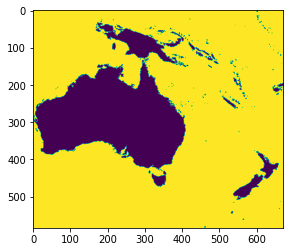

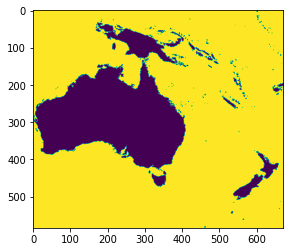

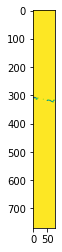

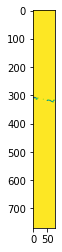

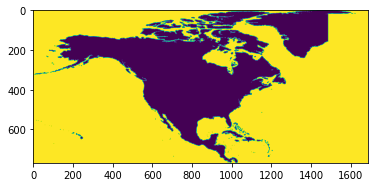

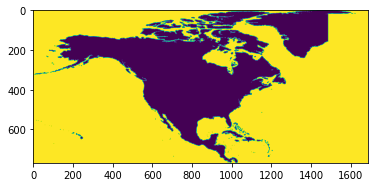

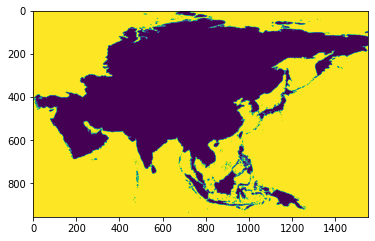

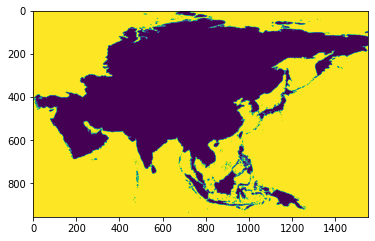

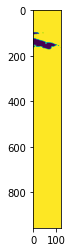

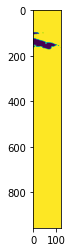

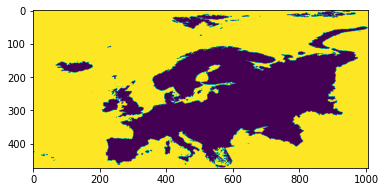

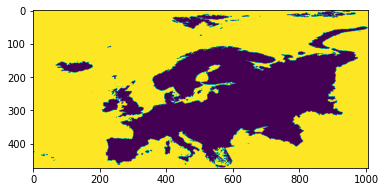

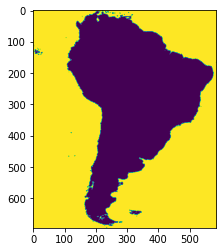

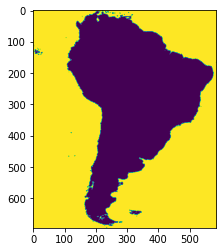

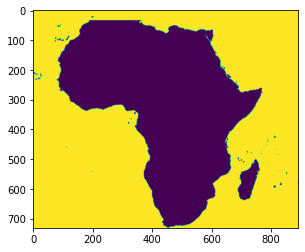

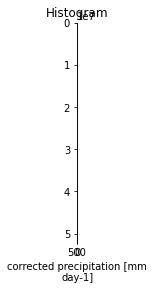

In [49]:
import glob
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

def merging_EM_ERATH  (variables = ['prcp','tdew','tmean','trange'],
                       regions = ['Asia','Europe','Africa','NorthAmerica','Oceania','SouthAmerica'],
                       years = ['2000'],
                       months = ['01'],
                       ensembles = ['001','002'],
                       root_save = '../EM_Earth_v1/'):
    
    
    for year in years:

        for month in months:

            for variable in variables:
                
                # file_name
                file_name = root_save+'deterministic_raw_daily/'+variable+'/'+\
                'EM_Earth_deterministic_daily_'+variable+'_'+year+month+'.nc'
                
                # open dataset
                ds_global = xr.open_dataset(file_name)
                #print(ds_global.lon[0:3])
                
                # reorganize the variables to time, lat, lon
                ds_global = ds_global.transpose('time', 'lat', 'lon')
                
                mask_sum ={}
                # replace the varibales with 0.00
                for v in ds_global.data_vars:
                    ds_global [v][:] = 0.00
                    mask_sum[v] = np.zeros([1800, 3600])
                
                # loop over the ensembles
                for ensemble in ensembles:
                    
                    #  read the files
                    file_names = root_save+'probabilistic_daily/'+variable+'/*/'+\
                                           year+month+'/*'+ensemble+'.nc'
                    file_names = glob.glob(file_names)
                    
                    #
                    for file_name in file_names:
                        print(file_name)
                        ds = xr.open_dataset(file_name)
                        #print(ds.data_vars)
                        ds = ds.transpose('time', 'lat', 'lon') # making sure the order
                        
                        #ds.prcp[0,:,:].plot()
                        #print(ds.prcp[0,:,:].values)
                        #print(ds)
                        
                        if ds.lon.values.max() > 180:
                            # Asia
                            ds1 = ds.sel(lon=slice(None, 179.975))
                            ds2 = ds.sel(lon=slice(179.975, None))
                            ds2['lon'] = ds2['lon'] - 360
                            ds_global, mask_sum = fill_cont_to_globe(ds1, ds_global, mask_sum)
                            ds_global, mask_sum = fill_cont_to_globe(ds2, ds_global, mask_sum)
                        elif ds.lon.values.min() < -180:
                            # North America
                            ds1 = ds.sel(lon=slice(None, -179.975))
                            ds2 = ds.sel(lon=slice(-179.975, None))
                            ds1['lon'] = ds1['lon'] + 360
                            ds_global, mask_sum = fill_cont_to_globe(ds1, ds_global, mask_sum)
                            ds_global, mask_sum = fill_cont_to_globe(ds2, ds_global, mask_sum)
                        else:
                            ds_global, mask_sum = fill_cont_to_globe(ds , ds_global, mask_sum)
                            
                    #
                    for v in ds_global.data_vars:
                        ds_global [v][:] = ds_global [v][:] / mask_sum[v]
                        #print(np.array(ds_global [v][:]))
                        ds_global[v].plot()
                    
                    #
                    ds_global = ds_global.fillna(-9999)
                    encoding = {}
                    for var in ds_global.data_vars:
                        encoding[var] = {'_FillValue': -9999., 'zlib': True, 'complevel': 4}
                    ds_global.to_netcdf('test.nc', unlimited_dims='time', encoding=encoding)
                    ll
                    
                            
                    ds_global.prcp[0,:,:].plot()
                    plt.figure()
                    print(mask_sum)
                    plt.imshow(mask_sum['prcp'])
                        
                    ll


def fill_cont_to_globe(ds, ds_global, mask_sum):
    
    #print(ds)
    #print(ds_global)
    
    row_start = np.where(np.array(ds_global.lat[:]) == ds.lat.max().item())
    row_end   = np.where(np.array(ds_global.lat[:]) == ds.lat.min().item())
    col_start = np.where(np.array(ds_global.lon[:]) == ds.lon.min().item())
    col_end   = np.where(np.array(ds_global.lon[:]) == ds.lon.max().item())
    row_start = row_start[0].item()
    row_end   = row_end[0].item()
    col_start = col_start[0].item()
    col_end   = col_end[0].item()
    
    print(row_start, row_end, col_start, col_end)
    
    for v in ds.data_vars:
        #
        datav = ds[v].values.copy()
        datav[np.isnan(datav)] = 0 # replace NaN with 0
        ds_global[v][:, row_start:row_end+1, col_start:col_end+1] = \
        ds_global[v][:, row_start:row_end+1, col_start:col_end+1] + datav
        #
        datav = ds[v].values.copy()
        #print(datav)
        datav = np.array(datav[0,:,:])
        #print(datav)
        #plt.imshow(datav)
        
        #plt.figure()
        #plt.imshow(np.isnan(datav))
        datav[~np.isnan(datav)] = 1
        datav[np.isnan(datav)] = 0
        mask_sum[v][row_start:row_end+1, col_start:col_end+1] = \
        mask_sum[v][row_start:row_end+1, col_start:col_end+1] + datav
        
    
    return ds_global, mask_sum
    
    



# def fill_cont_to_globe(dsi, data_global, snum):
#     # fill value into global data
#     res = 0.1
#     row1 = int((90 - dsi.lat.values.max())/res)
#     row2 = int((90 - dsi.lat.values.min())/res) + 1
#     col1 = int((dsi.lon.values.min() + 180)/res)
#     col2 = int((dsi.lon.values.max() + 180)/res) + 1
#     for v in dsi.data_vars:
#         datav = dsi[v].values
#         snum[v][row1:row2, col1:col2] = snum[v][row1:row2, col1:col2] + ~np.isnan(datav[int(datav.shape[0]/2), :, :])
#         datav[np.isnan(datav)] = 0
#         data_global[v][:, row1:row2, col1:col2] = data_global[v][:, row1:row2, col1:col2] + datav
#     return data_global, snum



merging_EM_ERATH()



<xarray.Dataset>
Dimensions:         (time: 31, lat: 731, lon: 892)
Coordinates:
  * time            (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-01-31
  * lat             (lat) float64 38.05 37.95 37.85 ... -34.75 -34.85 -34.95
  * lon             (lon) float64 -25.45 -25.35 -25.25 ... 63.45 63.55 63.65
Data variables:
    prcp            (time, lat, lon) float32 ...
    prcp_corrected  (time, lat, lon) float32 ...
Attributes:
    Dataset:    EM-Earth: Ensemble Meteorological Dataset for Planet Earth
    Developer:  Guoqiang Tang et al. in Center for Hydrology, Coldwater Lab, ...
    Type:       Probabilistic estimates of ensemble members


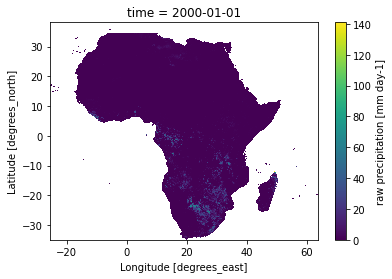

In [48]:
ds = xr.open_dataset('test.nc')

print(ds)

ds['prcp'][0,:,:].plot()


In [3]:
import xarray as xr

ds = xr.open_dataset('../EM_Earth_v1/deterministic_raw_daily/prcp/EM_Earth_deterministic_daily_prcp_200001.nc')

print(ds)


ds = xr.open_dataset('../EM_Earth_v1/probabilistic_daily/prcp/Asia/200001/EM_Earth_probabilistic_daily_prcp_Asia_200001_001.nc')

print(ds)


<xarray.Dataset>
Dimensions:         (time: 31, lat: 1800, lon: 3600)
Coordinates:
  * lat             (lat) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * lon             (lon) float32 -179.9 -179.9 -179.8 ... 179.8 179.9 179.9
  * time            (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-01-31
Data variables:
    prcp            (time, lat, lon) float32 ...
    prcp_corrected  (time, lat, lon) float32 ...
Attributes:
    Dataset:    EM-Earth: Ensemble Meteorological Dataset for Planet Earth
    Developer:  Guoqiang Tang et al. in Center for Hydrology, Coldwater Lab, ...
    Type:       Deterministic station-reanalysis merged estimates
<xarray.Dataset>
Dimensions:         (time: 31, lat: 956, lon: 1673)
Coordinates:
  * lon             (lon) float64 24.85 24.95 25.05 25.15 ... 191.8 191.9 192.1
  * time            (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-01-31
  * lat             (lat) float64 81.35 81.25 81.15 ... -13.95 -14.05 -14.15
Data variables:
  

In [10]:
# r = requests.head('https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/deterministic_raw_daily/prcp/EM_Earth_deterministic_daily_prcp_200001.nc') #You read HTTP Header here
# print(r)
# print(r.keys())
# r.headers['Content-MD5']

hashlib.md5('https://g-772fa5.cd4fe.0ec8.data.globus.org/6/published/publication_542/submitted_data/EM_Earth_v1/deterministic_raw_daily/prcp/EM_Earth_deterministic_daily_prcp_200001.nc')

TypeError: Unicode-objects must be encoded before hashing

In [ ]:
https://stackoverflow.com/questions/54483868/python-compare-local-and-remote-file-md5-hash
    

In [8]:
import os, hashlib, urllib2, optparse

def get_remote_md5_sum(url,algorithm):
    remote = urllib2.urlopen(url)
    return hash(remote, algorithm)

def hash(remote, algorithm="md5"):
    max_file_size=100*1024*1024
    if algorithm=="md5":
        hash = hashlib.md5()
    elif algorithm=="sha1":
        hash = hashlib.sha1()
    elif algorithm=="sha256":
        hash = hashlib.sha256()
    elif algorithm=="sha384":
        hash = hashlib.sha384()
    elif algorithm=="sha512":
        hash = hashlib.sha512()

    total_read = 0
    while True:
        data = remote.read(4096)
        total_read += 4096

        if not data or total_read > max_file_size:
            break

        hash.update(data)

    return hash.hexdigest()

if __name__ == '__main__':
    opt = optparse.OptionParser()
    opt.add_option('--url', '-u', default='http://www.google.com')
    opt.add_option('--algorithm', '-a', default='md5')

    options, args = opt.parse_args()
    print (get_remote_md5_sum(options.url, options.algorithm))

ModuleNotFoundError: No module named 'urllib2'

In [ ]:
# merge continent data from FRDR websites to global maps

import xarray as xr
import numpy as np
import glob, os, sys, time


def generate_probabilistic_daily_file_list(inpath_parent, continents, type, date, var, member):
    # other types may use different naming rules
    infile_list = [f'{inpath_parent}/{type}/{var}/{c}/{date}/EM_Earth_{type}_{var}_{c}_{date}_{member:03}.nc' for c in continents]
    return infile_list

def fill_cont_to_globe(dsi, data_global, snum):
    # fill value into global data
    res = 0.1
    row1 = int((90 - dsi.lat.values.max())/res)
    row2 = int((90 - dsi.lat.values.min())/res) + 1
    col1 = int((dsi.lon.values.min() + 180)/res)
    col2 = int((dsi.lon.values.max() + 180)/res) + 1
    for v in dsi.data_vars:
        datav = dsi[v].values
        snum[v][row1:row2, col1:col2] = snum[v][row1:row2, col1:col2] + ~np.isnan(datav[int(datav.shape[0]/2), :, :])
        datav[np.isnan(datav)] = 0
        data_global[v][:, row1:row2, col1:col2] = data_global[v][:, row1:row2, col1:col2] + datav
    return data_global, snum


def merge_continents(infile_list, outfile):
    t1 = time.time()

    print('#' * 50)
    print('Start processing ...')

    res = 0.1

    print('initialize ...')

    dsi = xr.open_dataset(infile_list[0])
    data_global = {}
    snum = {}
    for v in dsi.data_vars:
        data_global[v] = np.zeros([31, 1800, 3600])
        snum[v] = np.zeros([1800, 3600])

    print('Reading continent ...')
    for i in range(len(infile_list)):
        infile = infile_list[i]
        print('Reading:', infile)
        dsi = xr.load_dataset(infile)
        dsi = dsi.transpose('time', 'lat', 'lon')
        if dsi.lon.values.max() > 180:
            # Asia
            dsi1 = dsi.sel(lon=slice(None, 180))
            dsi2 = dsi.sel(lon=slice(180, None))
            dsi2['lon'] = dsi2['lon'] - 360
            data_global, snum = fill_cont_to_globe(dsi1, data_global, snum)
            data_global, snum = fill_cont_to_globe(dsi2, data_global, snum)
        elif dsi.lon.values.min() < -180:
            # North America
            dsi1 = dsi.sel(lon=slice(None, -180))
            dsi2 = dsi.sel(lon=slice(-180, None))
            dsi1['lon'] = dsi1['lon'] + 360
            data_global, snum = fill_cont_to_globe(dsi1, data_global, snum)
            data_global, snum = fill_cont_to_globe(dsi2, data_global, snum)
        else:
            data_global, snum = fill_cont_to_globe(dsi, data_global, snum)

    # mask
    for name, value in data_global.items():
        for t in range(value.shape[0]):
            dt = value[t, :, :] / snum[name]
            value[t, :, :] = dt
        data_global[name] = value

    # create output xarray
    ds = xr.Dataset()
    ds.coords['time'] = dsi.time
    ds.coords['lat'] = np.arange(89.95, -90, -res)
    ds.coords['lon'] = np.arange(-179.95, 180, res)
    ds.attrs['Dataset'] = 'EM-Earth: Ensemble Meteorological Dataset for Planet Earth'

    for name, value in data_global.items():
        ds[name] = xr.DataArray(value, dims=['time', 'lat', 'lon'])
        ds[name].attrs = dsi[name].attrs

    ds = ds.transpose('time', 'lat', 'lon')
    ds = ds.fillna(-9999)

    encoding = {}
    for var in ds.data_vars:
        encoding[var] = {'_FillValue': -9999., 'zlib': True, 'complevel': 4}

    ds.to_netcdf(outfile, unlimited_dims='time', encoding=encoding)

    t2 = time.time()
    print('time cost (sec):', t2 - t1)


####################
# input files: defined by users

# any combination of continents is fine. will only process continents in the list
continents = ['Africa', 'Asia', 'Europe', 'NorthAmerica', 'Oceania', 'SouthAmerica']


inpath_parent = '/home/gut428/scratch/EM_Earth_v1'
type = 'probabilistic_daily'
date = '195001'
var = 'prcp'
member = 1 # 1-25
infile_list = generate_probabilistic_daily_file_list(inpath_parent, continents, type, date, var, member)

# define by users
outfile = '/home/gut428/scratch/test.nc'

####################
# merge infile_list into a global file
merge_continents(infile_list, outfile)




# (delete this part)
# ####################
# # validation compare to global data
# import xarray as xr
# ds = xr.load_dataset(outfile)
# ds2 = xr.load_dataset('/project/rpp-kshook/CompHydCore/climateForcingData/EM_Earth_v1_Global/Ensemble_daily_UTC_prcp/195001/EM_Earth_ensemble_prcp_195001_001.nc')
#
# d1 = ds.prcp.values
# d2=ds2.prcp.values
# diff = d1-d2
# diff[d1<0]=np.nan
# diff[d2<0]=np.nan
# diff[np.isnan(d2)]=np.nan
# diff[np.isnan(d1)]=np.nan
# print(np.nanmin(diff), np.nanmax(diff))






In [ ]:
#     print('wget -nv '+link + ' | tee '+file_name+' | md5sum > MD5SUM')
#     #os.system('wget -nv '+link + ' | tee '+file_name+' | md5sum > MD5SUM')
#     #os.system('wget -O - '+link + ' | tee '+file_name+' | md5sum > MD5SUM')
#     os.system('wget -O - '+link + ' '+file_name+' | md5sum > MD5SUM')
#     #os.system('wget -O - '+link + ' | md5sum > MD5SUM')
#     os.system('md5sum '+file_name)
    
#     ll
#     #r = requests.get(link) # download the URL
#     r = requests.head(link)
#     print(r.headers['Content-MD5'])
#     ll
#     # print the specification of the download 
#     print(r.status_code, r.headers['content-type'], r.encoding)
#     # if download successful the statuse code is 200 then save the file, else print what was not downloaded
#     if r.status_code == 200:
#         print('download was successful for '+link)
#         with open(file_name, 'wb') as f:
#             f.write(r.content)
#     else:
#         print('download was not successful for '+link)
        
#     compare(file_name, link)
    
#     os.system('rm *.nc')
    
#     os.system('wget -O '+path_save+file_name+' '+link)
#     os.system('wget  '+link + ' '+file_name)
    #print(link)
    #print(file_name)
    #print('wget -nv '+link + ' '+file_name)
    #print('wget -nv '+link + ' '+file_name+' | md5sum > MD5SUM')
    #os.system('wget -nv '+link + ' '+file_name)
    #os.system('cp '+ file_name +' '+path_save+file_name)
    #os.system('rm *.nc')


#     def md5Checksum(filePath,url):
#         m = hashlib.md5()
#         if url==None:
#             with open(filePath, u'rb') as fh:
#                 m = hashlib.md5()
#                 while True:
#                     data = fh.read(8192)
#                     if not data:
#                         break
#                     m.update(data)
#                 #Get BASE 64 Local File md5
#                 return base64.b64encode(m.digest()).decode('ascii')#Encode MD5 digest to BASE 64

#         else:
#             #Get BASE 64 Remote File md5
#             r = requests.head(url) #You read HTTP Header here
#             return r.headers['Content-MD5'] #Take only Content-MD5 string

#     def compare(filePath, url):
#         local = md5Checksum(filePath,None)
#         remote = md5Checksum(None,url)

#         if local == remote :
#             print("The soft don't download the file")
#         else:
#             print("The soft download the file")